In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler,StandardScaler,RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [83]:
df = pd.read_csv('/content/sample_data/googleplaystore.csv')

In [84]:
df01 = df

In [85]:
df.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres Last Updated         Current Ver   Android Ver  
0               Art & Design    07-Jan-18               1.0.0  4.0.3 and up  
1  Art & Design;Pretend Play    15-Jan-18               2.0.0  4.0.3 and up  
2               Art & Design    01-Aug-18               1.2.4  4.0.3 and up  
3               Art & Design    08-Jun-18  Varies with device    4.2 and up  
4    Art & Design;Creativity    20-Jun-18                 1.1    4.4 and up

In [86]:
df1 = df

In [87]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [89]:
df.describe()

Rating
count  9367.000000
mean      4.193338
std       0.537431
min       1.000000
25%       4.000000
50%       4.300000
75%       4.500000
max      19.000000

In [90]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [91]:
df.Category.value_counts()

Category
FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: count, dtype: int64

In [92]:
Games = df[df['Category'] == 'GAME']

In [93]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

<Axes: ylabel='Rating'>

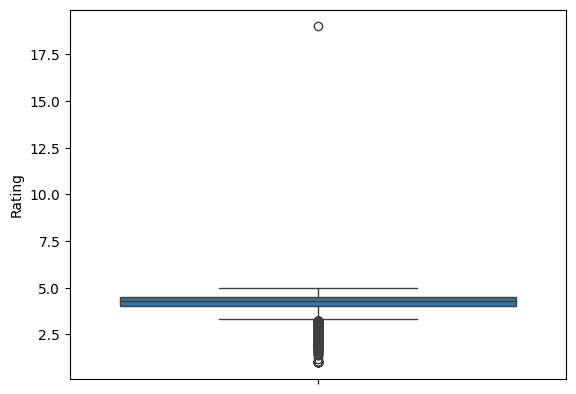

In [94]:
sns.boxplot(df['Rating'])

In [95]:
df.loc[df['Rating']>5,'Rating'] = np.median(df['Rating'])

In [96]:
df = df.loc[df['Rating']>=1.0]

<Axes: ylabel='Rating'>

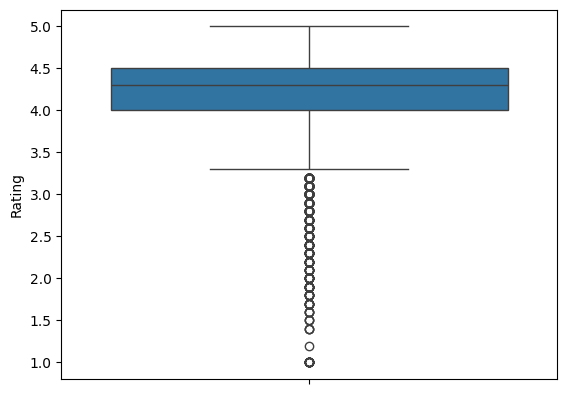

In [97]:
sns.boxplot(df['Rating'])

<Axes: xlabel='Price', ylabel='Count'>

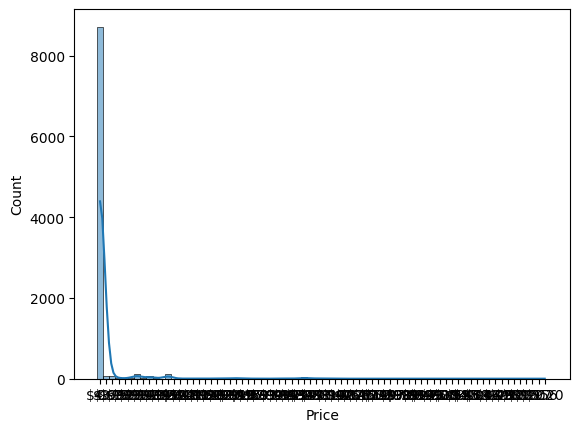

In [98]:
sns.histplot(df['Price'],kde = True)

In [99]:
df['Price'] = df['Price'].astype(str).str.replace('$','',regex = False)
df['Price'] = pd.to_numeric(df['Price'],errors = 'coerce')
df['Price'].fillna(0,inplace = True)

<ipython-input-99-34f6c5a73b42>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price'] = df['Price'].astype(str).str.replace('$','',regex = False)
<ipython-input-99-34f6c5a73b42>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price'] = pd.to_numeric(df['Price'],errors = 'coerce')
<ipython-input-99-34f6c5a73b42>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace m

In [100]:
df.loc[df['Price'] == 0].size

113347

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   object 
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9362 non-null   object 
 12  Android Ver     9364 non-null   object 
dtypes: float64(2), object(11)
memory usage: 1.0+ MB


In [102]:
df['Price'] =df['Price'].astype(str).str.replace('$','',regex=False)
df['Price'] = pd.to_numeric(df['Price'],errors = 'coerce')

<ipython-input-102-f0f222566249>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price'] =df['Price'].astype(str).str.replace('$','',regex=False)
<ipython-input-102-f0f222566249>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price'] = pd.to_numeric(df['Price'],errors = 'coerce')


In [103]:
df['Installs'] =df['Installs'].astype(str).str.replace('+','',regex=False)
df['Content Rating'] = LE.fit_transform(df['Content Rating'])

<ipython-input-103-fb7f3117491a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Installs'] =df['Installs'].astype(str).str.replace('+','',regex=False)
<ipython-input-103-fb7f3117491a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Content Rating'] = LE.fit_transform(df['Content Rating'])


In [104]:
df.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size    Installs  Type  Price  Content Rating  \
0     159   19M      10,000  Free    0.0               1   
1     967   14M     500,000  Free    0.0               1   
2   87510  8.7M   5,000,000  Free    0.0               1   
3  215644   25M  50,000,000  Free    0.0               4   
4     967  2.8M     100,000  Free    0.0               1   

                      Genres Last Updated         Current Ver   Android Ver  
0               Art & Design    07-Jan-18               1.0.0  4.0.3 and up  
1  Art & Design;Pretend Play    15-Jan-18               2.0.0  4.0.3 and up  
2               Art & Design    01-Aug-18               1.2.4  4.0.3 and up  
3               Art & Design    08-Jun-18  Varies with device    4.2 and up  
4    Art & Design;Creativity    20-Jun-18                 1.1    4.4 and up

In [105]:
df['Size'] = df['Size'].astype(str).str.replace('M','000000',regex = False)
df['Size'] = df['Size'].astype(str).str.replace('k','000',regex = False)
df['Size'] = df['Size'].astype(str).str.replace('Varies with device','0',regex = False)
df['Size'] = df['Size'].astype(str).str.replace('.','',regex = False)
df['Size'].astype(int)

<ipython-input-105-14ba111eac3d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Size'] = df['Size'].astype(str).str.replace('M','000000',regex = False)
<ipython-input-105-14ba111eac3d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Size'] = df['Size'].astype(str).str.replace('k','000',regex = False)
<ipython-input-105-14ba111eac3d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

0        19000000
1        14000000
2        87000000
3        25000000
4        28000000
           ...   
10834    26000000
10836    53000000
10837    36000000
10839           0
10840    19000000
Name: Size, Length: 9366, dtype: int64

In [106]:
df['Content Rating'].value_counts()

Content Rating
1    7420
4    1084
3     461
2     397
0       3
5       1
Name: count, dtype: int64

In [107]:
df['Type'].value_counts()

Type
Free    8719
Paid     647
Name: count, dtype: int64

In [108]:
LE = LabelEncoder()
df['Type'] = LE.fit_transform(df['Type'])

<ipython-input-108-f193c623a942>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Type'] = LE.fit_transform(df['Type'])


In [109]:
df['Android Ver']=df['Android Ver'].astype(str).str.replace(' and up','',regex = False)

<ipython-input-109-be4b4cc6eb40>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Android Ver']=df['Android Ver'].astype(str).str.replace(' and up','',regex = False)


In [110]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'])

<ipython-input-110-0aa4becc4b3a>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Last Updated'] = pd.to_datetime(df['Last Updated'])
<ipython-input-110-0aa4becc4b3a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Last Updated'] = pd.to_datetime(df['Last Updated'])


In [111]:
df.drop('App',axis = 1,inplace = True)

<ipython-input-111-c39811368d96>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('App',axis = 1,inplace = True)


In [112]:
df['Current Ver'] = df['Current Ver'].value_counts().replace('Varies with device','0',inplace = True)

<ipython-input-112-f47337e1729a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Current Ver'] = df['Current Ver'].value_counts().replace('Varies with device','0',inplace = True)


In [113]:
df.columns

Index(['Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

<Axes: xlabel='Installs', ylabel='Reviews'>

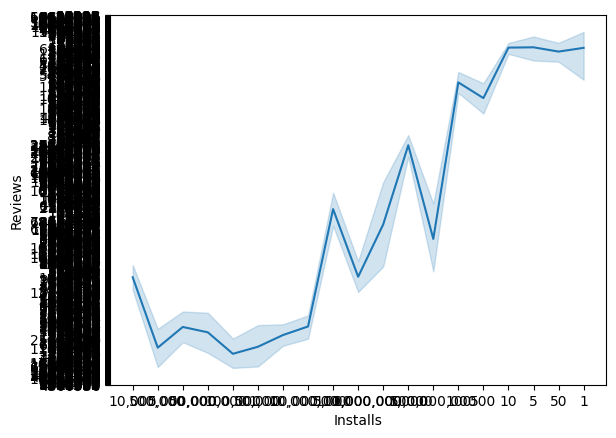

In [114]:
sns.lineplot(data = df,x = 'Installs',y = 'Reviews')

In [115]:
df.isnull().sum()

Category             0
Rating               0
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver       9366
Android Ver          0
dtype: int64

In [116]:
df['Android Ver'].mode()
df.loc[df['Android Ver'] == 'Varies with device','Android Ver'] = '4.1 and up'
df.fillna('4.1 and up',inplace = True)

<ipython-input-116-83314388fabf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna('4.1 and up',inplace = True)


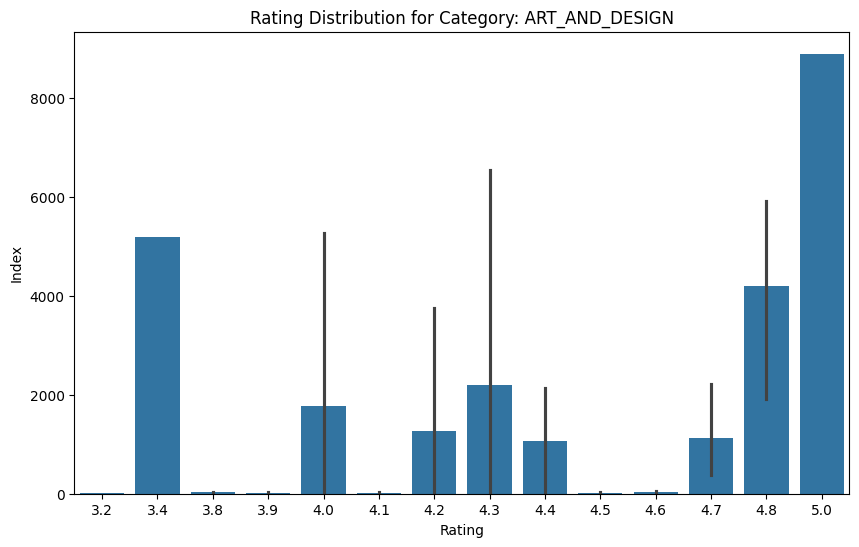

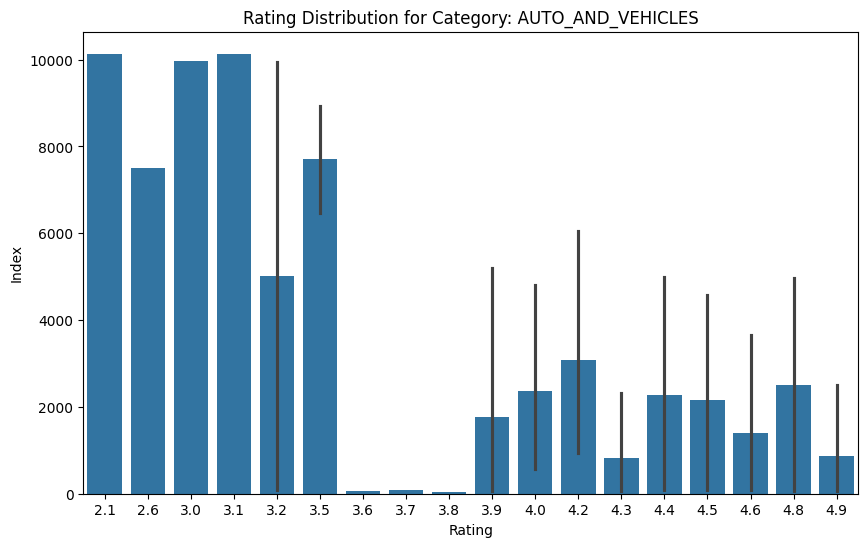

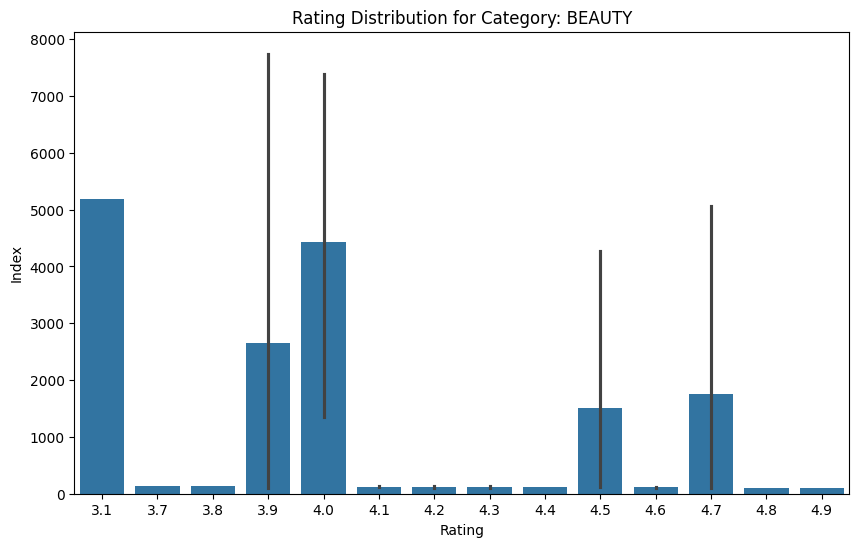

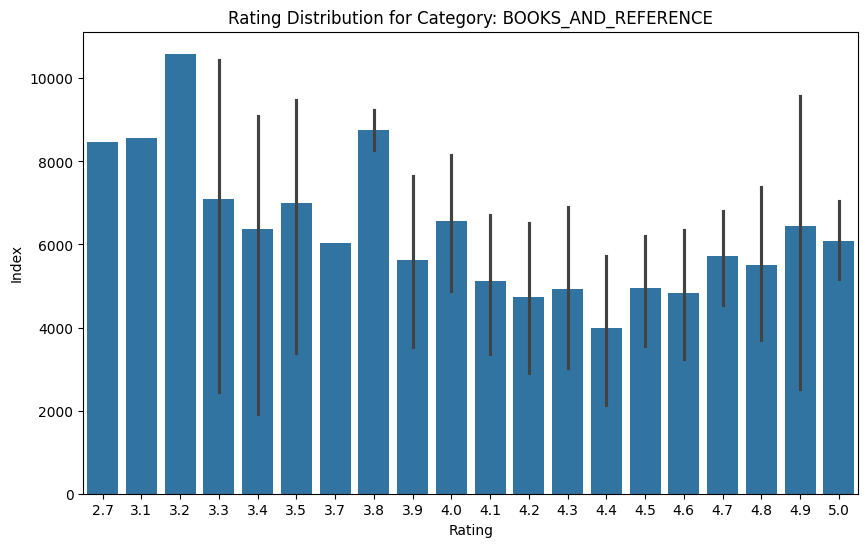

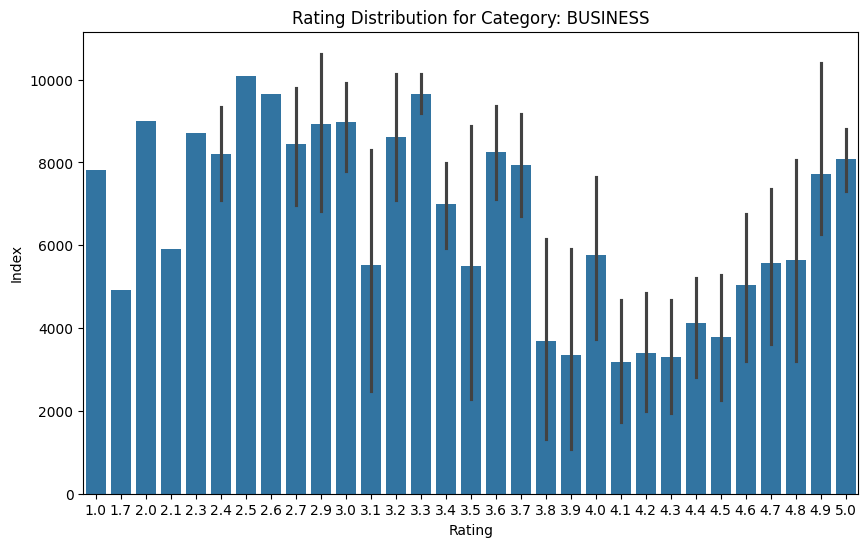

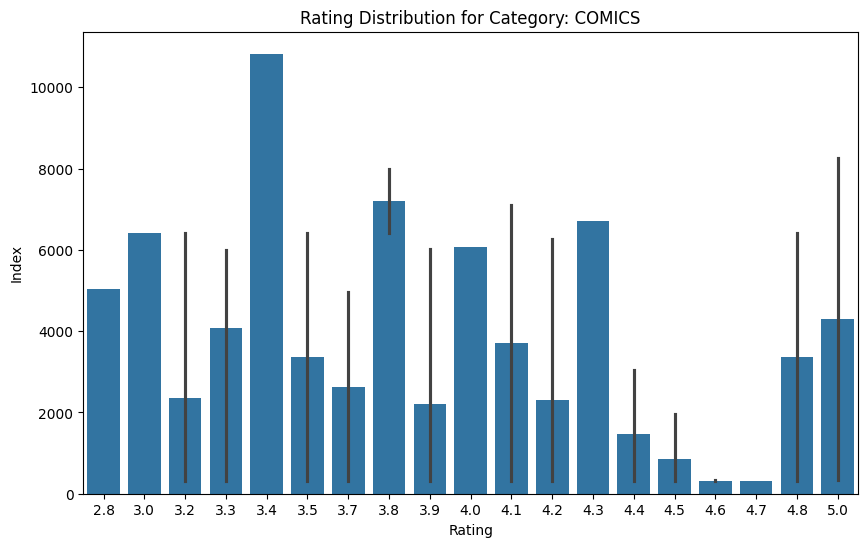

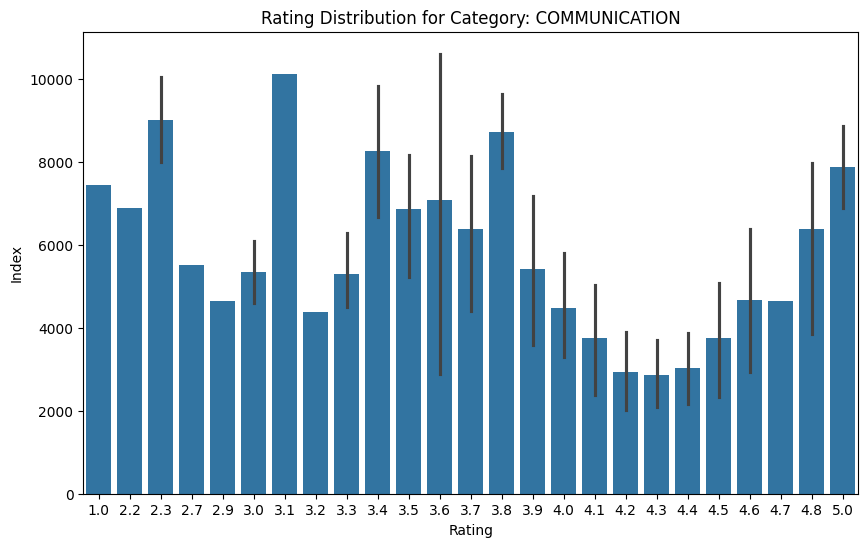

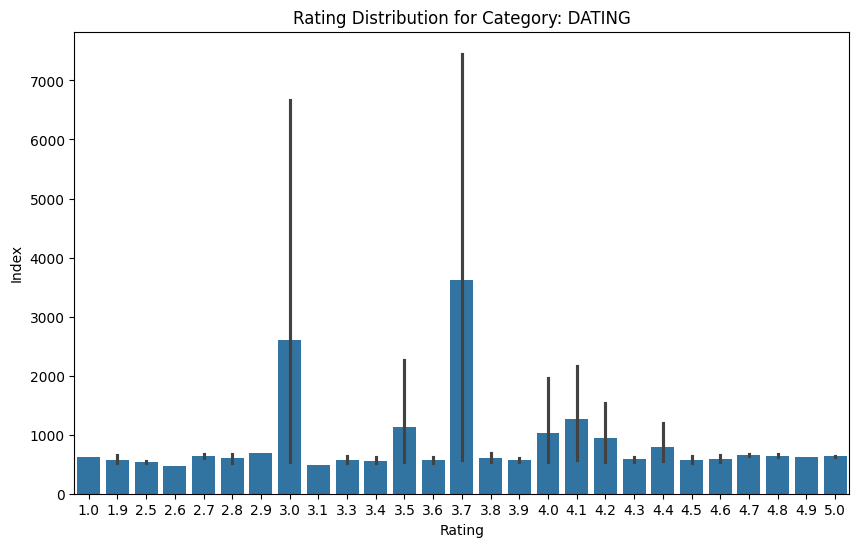

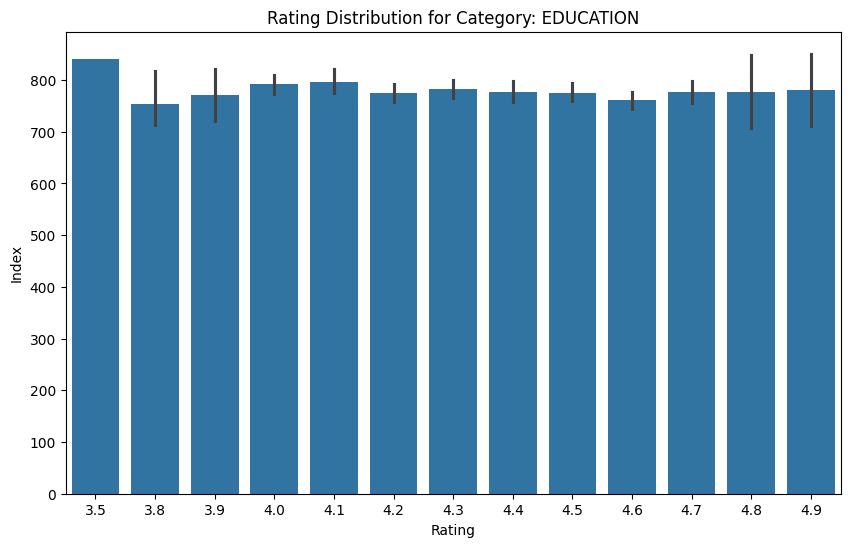

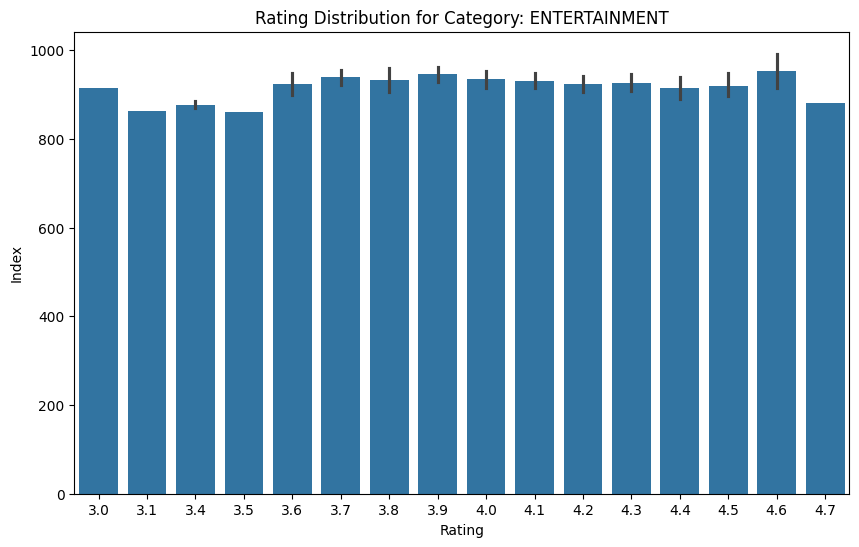

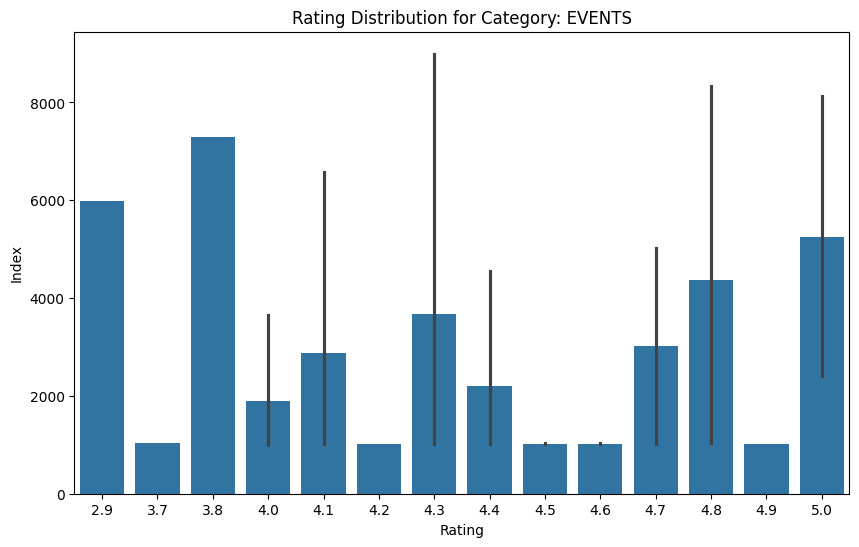

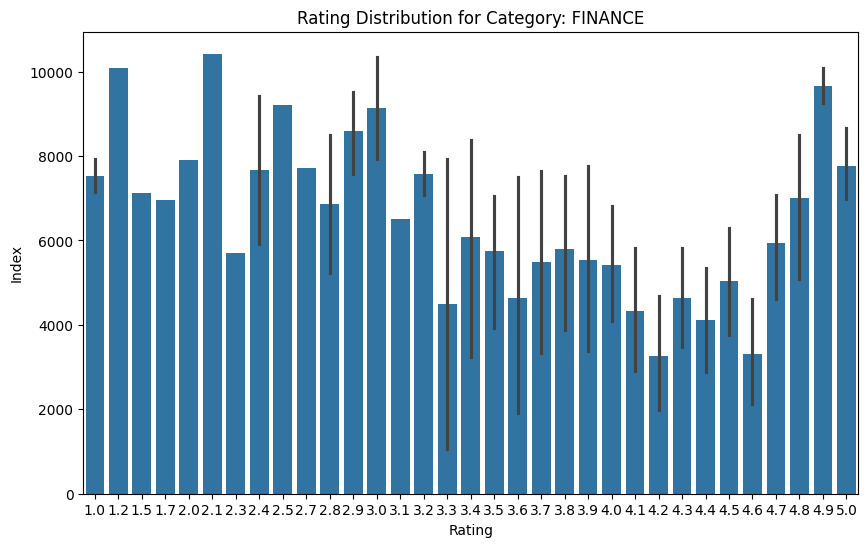

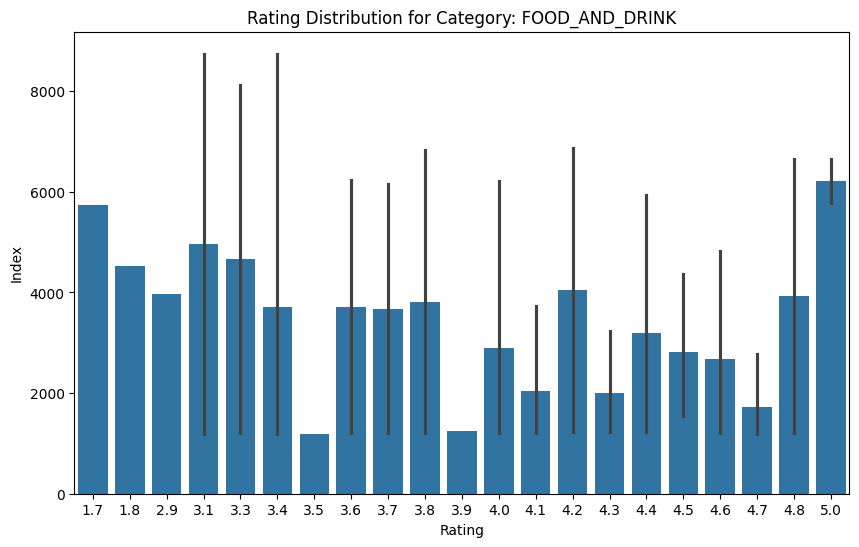

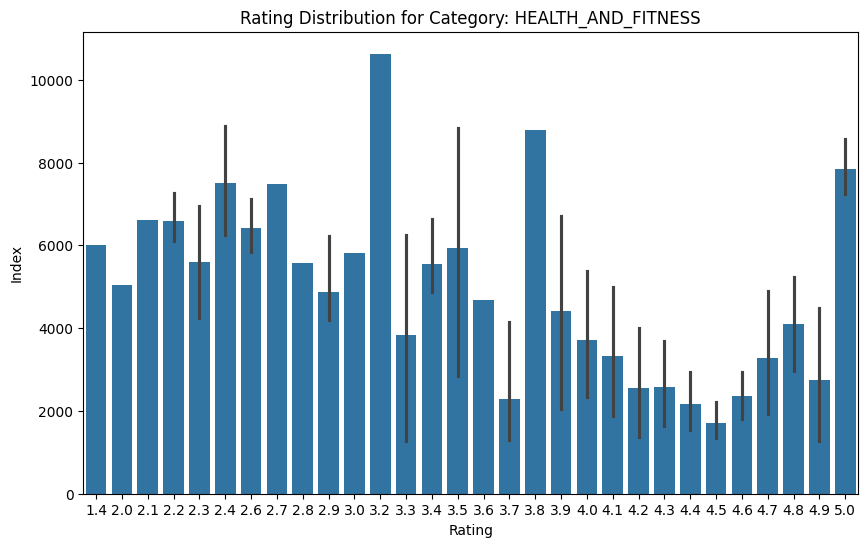

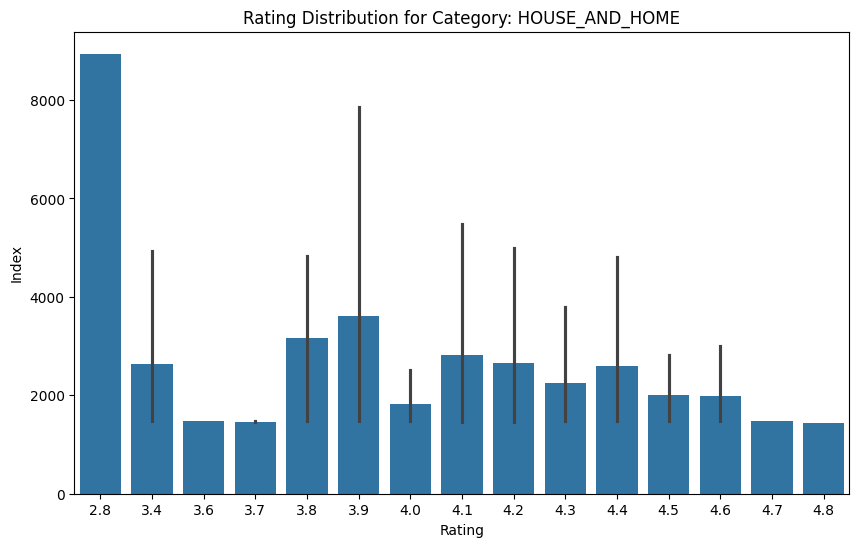

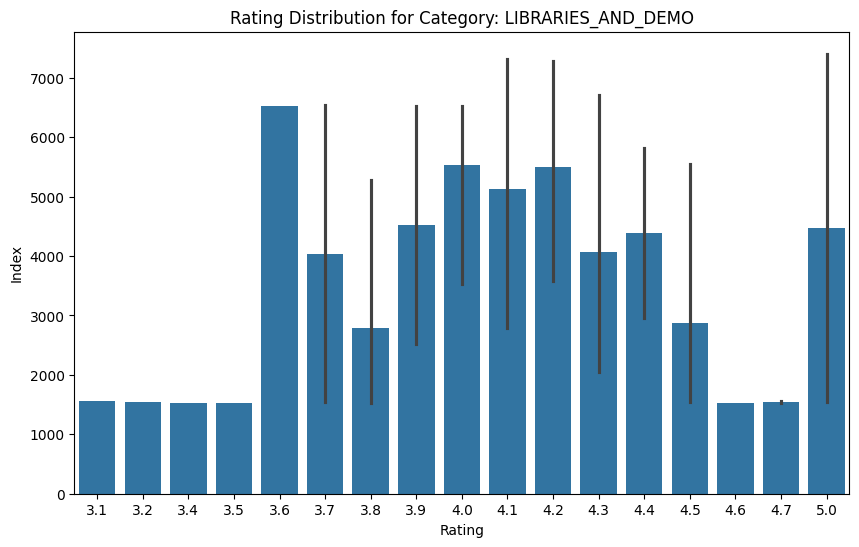

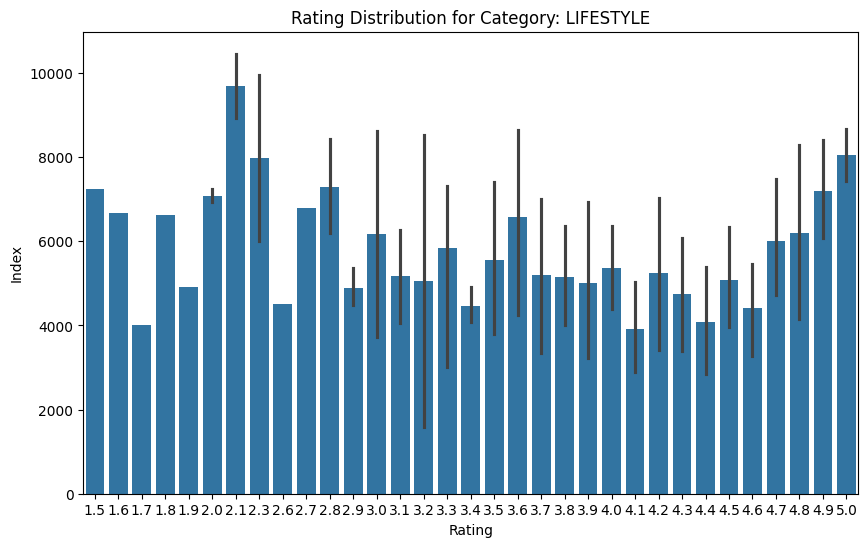

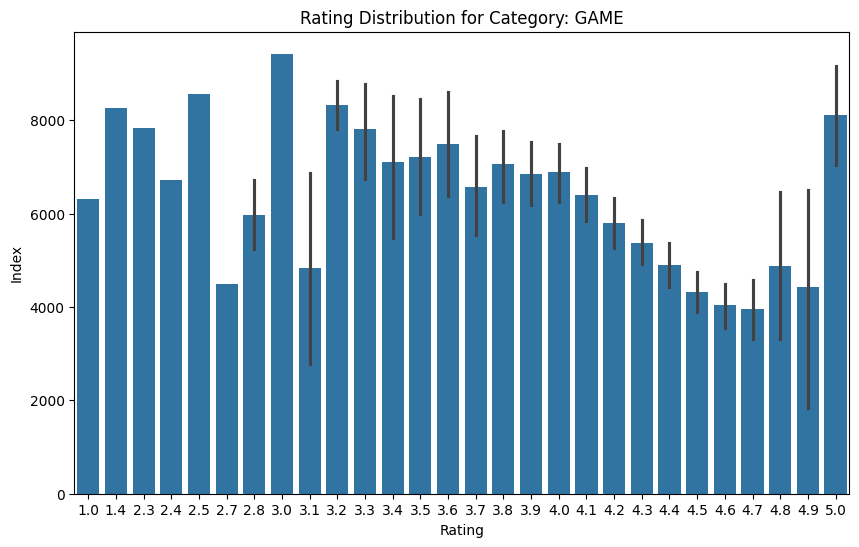

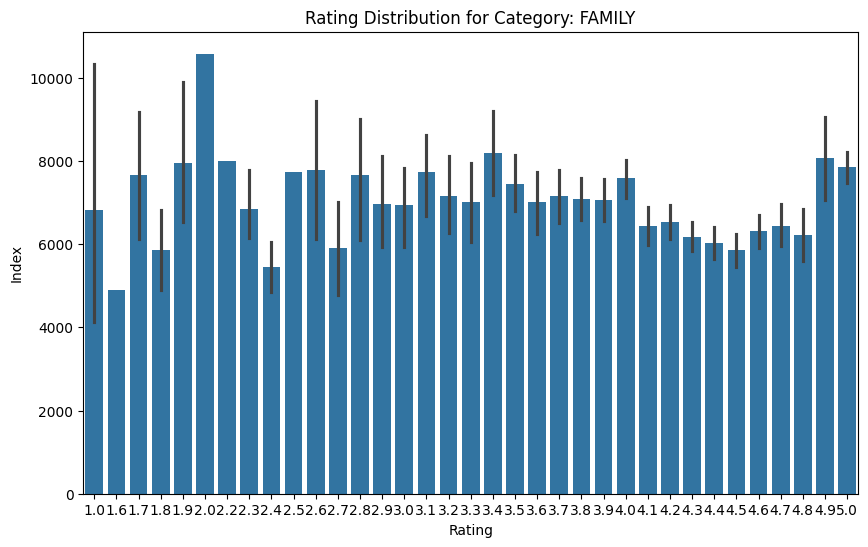

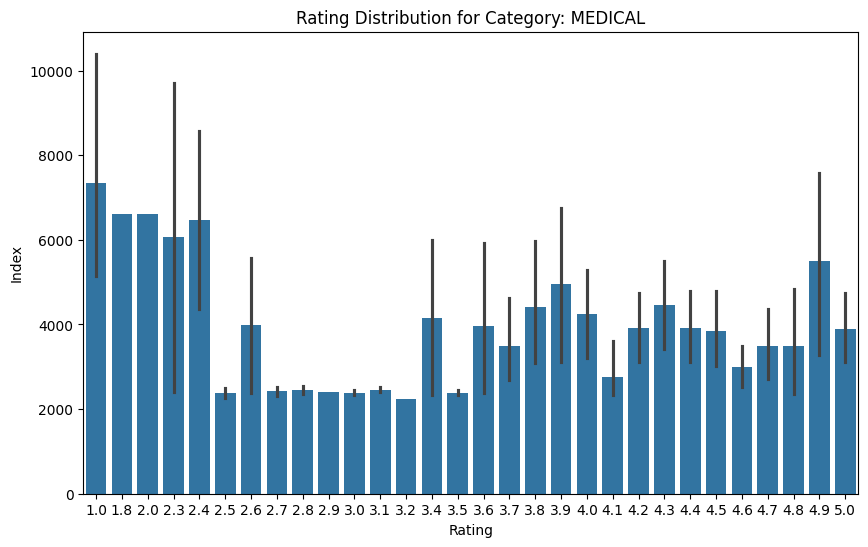

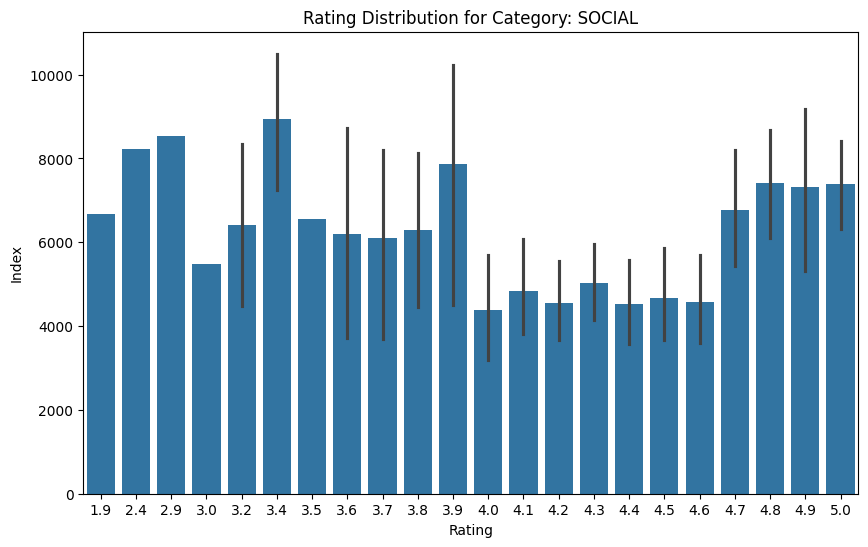

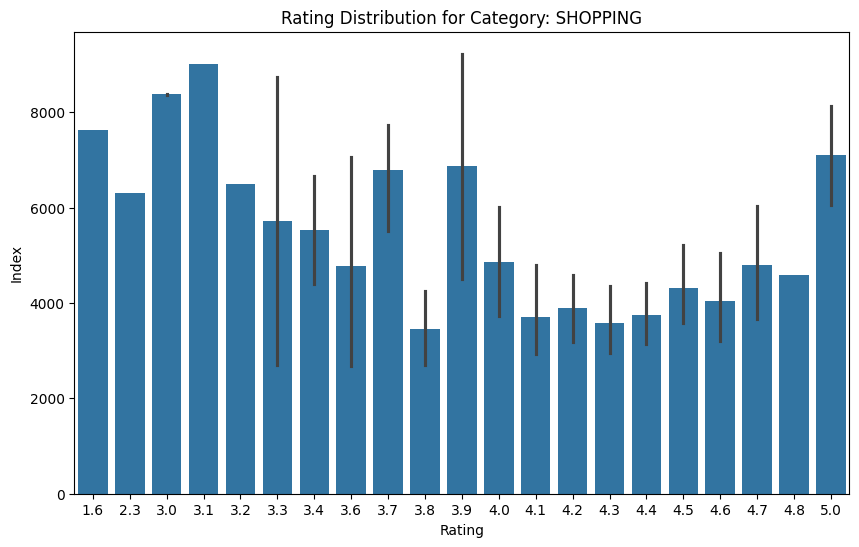

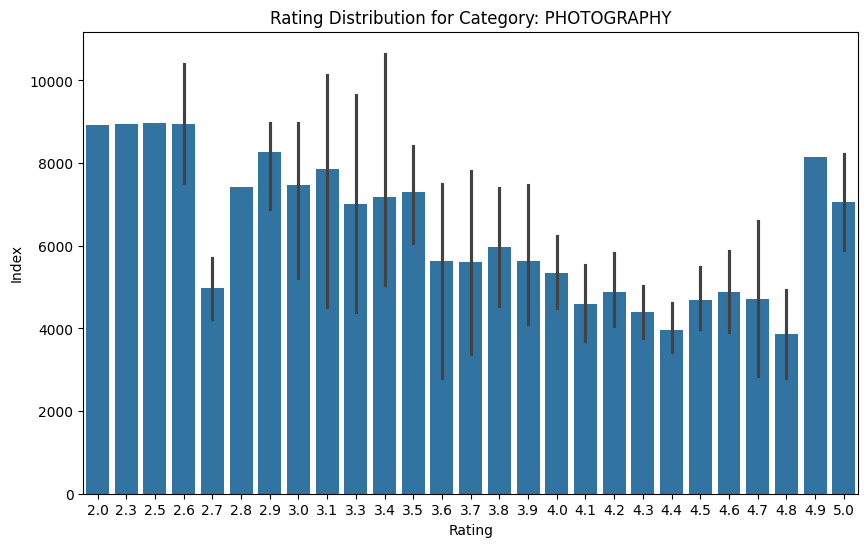

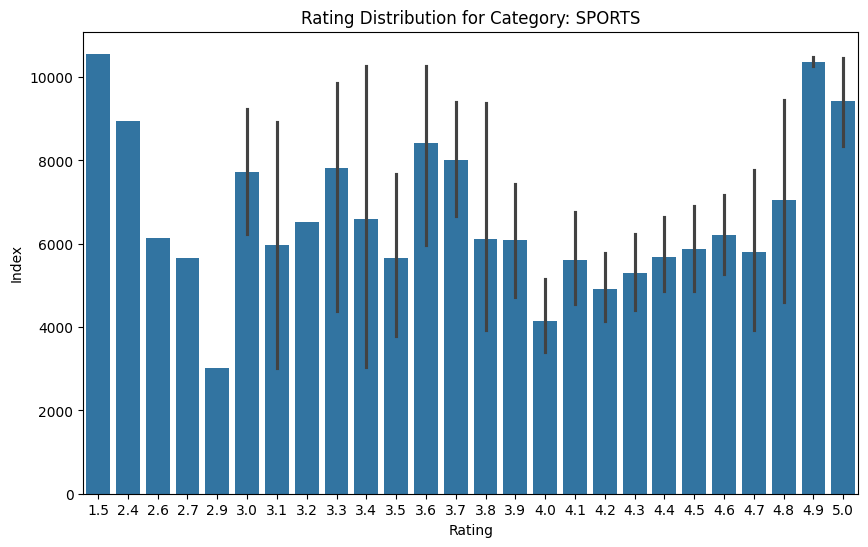

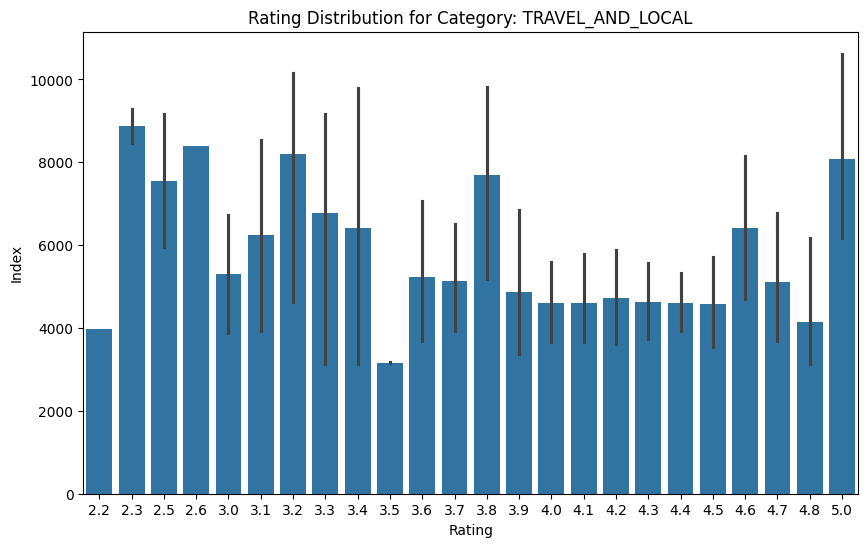

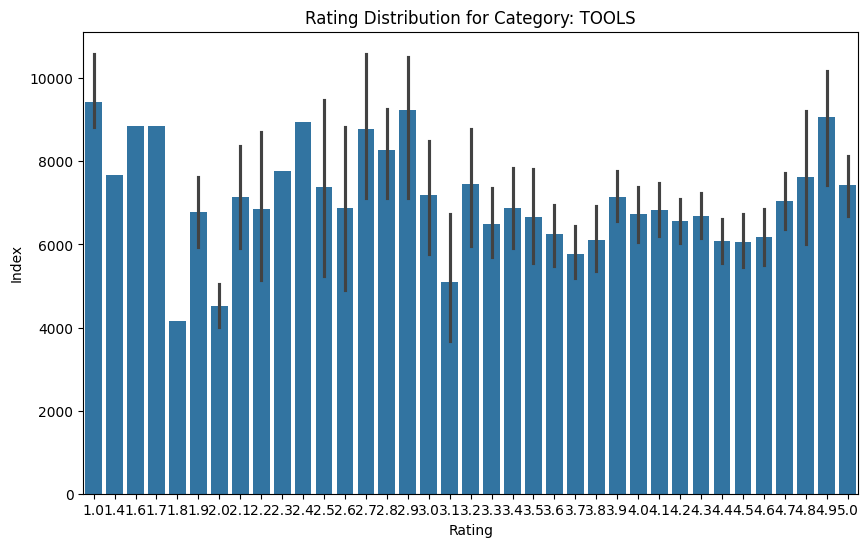

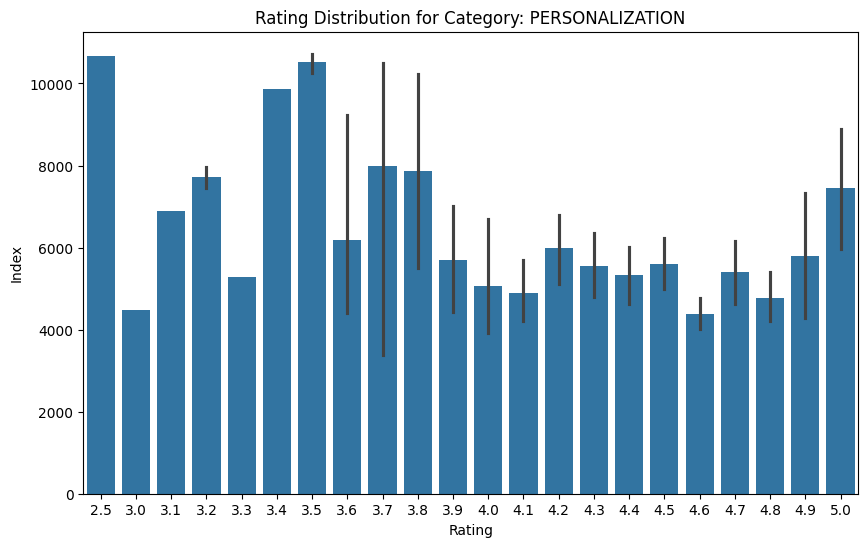

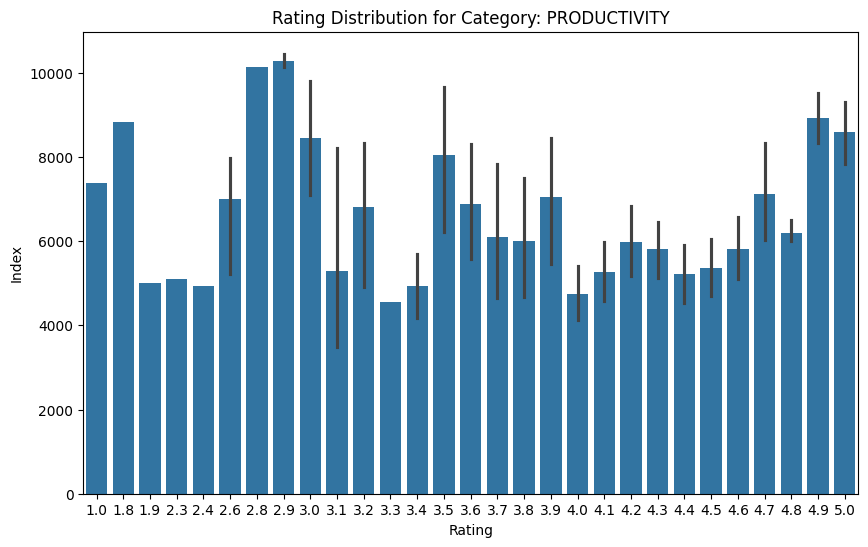

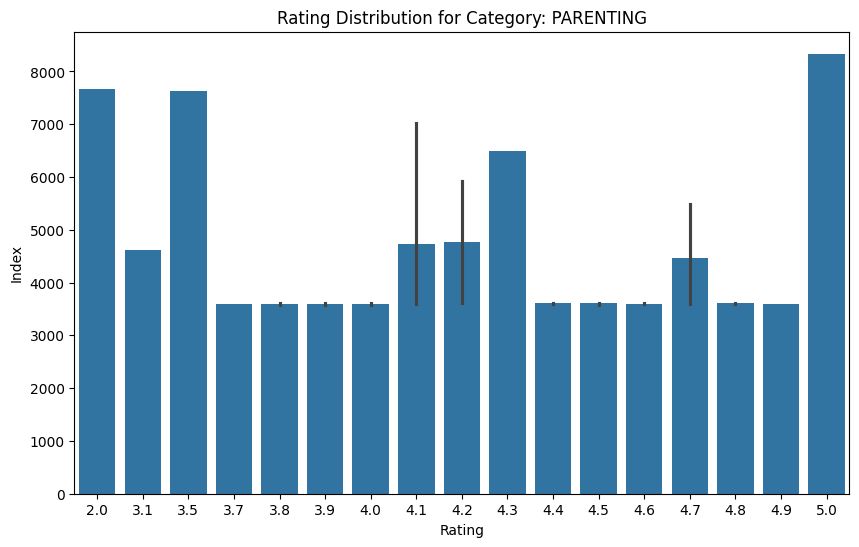

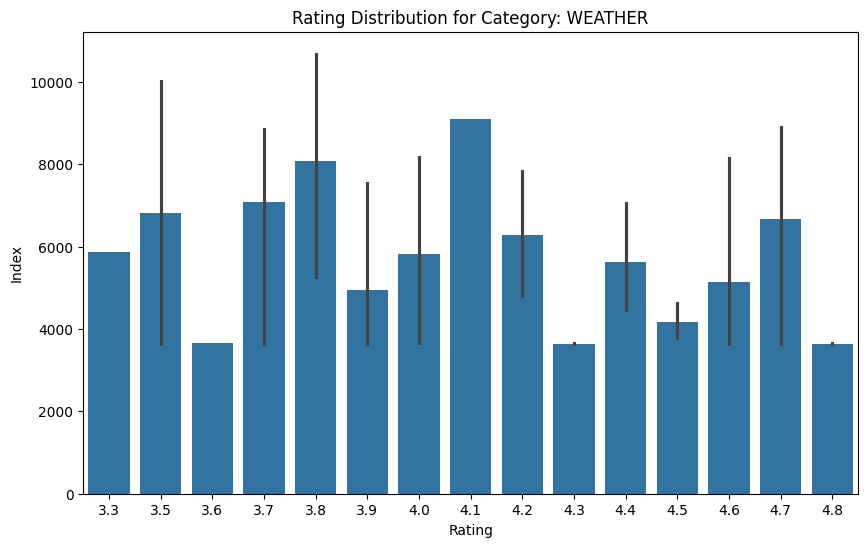

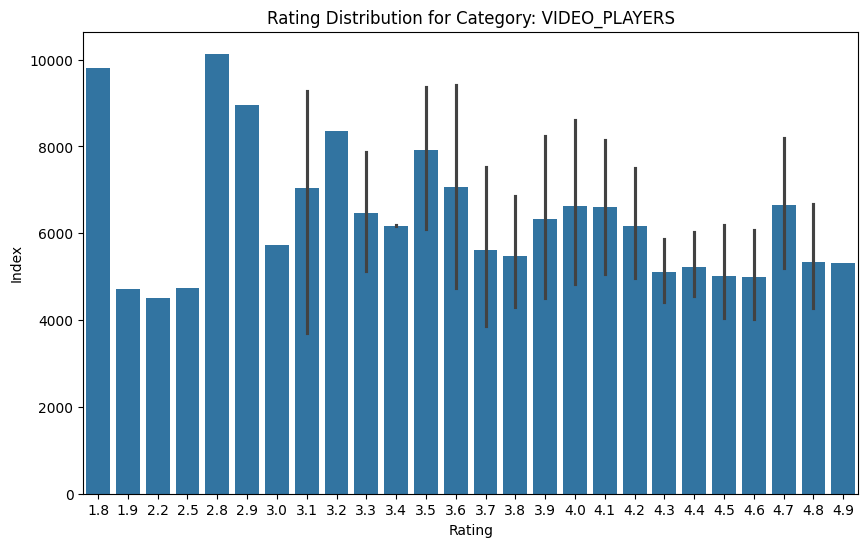

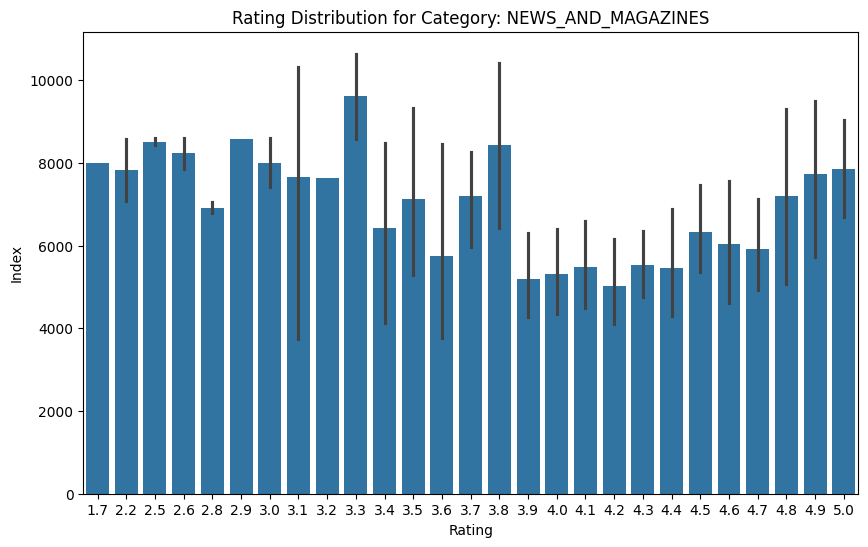

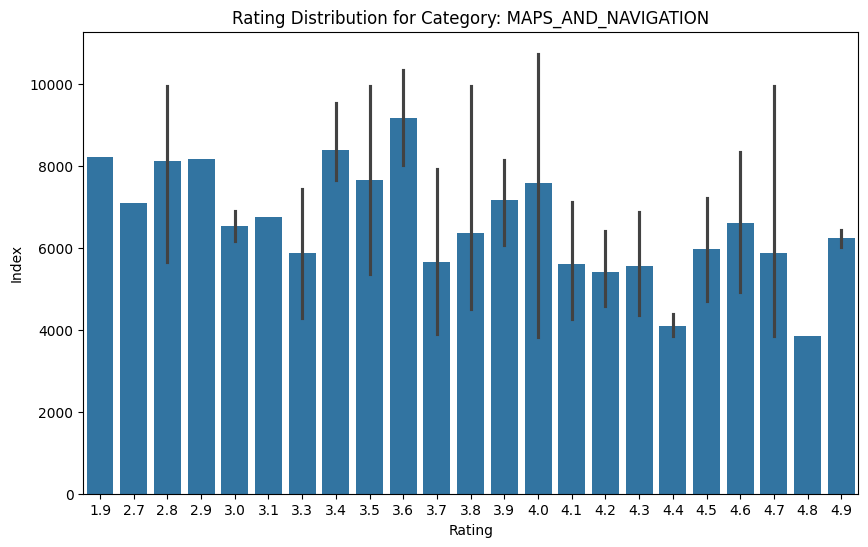

In [117]:
for category in df['Category'].unique():
    plt.figure(figsize=(10, 6))
    subset = df[df['Category'] == category]
    sns.barplot(x='Rating', y=subset.index, data=subset)
    plt.title(f'Rating Distribution for Category: {category}')
    plt.xlabel('Rating')
    plt.ylabel('Index')
    plt.show()

<Axes: xlabel='Rating', ylabel='Installs'>

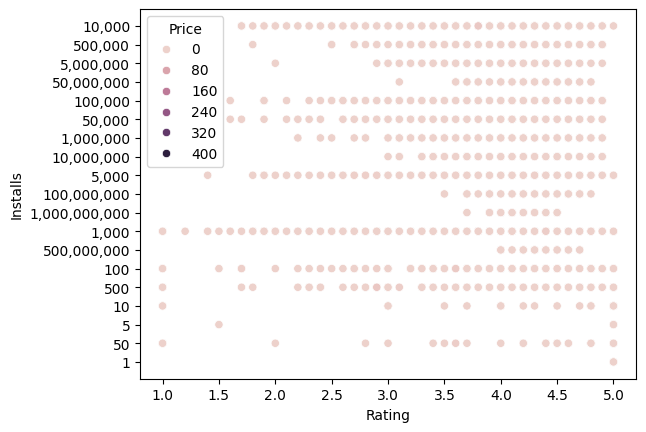

In [118]:
sns.scatterplot(data = df,x = 'Rating',y = 'Installs',hue =df['Price'])

<Axes: xlabel='Rating', ylabel='Count'>

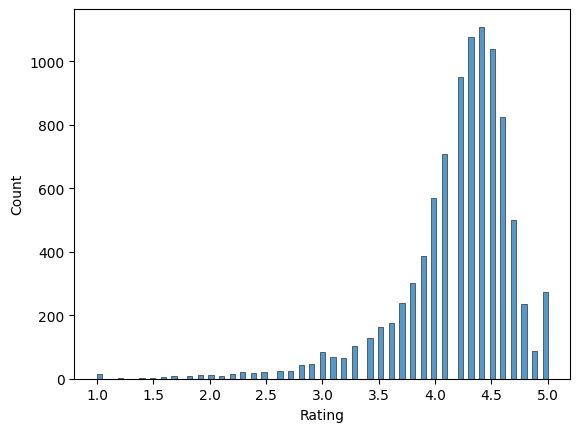

In [119]:
sns.histplot(data = df,x = 'Rating')

In [120]:
game0001 = df.loc[df['Category'] == 'GAME']

In [121]:
df.head()

Category  Rating Reviews      Size    Installs  Type  Price  \
0  ART_AND_DESIGN     4.1     159  19000000      10,000     0    0.0   
1  ART_AND_DESIGN     3.9     967  14000000     500,000     0    0.0   
2  ART_AND_DESIGN     4.7   87510  87000000   5,000,000     0    0.0   
3  ART_AND_DESIGN     4.5  215644  25000000  50,000,000     0    0.0   
4  ART_AND_DESIGN     4.3     967  28000000     100,000     0    0.0   

   Content Rating                     Genres Last Updated Current Ver  \
0               1               Art & Design   2018-01-07  4.1 and up   
1               1  Art & Design;Pretend Play   2018-01-15  4.1 and up   
2               1               Art & Design   2018-08-01  4.1 and up   
3               4               Art & Design   2018-06-08  4.1 and up   
4               1    Art & Design;Creativity   2018-06-20  4.1 and up   

  Android Ver  
0       4.0.3  
1       4.0.3  
2       4.0.3  
3         4.2  
4         4.4

In [122]:
df.columns

Index(['Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

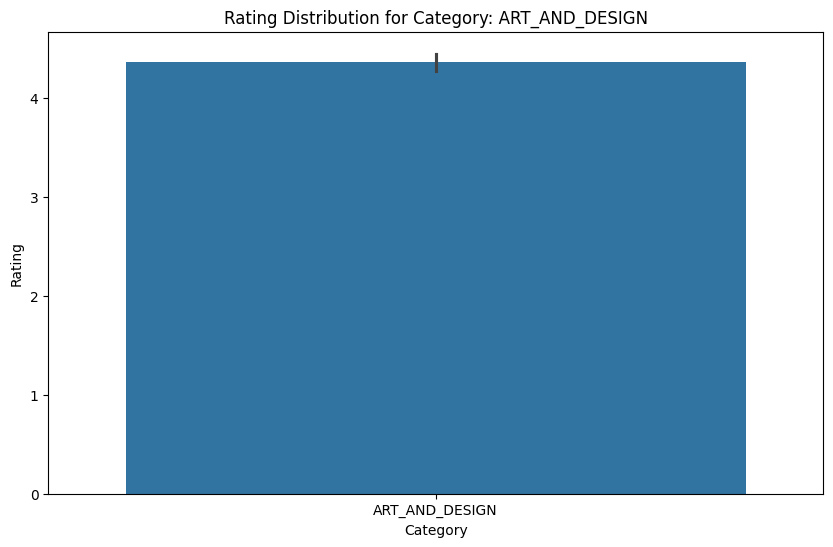

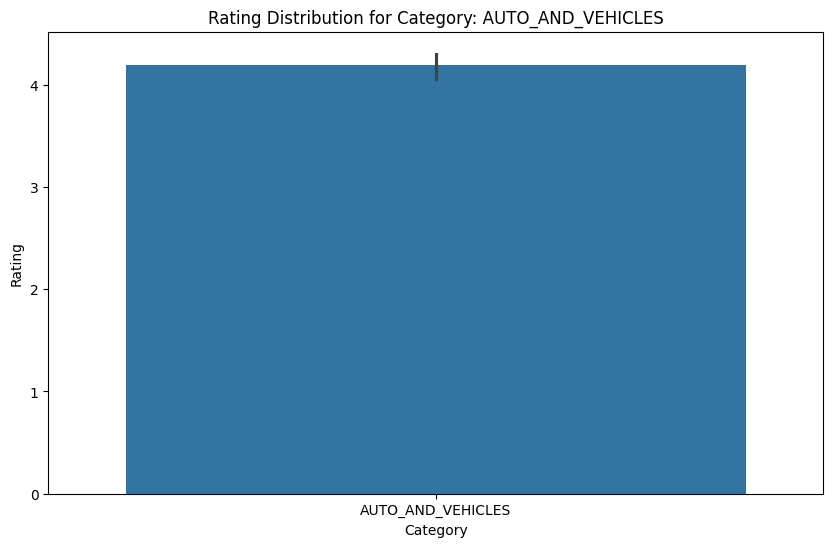

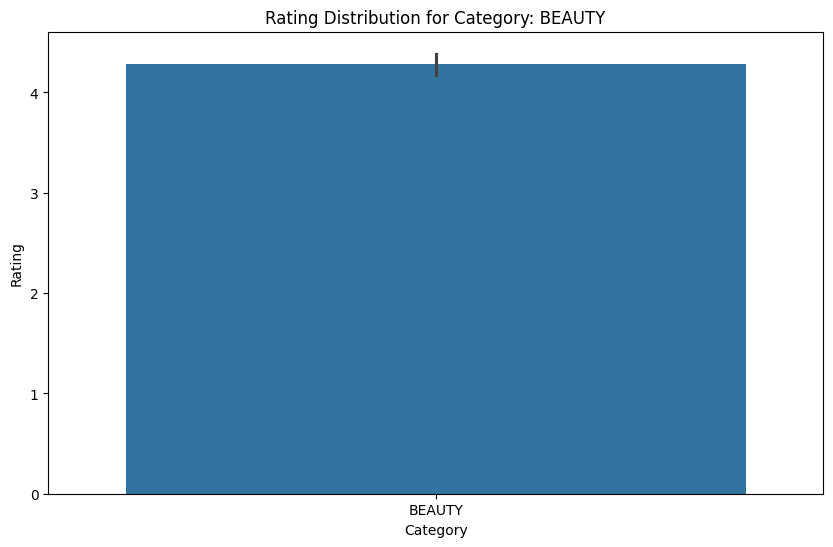

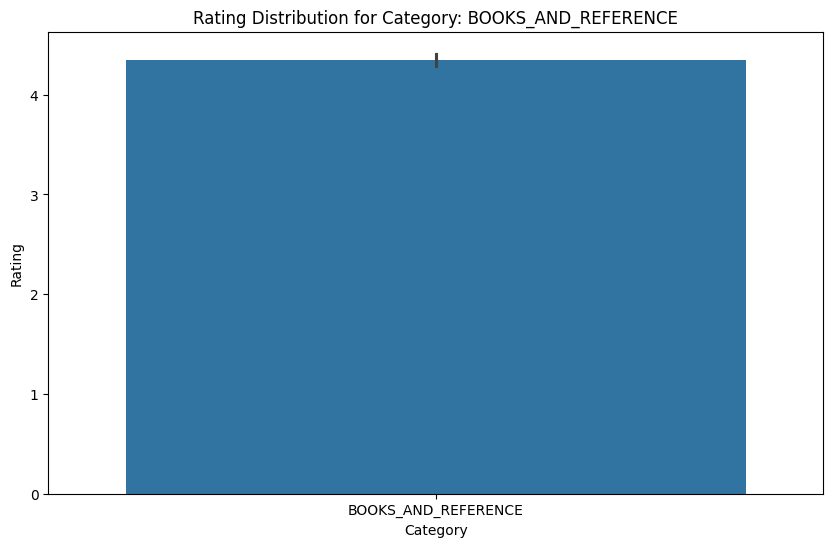

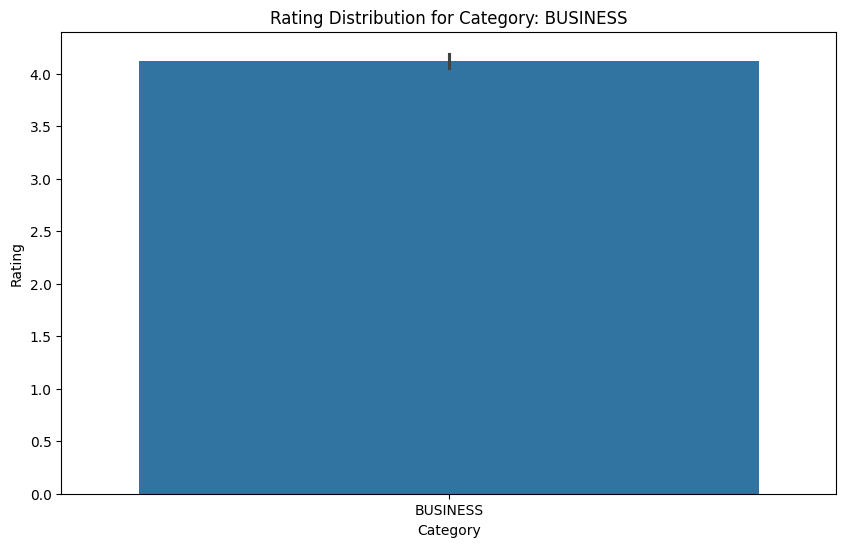

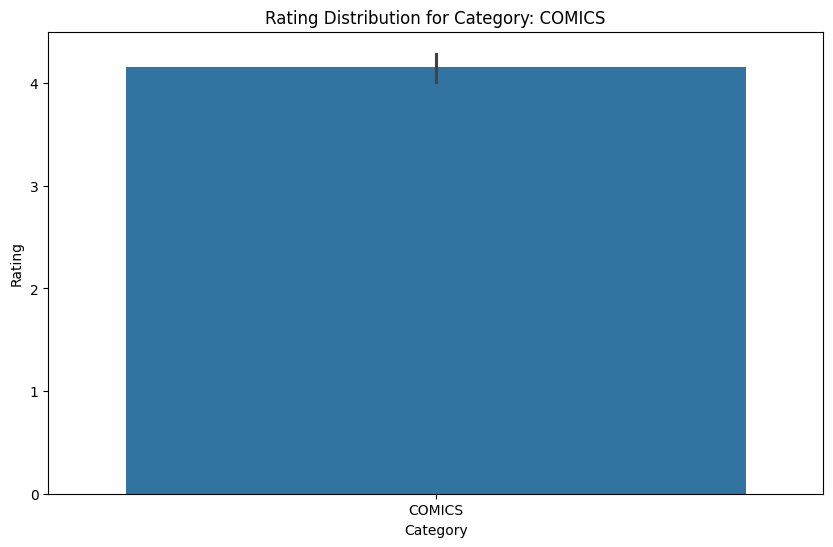

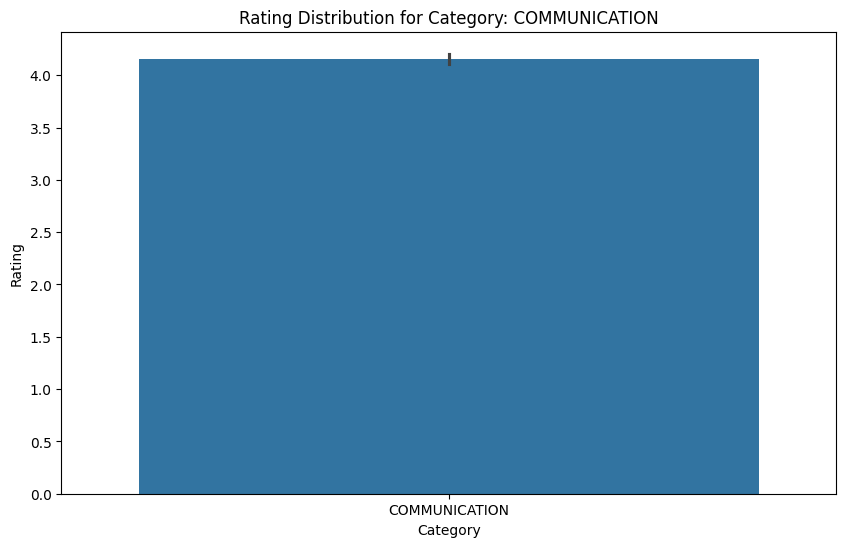

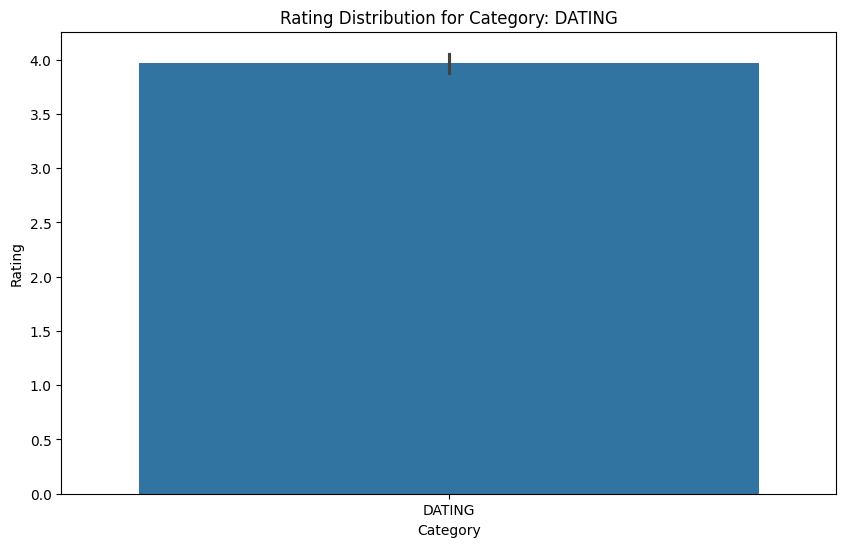

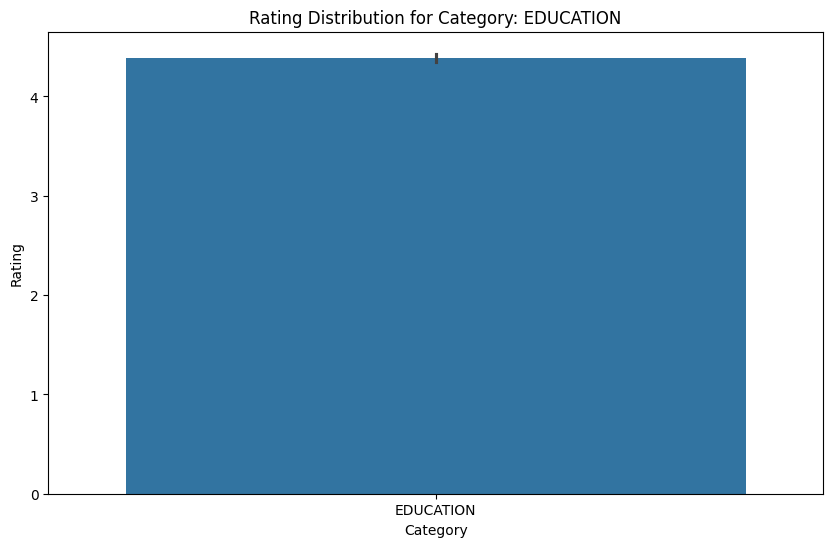

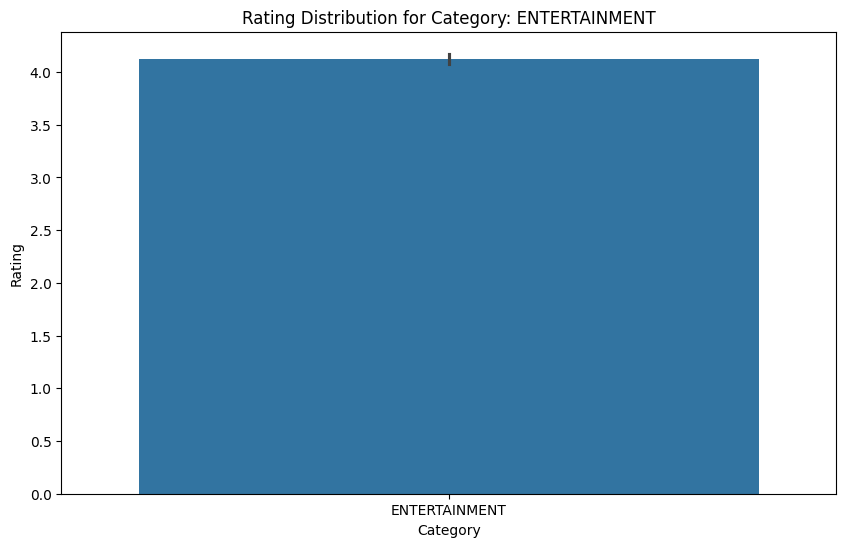

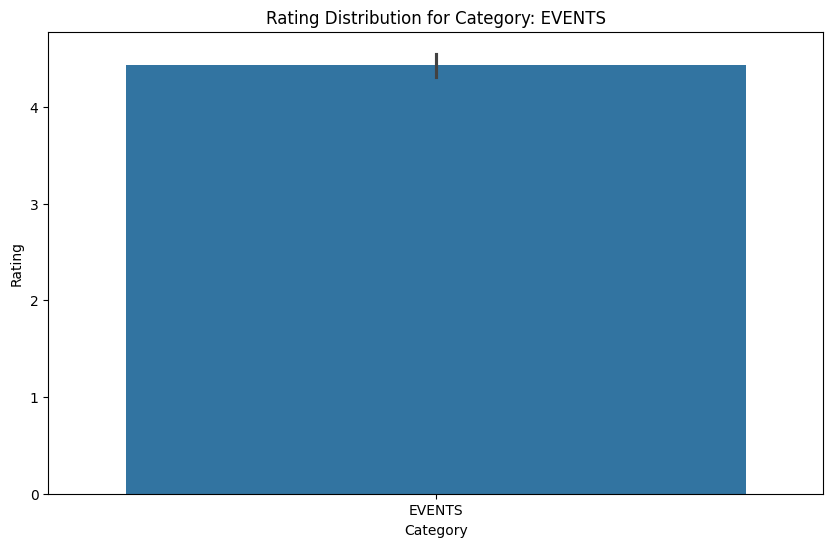

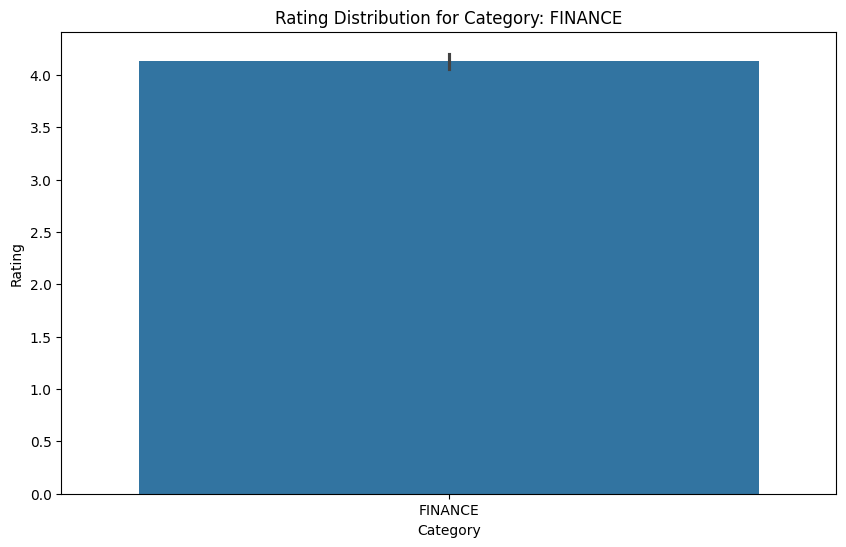

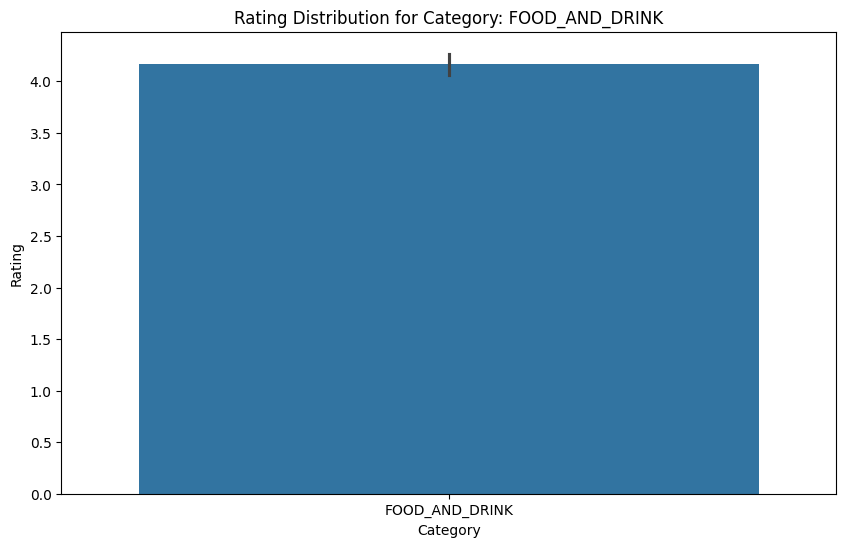

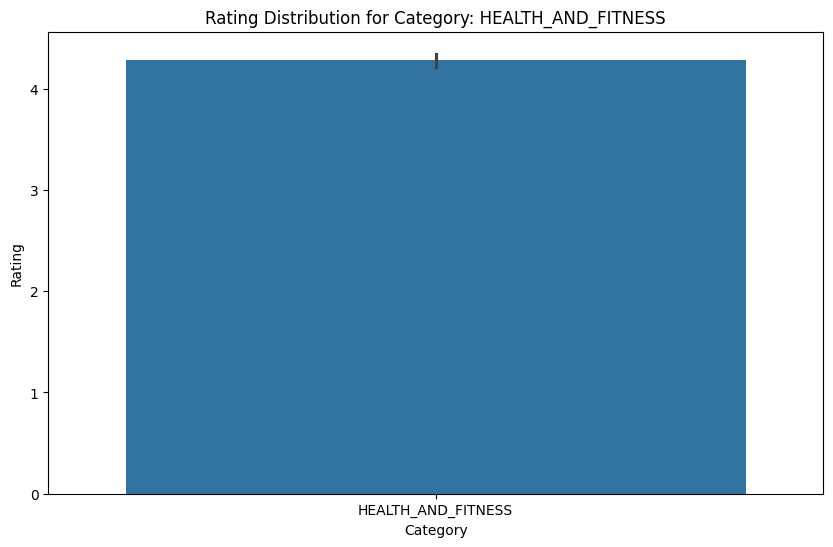

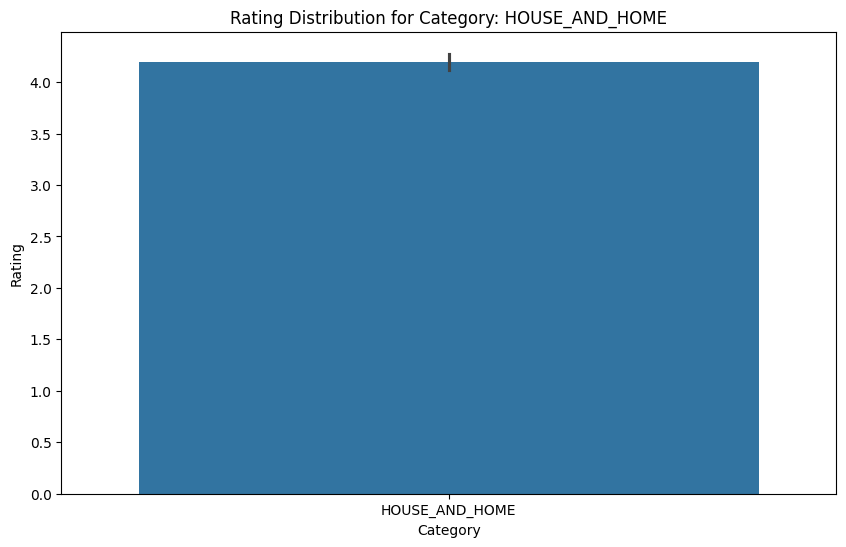

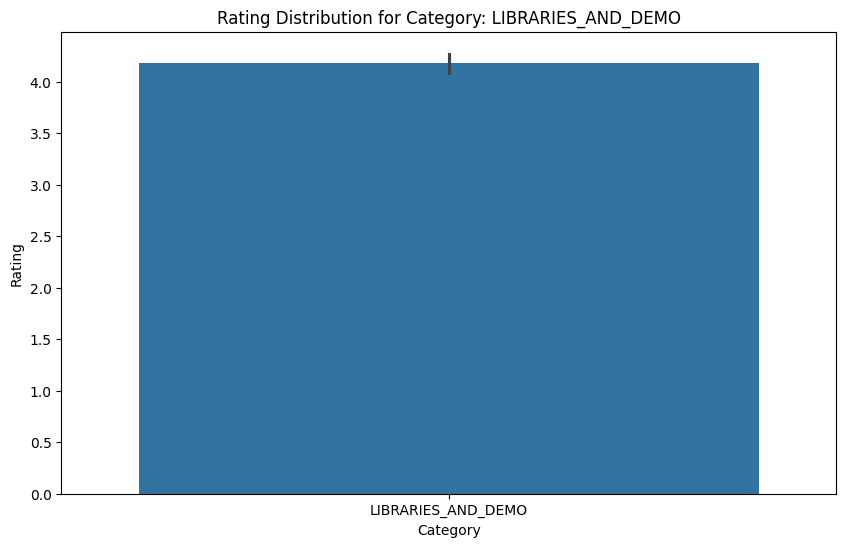

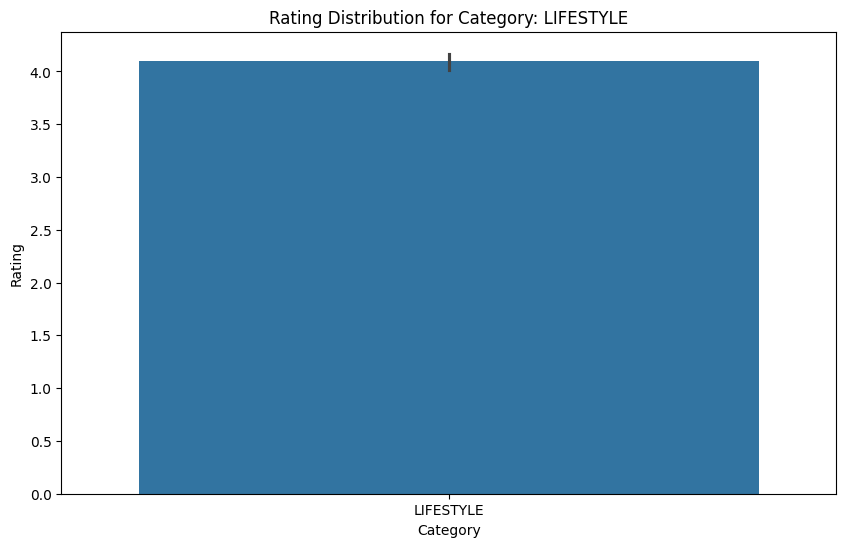

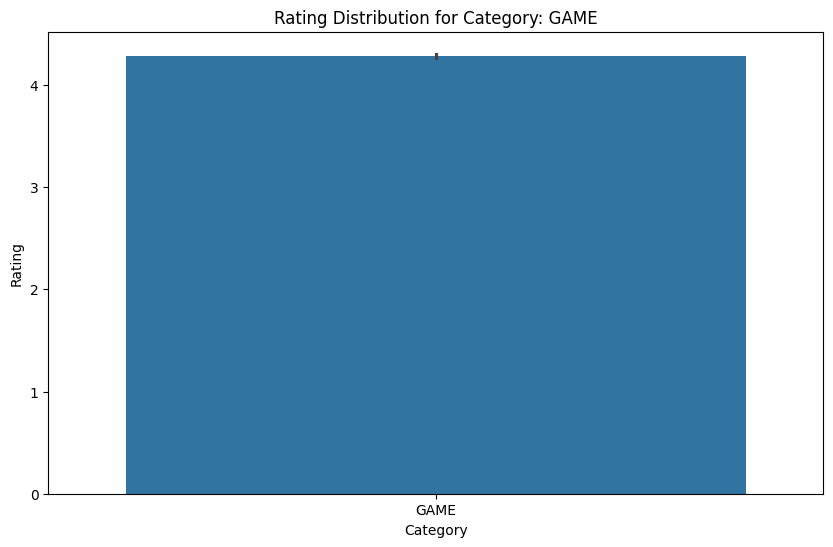

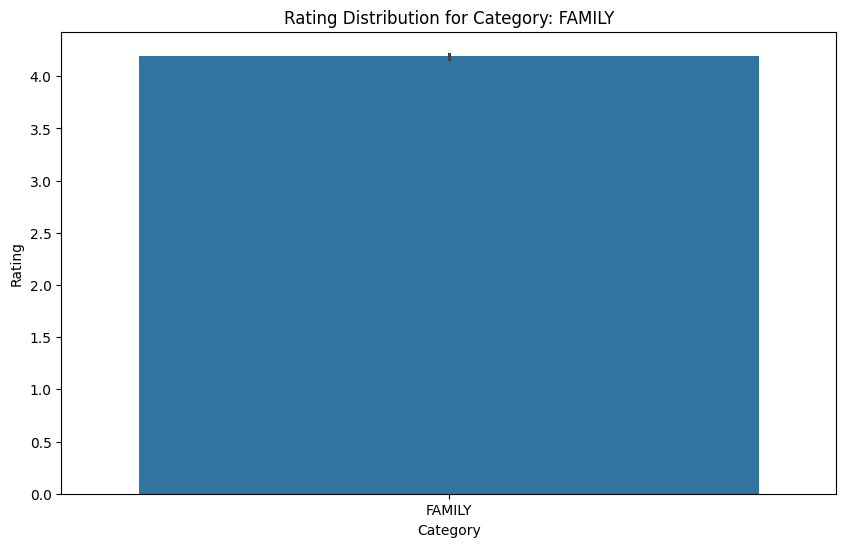

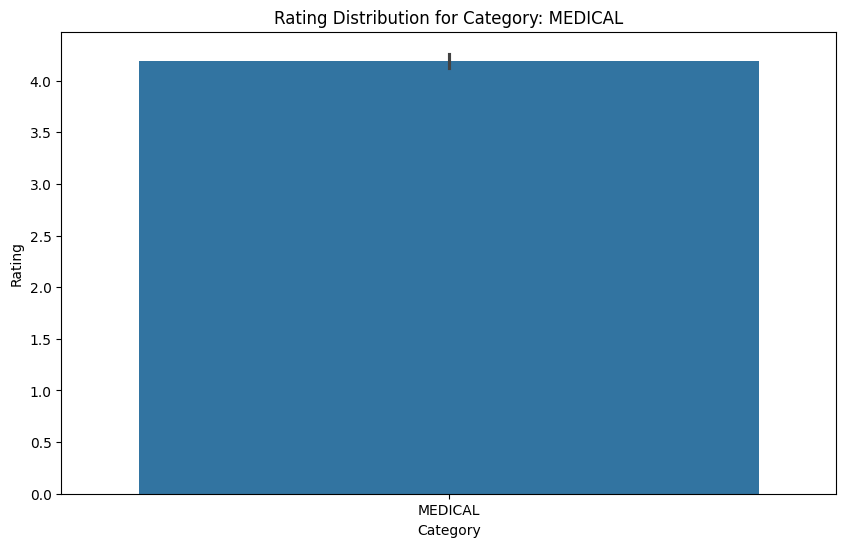

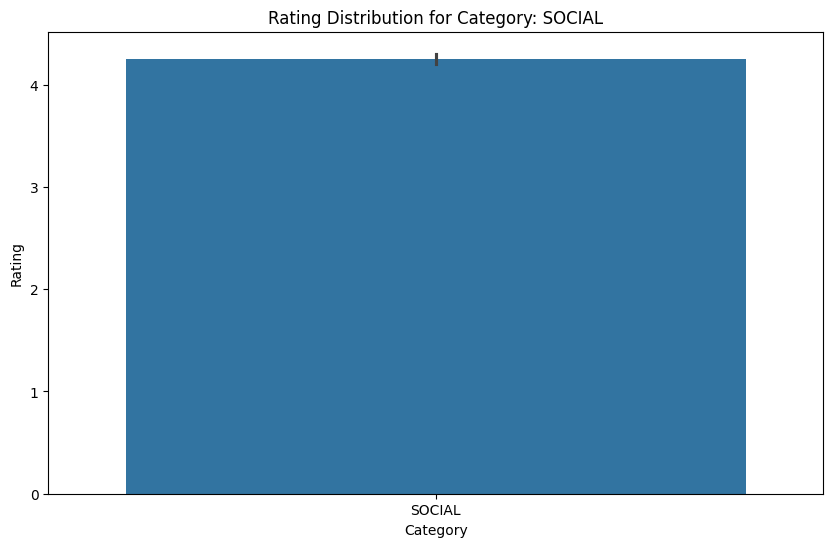

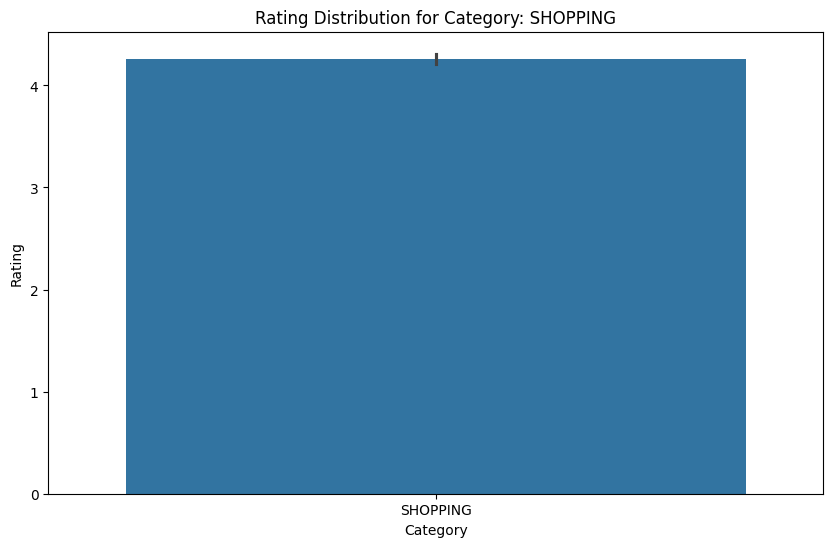

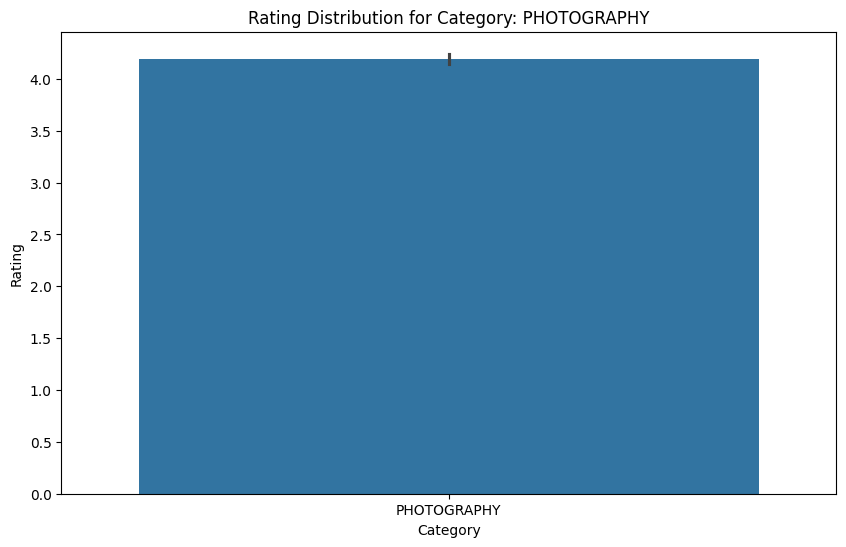

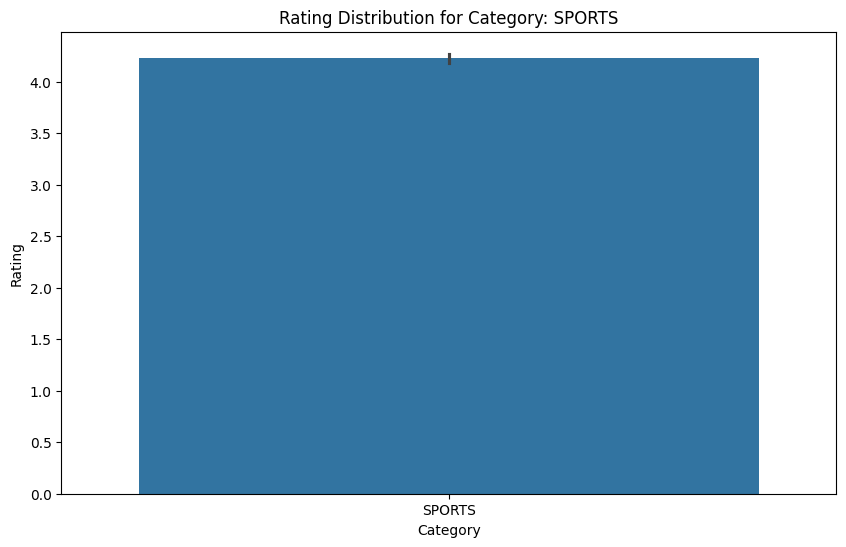

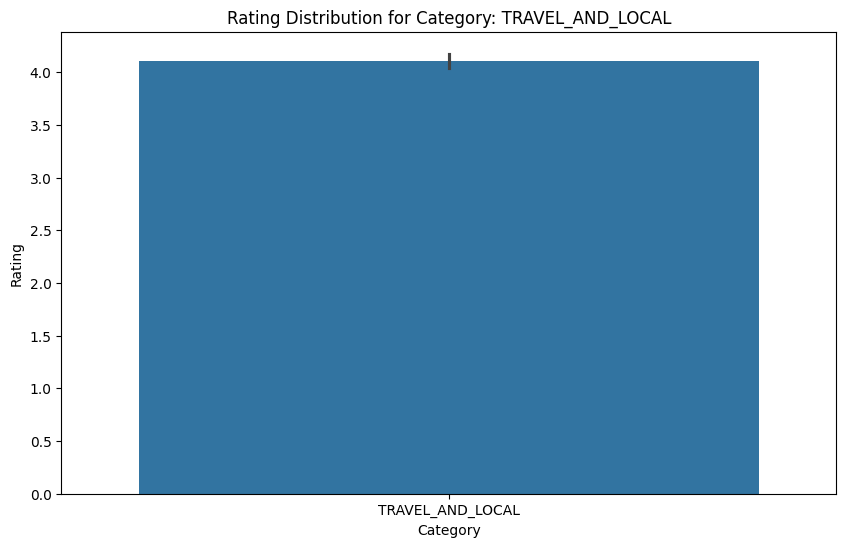

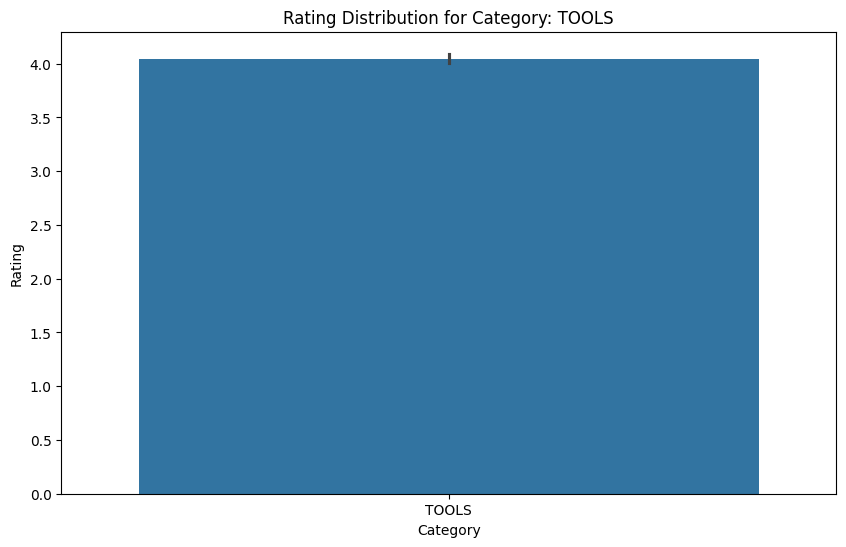

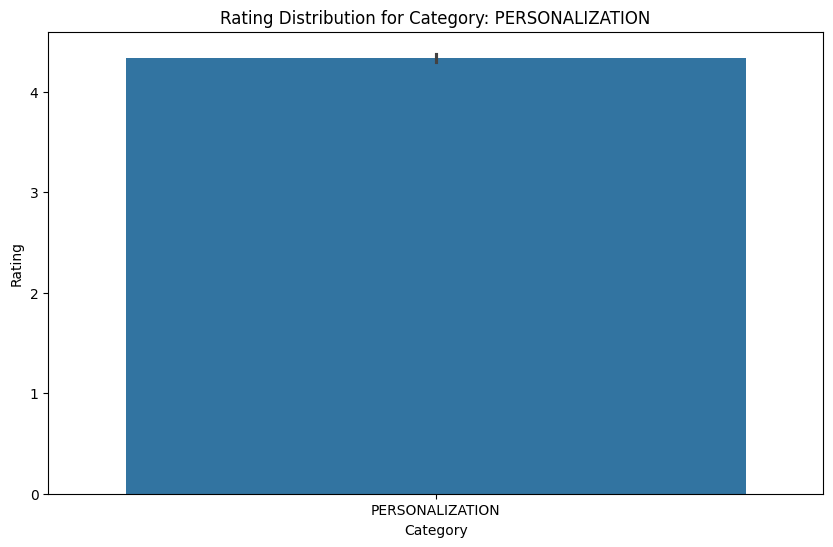

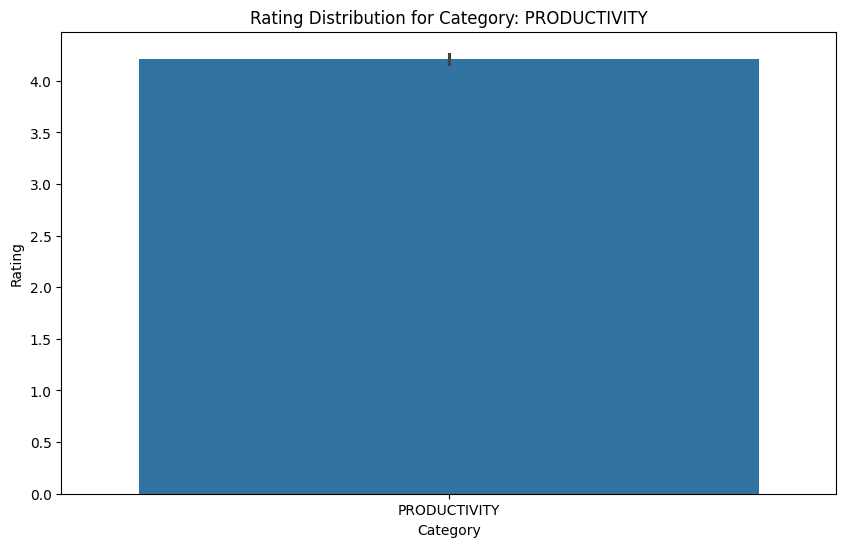

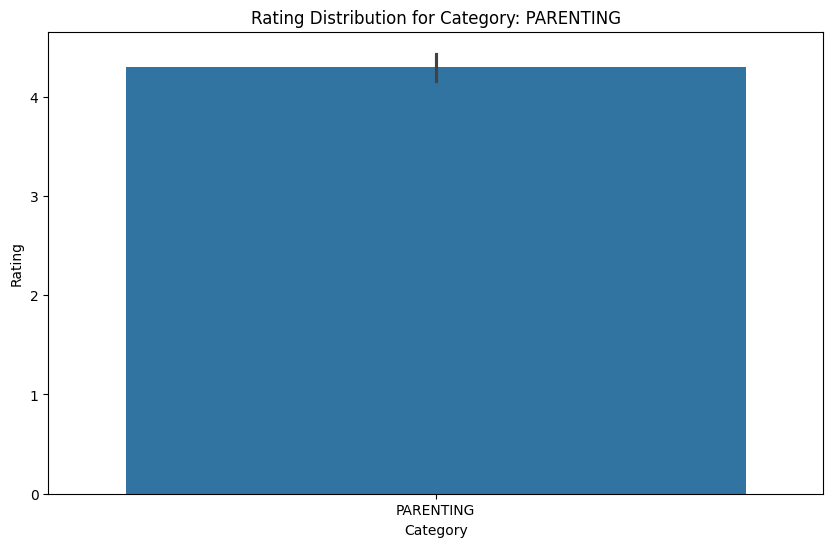

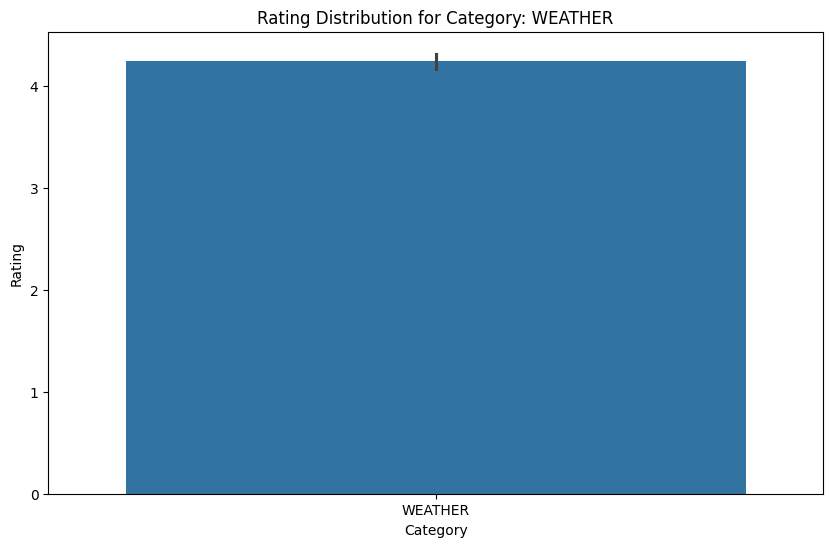

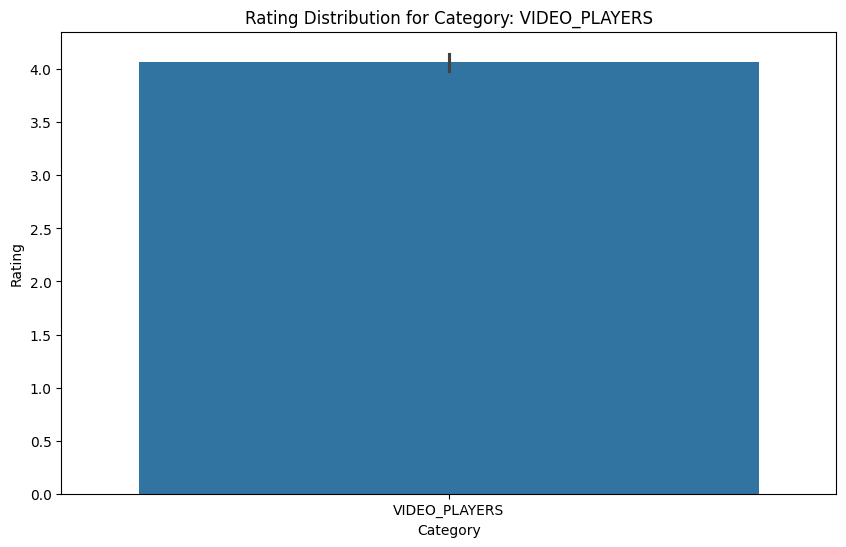

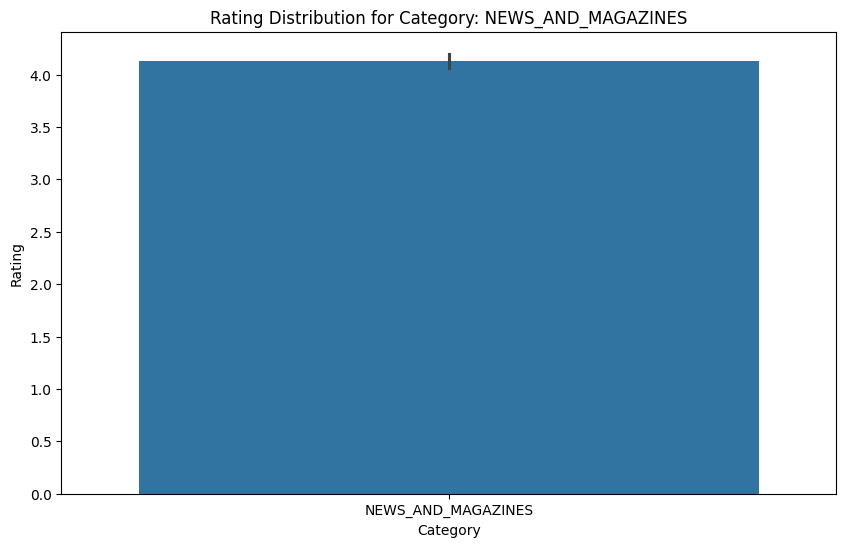

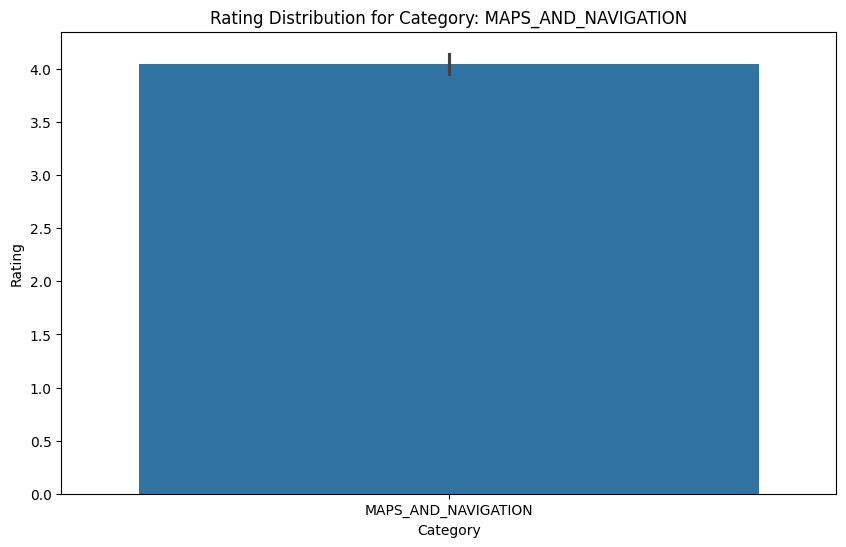

In [123]:
# prompt: Create seperate barplots for each element in category

import matplotlib.pyplot as plt
for i in df['Category'].unique():
    plt.figure(figsize=(10, 6))
    sns.barplot(data=df[df['Category'] == i], x='Category', y='Rating')
    plt.title(f'Rating Distribution for Category: {i}')
    plt.xlabel('Category')
    plt.ylabel('Rating')
    plt.show()


<ipython-input-124-8bdf43cb2f72>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 6))


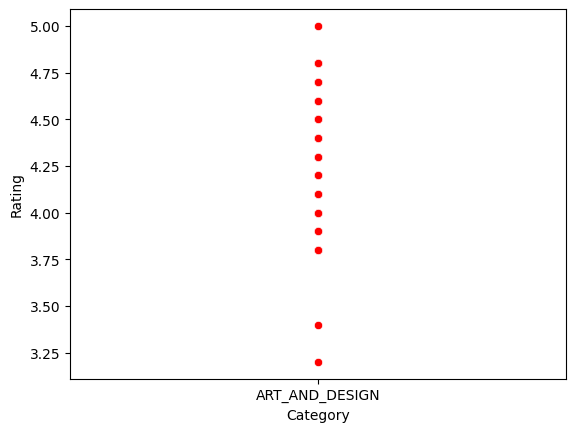

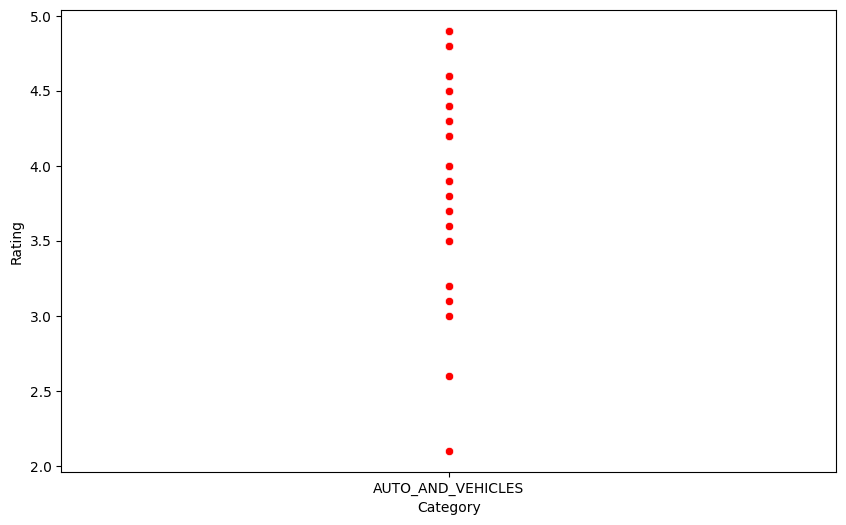

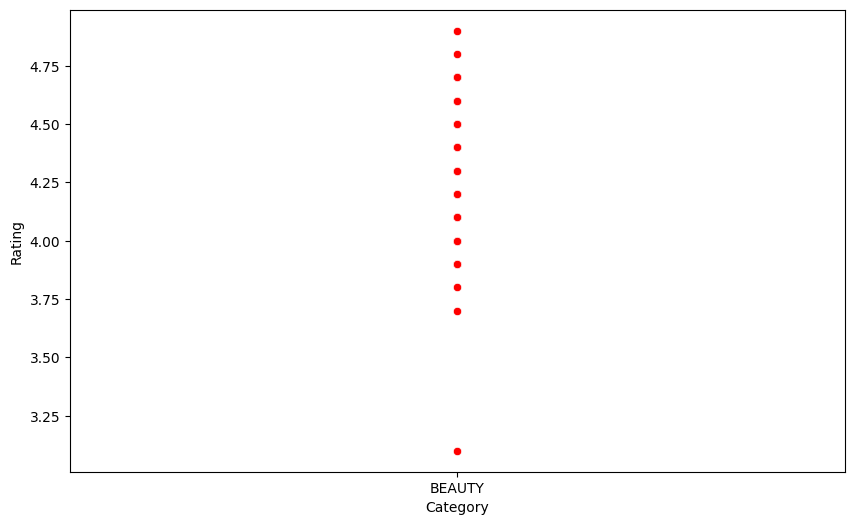

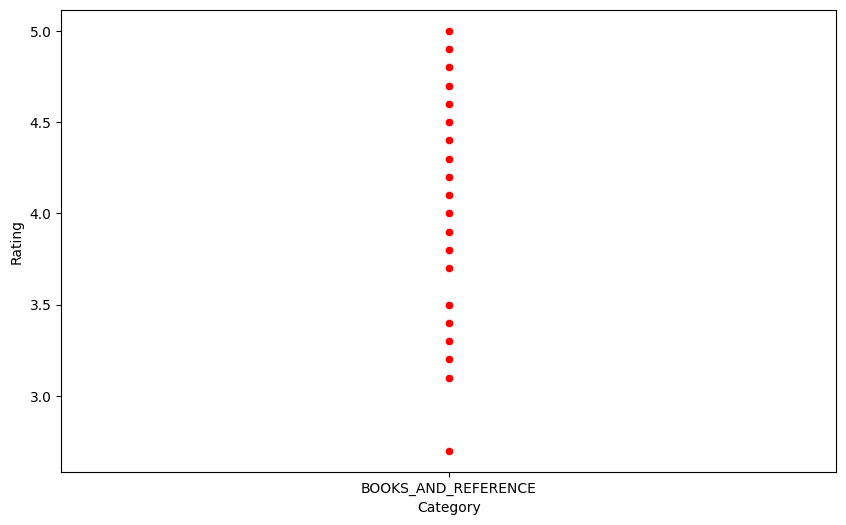

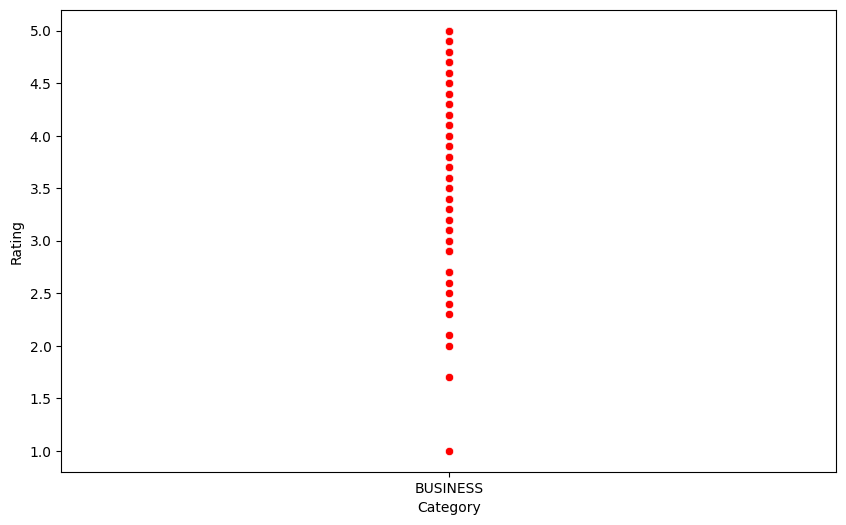

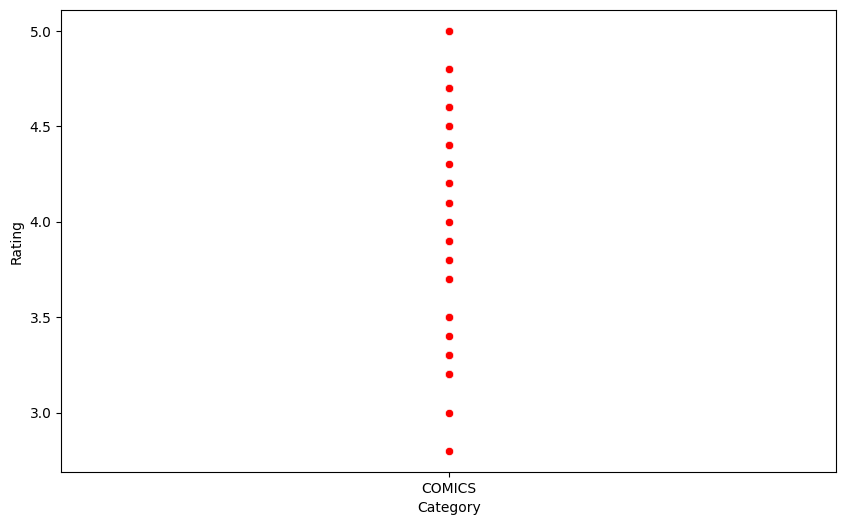

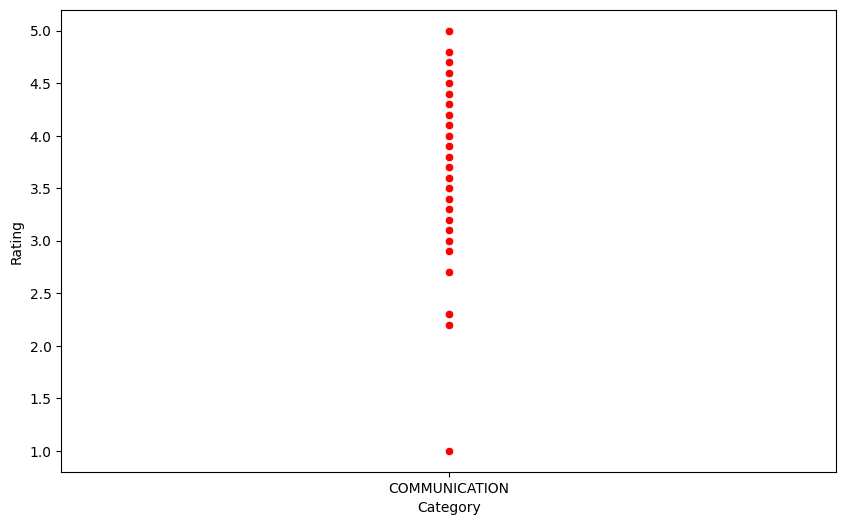

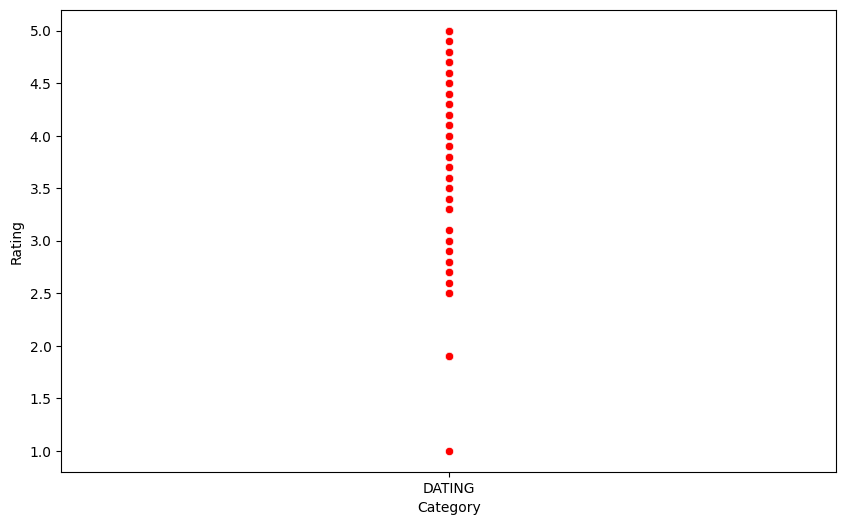

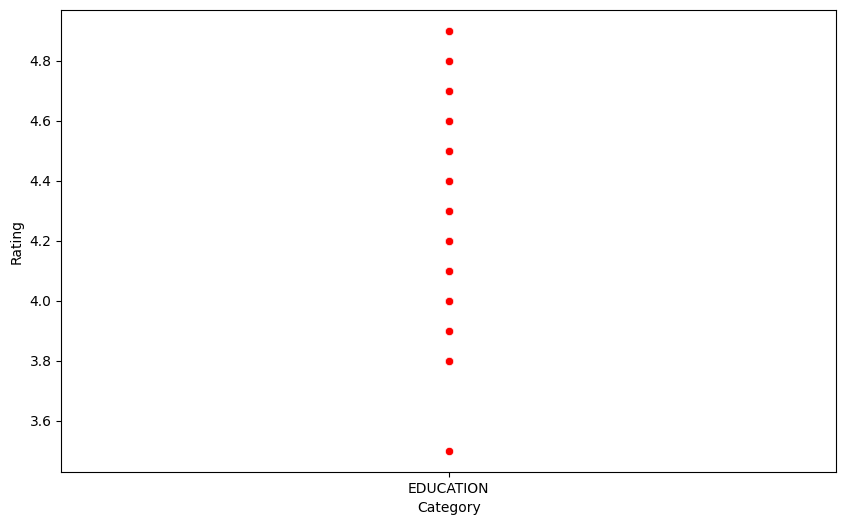

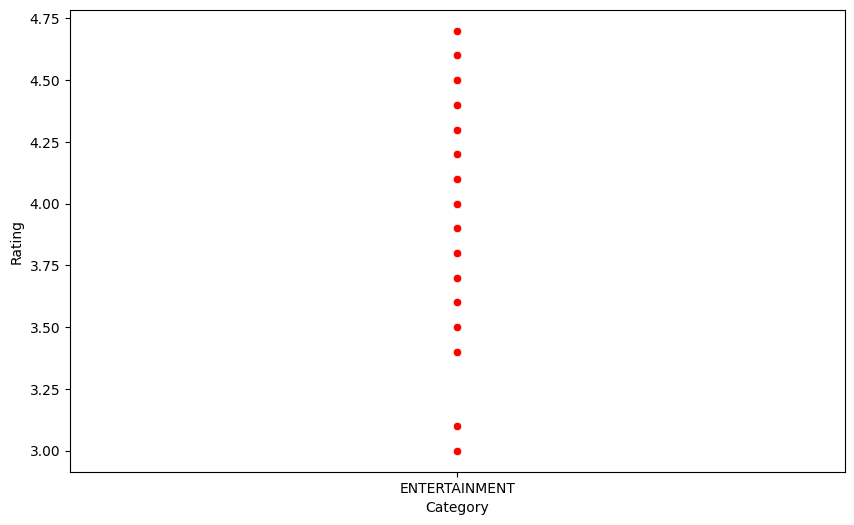

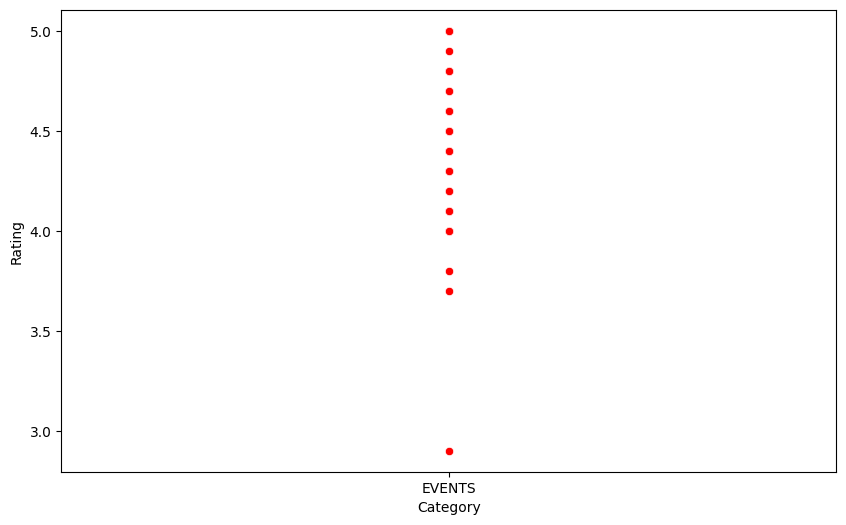

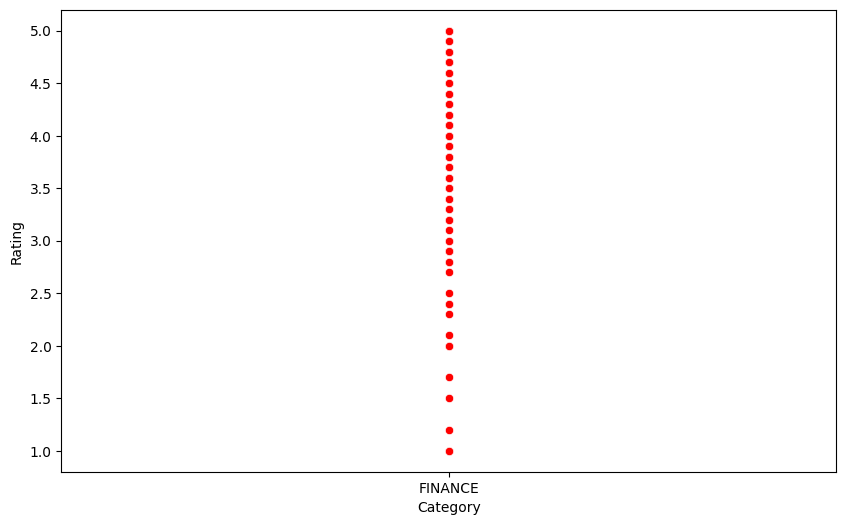

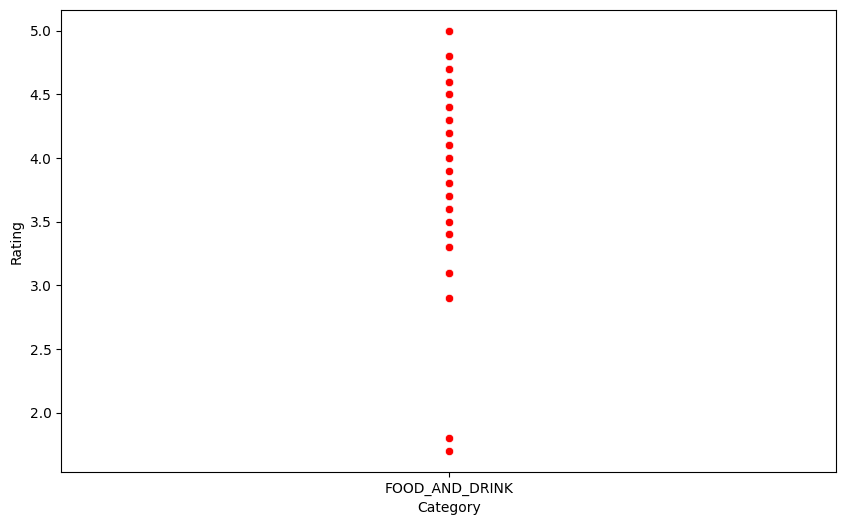

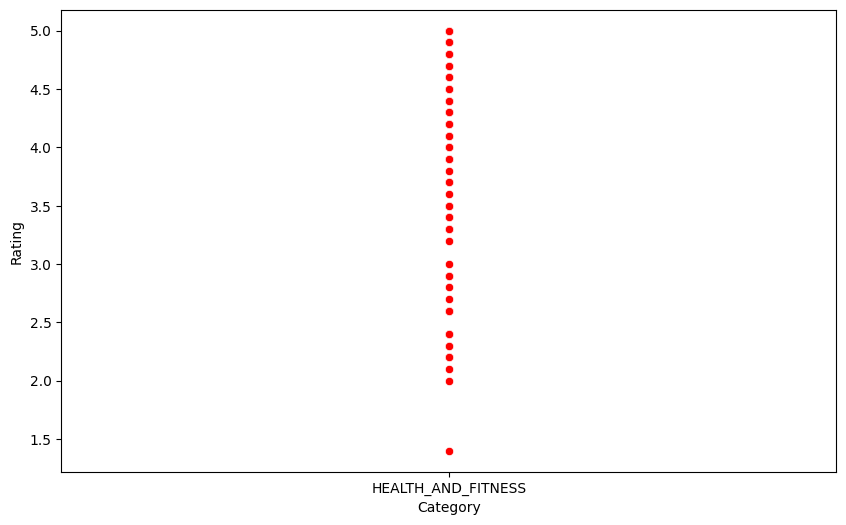

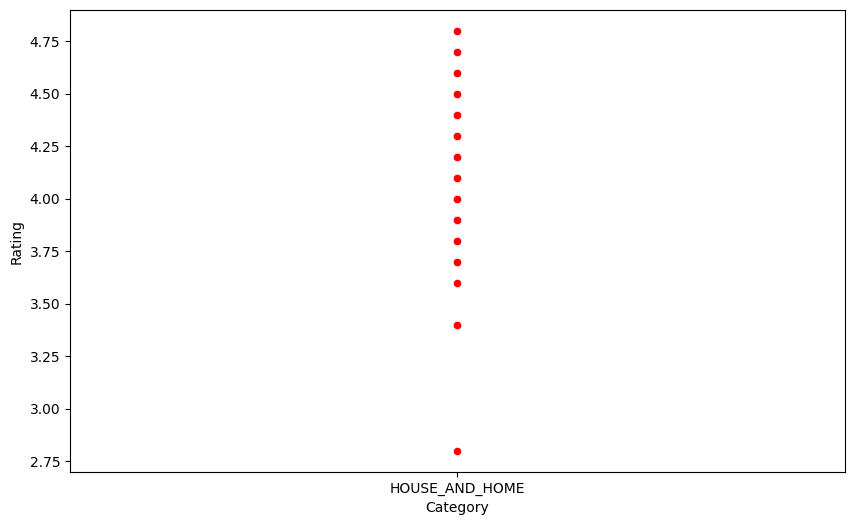

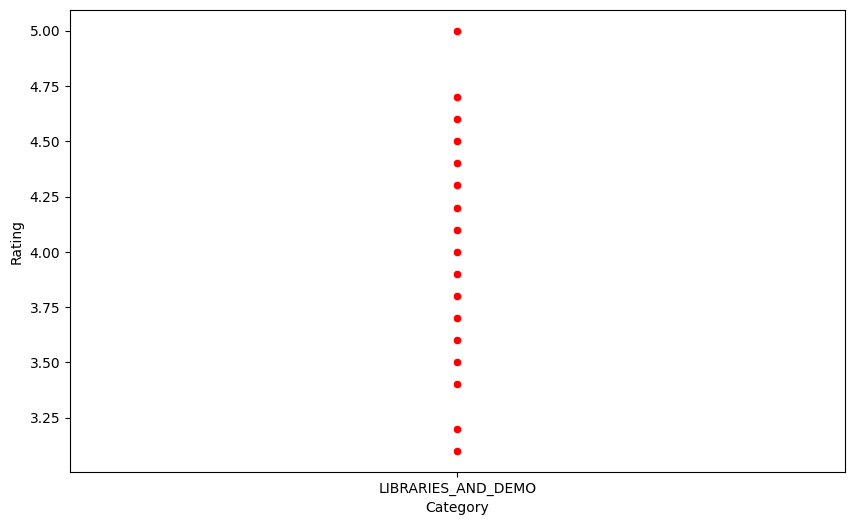

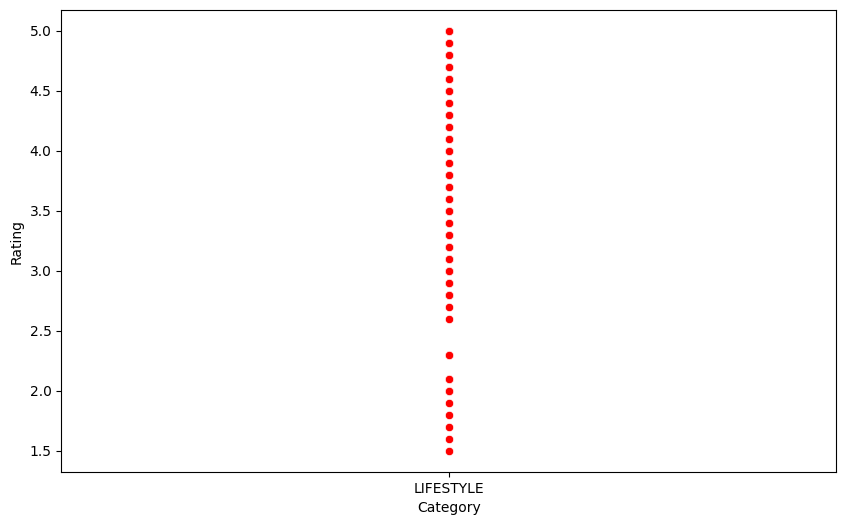

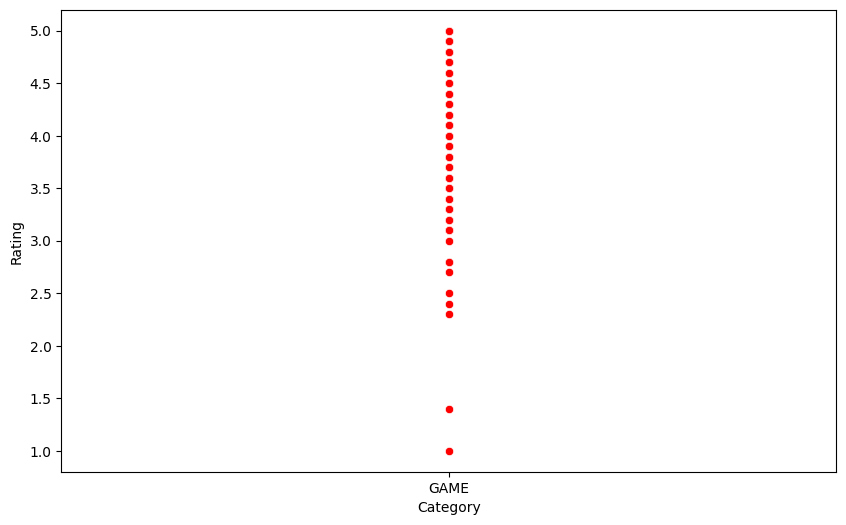

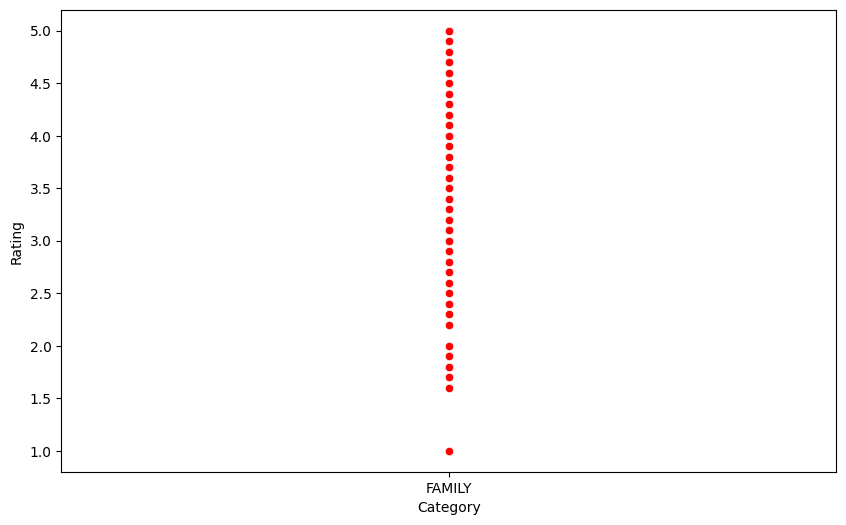

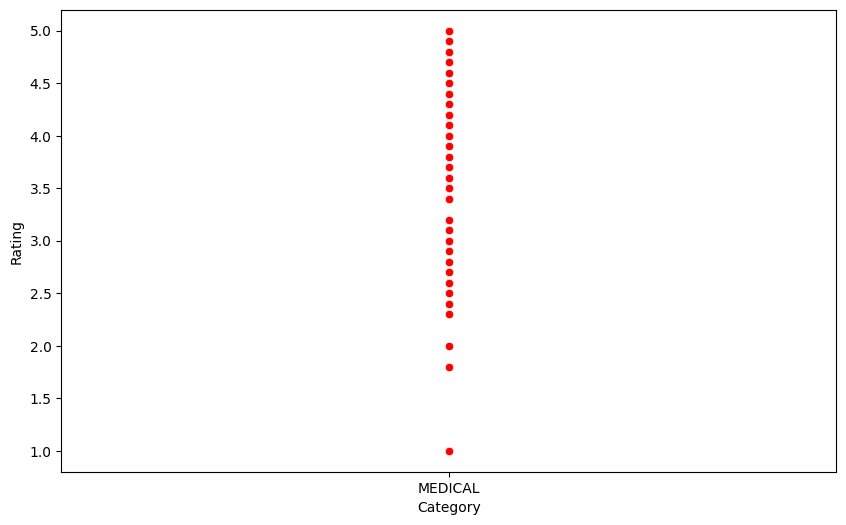

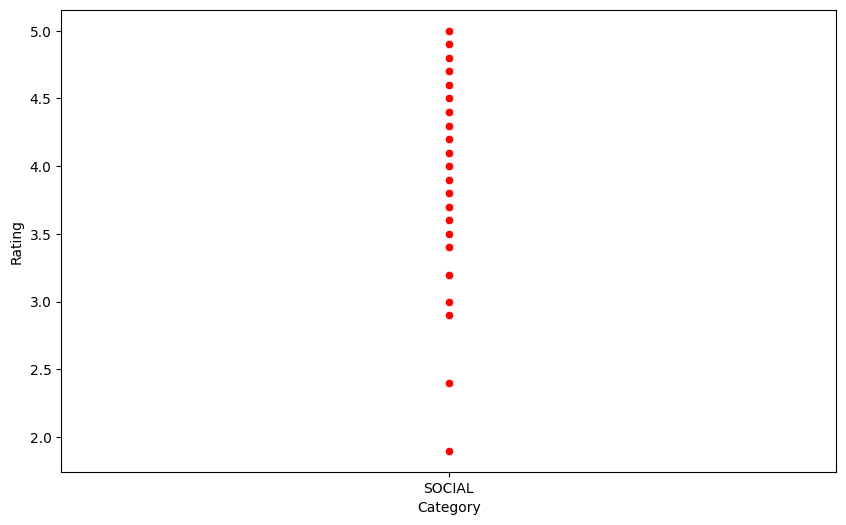

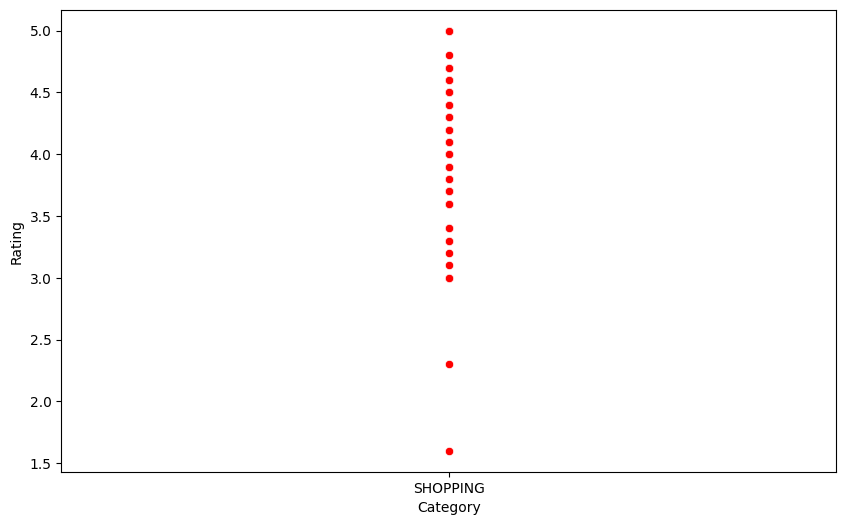

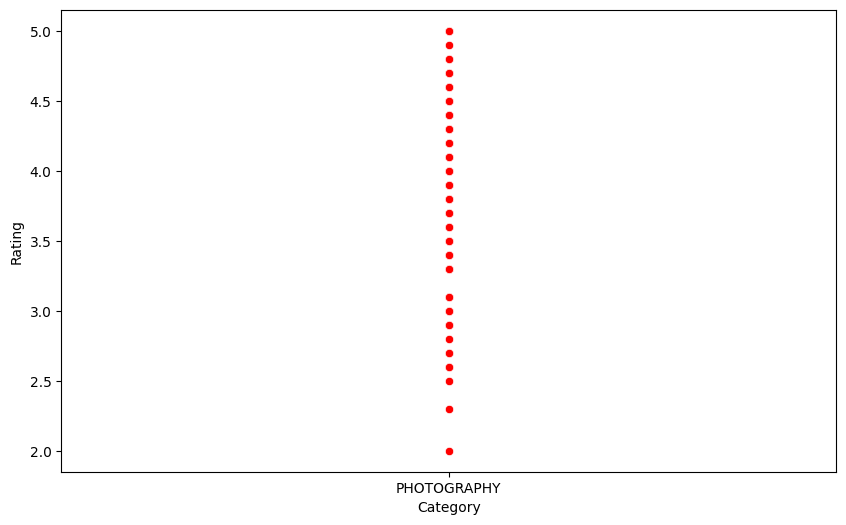

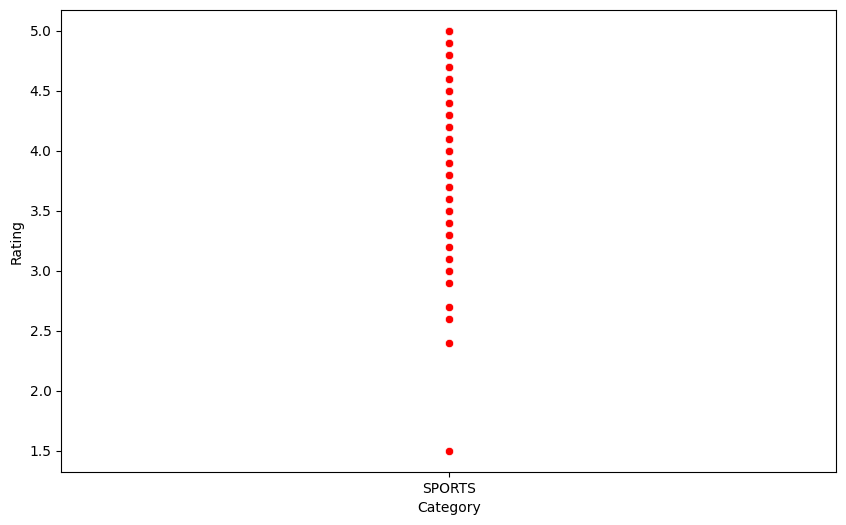

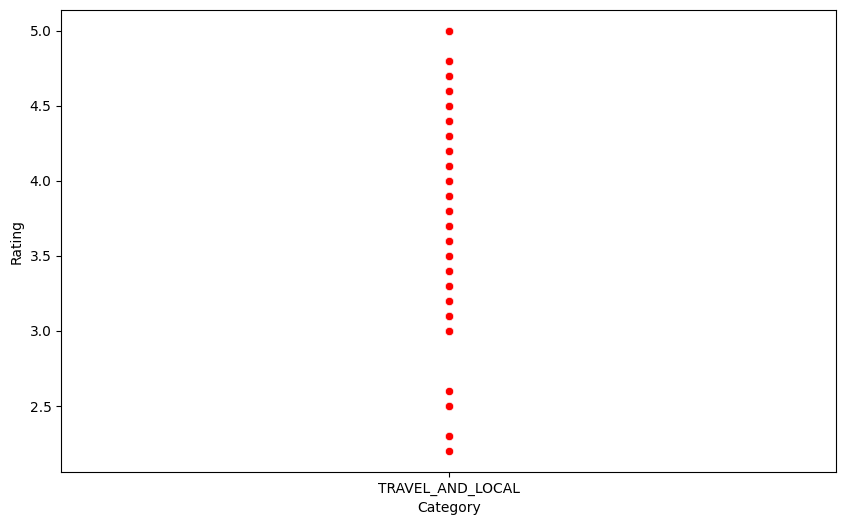

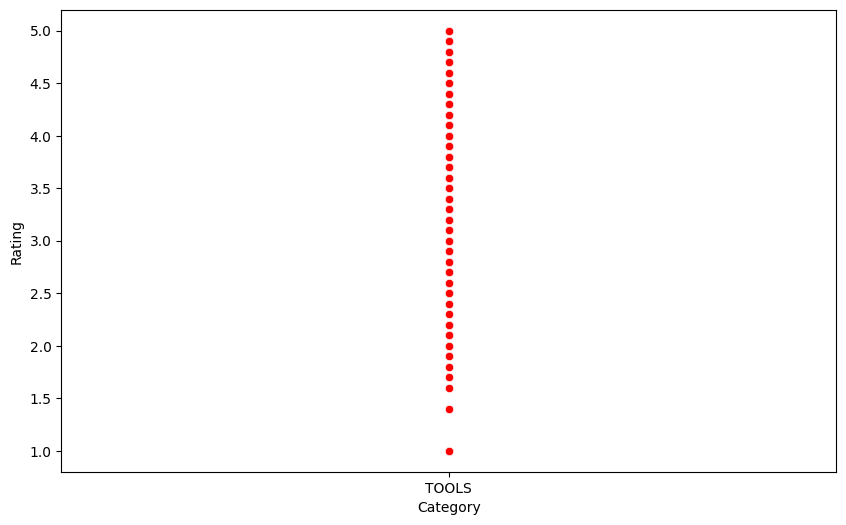

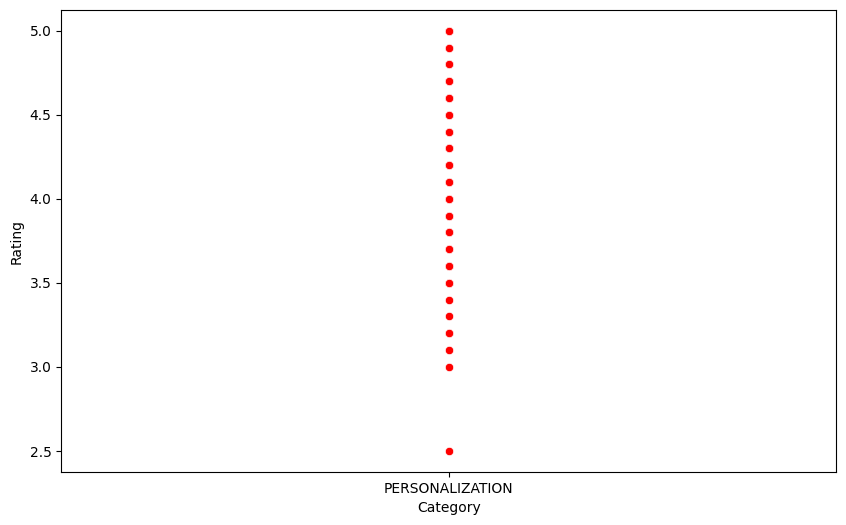

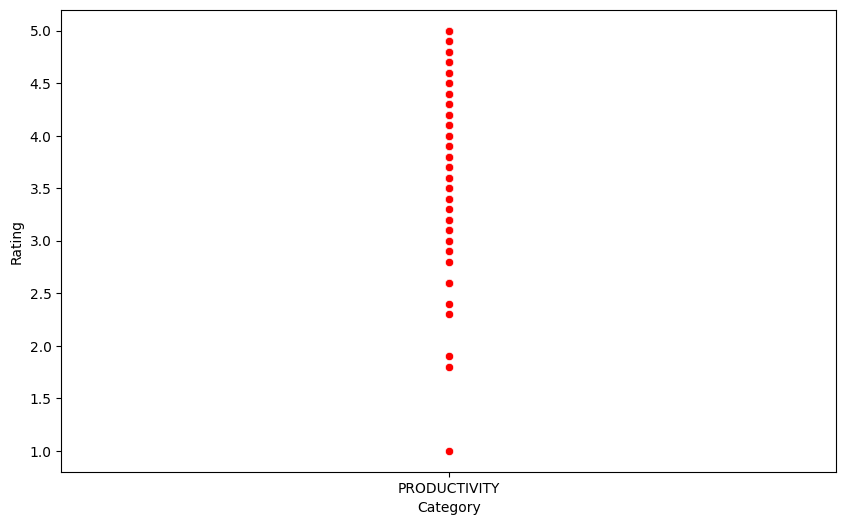

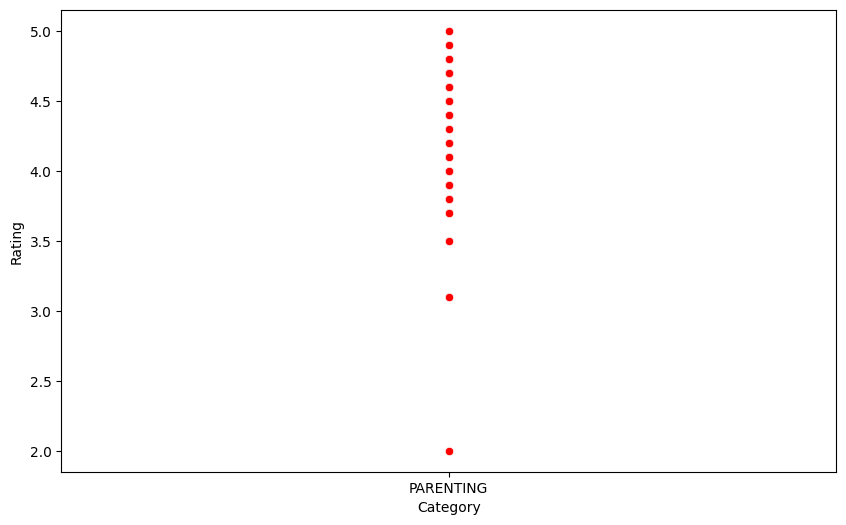

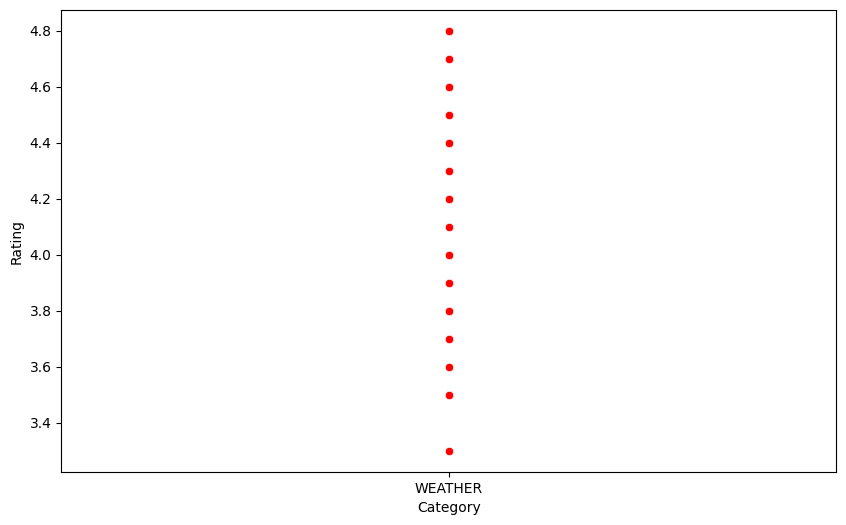

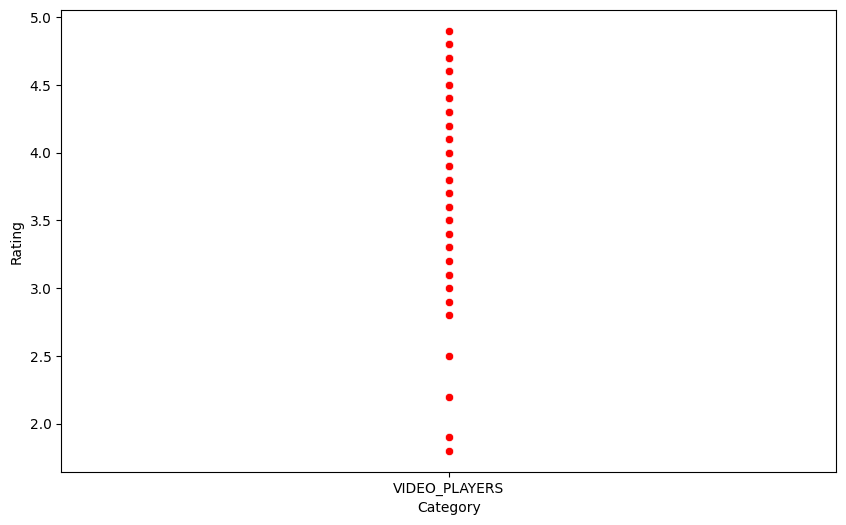

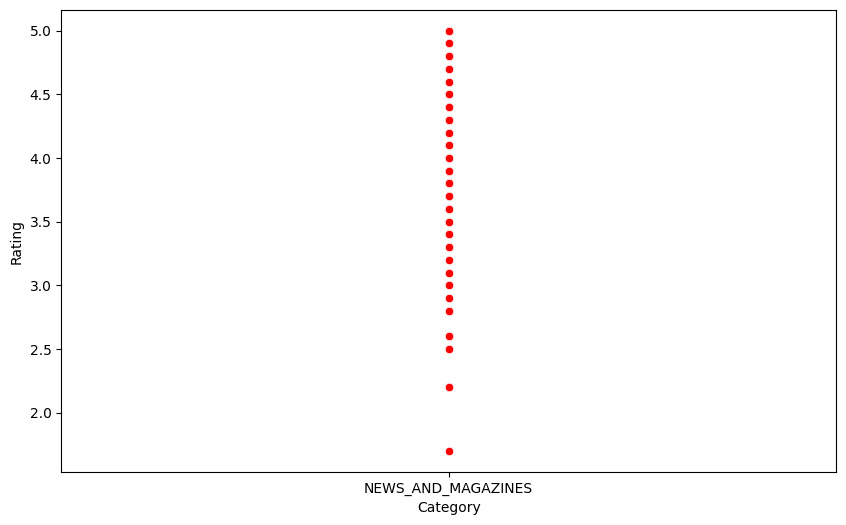

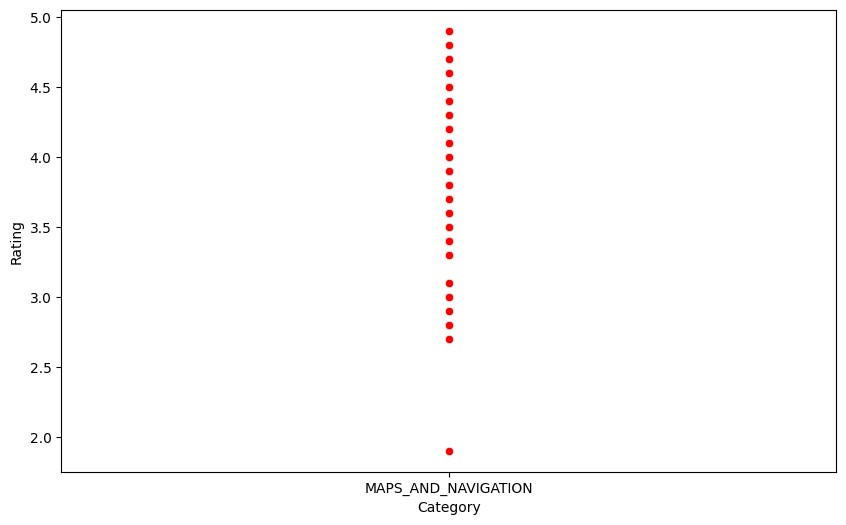

<Figure size 1000x600 with 0 Axes>

In [124]:
for i in df['Category'].unique():
  sns.scatterplot(data=df[df['Category'] == i], x='Category', y='Rating',color = "red")
  plt.figure(figsize=(10, 6))


In [125]:
#Data Query:-


In [126]:
df.columns

Index(['Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [127]:
df.loc[(df['Category'] == 'GAME') & (df['Rating'] > 4.0)]

Category  Rating   Reviews      Size       Installs  Type  Price  \
1653      GAME     4.5   4447388  67000000    100,000,000     0    0.0   
1654      GAME     4.5  27722264  76000000  1,000,000,000     0    0.0   
1655      GAME     4.4  22426677  74000000    500,000,000     0    0.0   
1656      GAME     4.7    254258  23000000     10,000,000     0    0.0   
1657      GAME     4.5    148897  46000000     10,000,000     0    0.0   
...        ...     ...       ...       ...            ...   ...    ...   
10787     GAME     4.1       297  48000000         50,000     0    0.0   
10792     GAME     4.2     21661  16000000      1,000,000     0    0.0   
10793     GAME     4.4     28510  78000000        500,000     0    0.0   
10803     GAME     4.3     56496  81000000      1,000,000     0    0.0   
10804     GAME     4.2      5442  17000000        100,000     0    0.0   

       Content Rating                        Genres Last Updated Current Ver  \
1653                2  Adventure;Action & Adventure   2018-07-31  4.1 and up   
1654                2                        Arcade   2018-07-12  4.1 and up   
1655                1                        Casual   2018-07-05  4.1 and up   
1656                1                          Card   2018-08-01  4.1 and up   
1657                1                        Casual   2018-07-17  4.1 and up   
...               ...                           ...          ...         ...   
10787               4                        Action   2018-03-28  4.1 and up   
10792               1                        Trivia   2018-05-24  4.1 and up   
10793               4                          Card   2018-08-01  4.1 and up   
10803               4                        Action   2018-08-07  4.1 and up   
10804               4                          Card   2018-05-22  4.1 and up   

      Android Ver  
1653          4.1  
1654          4.1  
1655          4.1  
1656          4.1  
1657        4.0.3  
...           ...  
10787         4.1  
10792         4.0  
10793       4.0.3  
10803         4.0  
10804         2.3  

[893 rows x 12 columns]

In [128]:
game01 = df.loc[(df['Category'] == 'GAME') & (df['Rating'] > 4.0)]

<Axes: xlabel='Rating', ylabel='Count'>

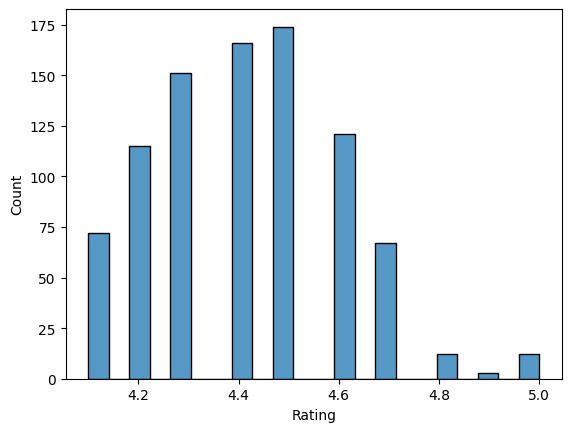

In [129]:
sns.histplot(game01['Rating'])

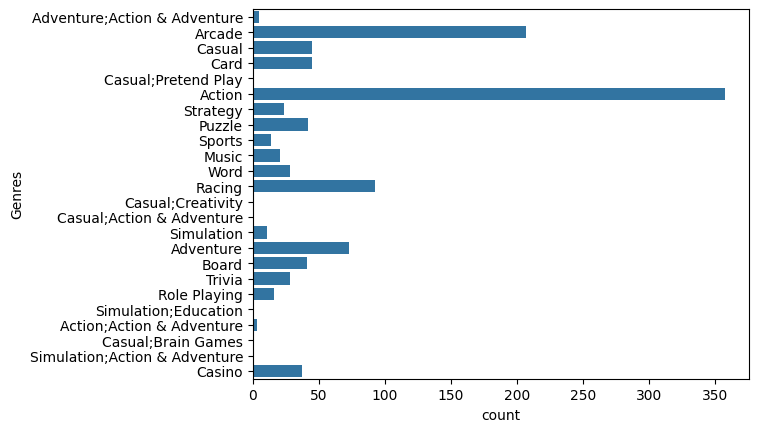

In [130]:
sns.countplot(game0001.Genres)
total_genre_count_games = game0001['Genres'].value_counts()

In [131]:
for i in game0001['Genres'].unique():
  if total_genre_count_games[i] < 10:
    game0001 = game0001.drop(game0001[game0001['Genres'] == i].index)

<Axes: xlabel='count', ylabel='Genres'>

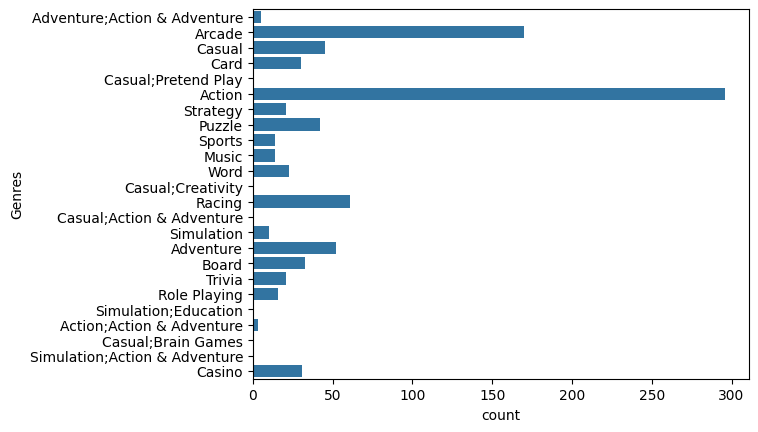

In [132]:
sns.countplot(game01['Genres'])

In [133]:
genre_counts = df['Genres'].value_counts()
selected_genres = genre_counts[genre_counts < 10].index
selected_genres

Index(['Entertainment;Brain Games', 'Casual;Creativity',
       'Role Playing;Action & Adventure', 'Education;Creativity',
       'Art & Design;Creativity', 'Parenting;Music & Video',
       'Educational;Brain Games', 'Education;Action & Adventure',
       'Puzzle;Action & Adventure', 'Education;Music & Video',
       'Educational;Creativity', 'Role Playing;Pretend Play',
       'Educational;Action & Adventure', 'Simulation;Pretend Play',
       'Education;Brain Games', 'Sports;Action & Adventure',
       'Parenting;Education', 'Entertainment;Action & Adventure',
       'Simulation;Education', 'Video Players & Editors;Music & Video',
       'Entertainment;Creativity', 'Music;Music & Video',
       'Board;Action & Adventure', 'Casual;Education',
       'Books & Reference;Education', 'Art & Design;Pretend Play',
       'Adventure;Education', 'Puzzle;Creativity', 'Card;Action & Adventure',
       'Video Players & Editors;Creativity', 'Entertainment;Pretend Play',
       'Casual;Music & Vi

In [134]:
game0001 = df.loc[df['Category'] == "GAME"]

In [135]:
game0001.head()

Category  Rating   Reviews      Size       Installs  Type  Price  \
1653     GAME     4.5   4447388  67000000    100,000,000     0    0.0   
1654     GAME     4.5  27722264  76000000  1,000,000,000     0    0.0   
1655     GAME     4.4  22426677  74000000    500,000,000     0    0.0   
1656     GAME     4.7    254258  23000000     10,000,000     0    0.0   
1657     GAME     4.5    148897  46000000     10,000,000     0    0.0   

      Content Rating                        Genres Last Updated Current Ver  \
1653               2  Adventure;Action & Adventure   2018-07-31  4.1 and up   
1654               2                        Arcade   2018-07-12  4.1 and up   
1655               1                        Casual   2018-07-05  4.1 and up   
1656               1                          Card   2018-08-01  4.1 and up   
1657               1                        Casual   2018-07-17  4.1 and up   

     Android Ver  
1653         4.1  
1654         4.1  
1655         4.1  
1656         4.1  
1657       4.0.3

In [136]:
game0001.loc[game0001['Genres'].isin(selected_genres)]

Category  Rating Reviews      Size    Installs  Type  Price  \
1687     GAME     4.1   68057  85000000  10,000,000     0   0.00   
1835     GAME     4.5   18125  15000000     100,000     1   4.99   

      Content Rating                Genres Last Updated Current Ver  \
1687               1     Casual;Creativity   2018-07-30  4.1 and up   
1835               1  Simulation;Education   2018-07-09  4.1 and up   

     Android Ver  
1687         4.1  
1835         4.4

<ipython-input-137-26835ad69712>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 6))


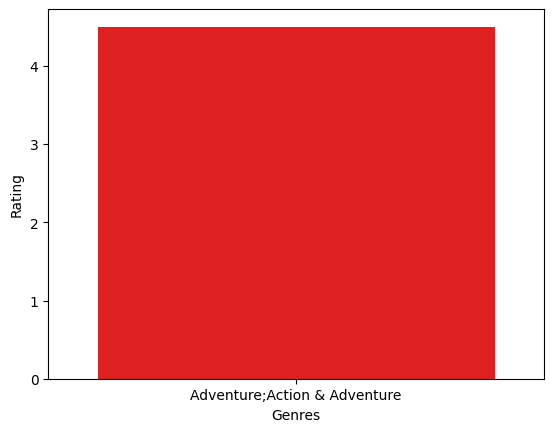

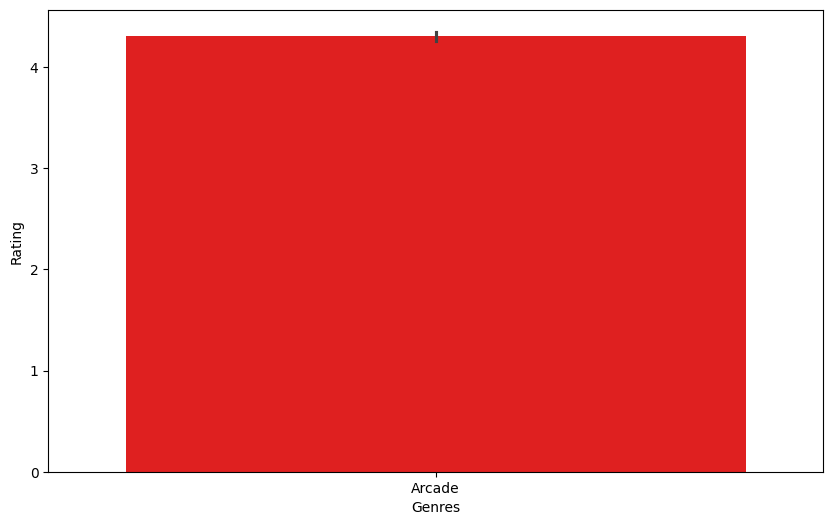

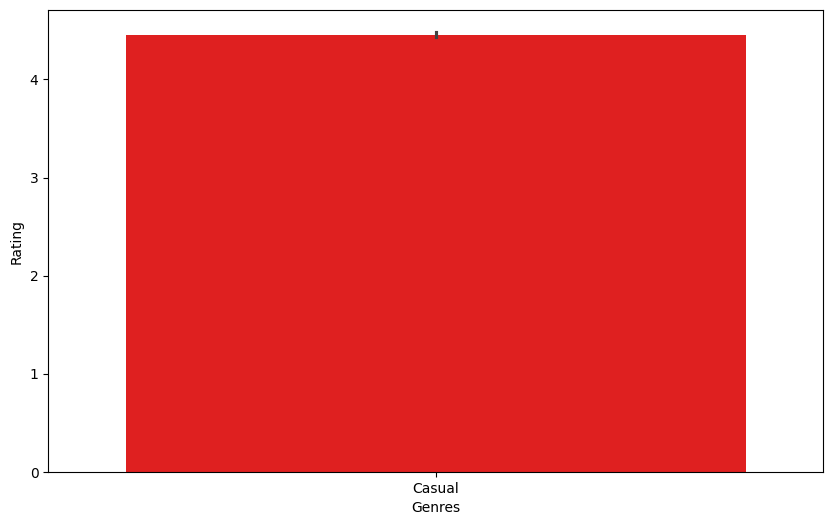

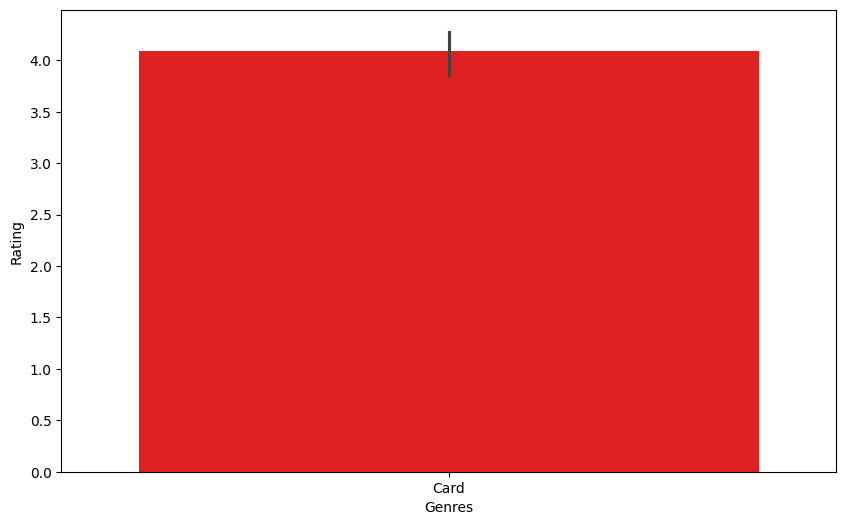

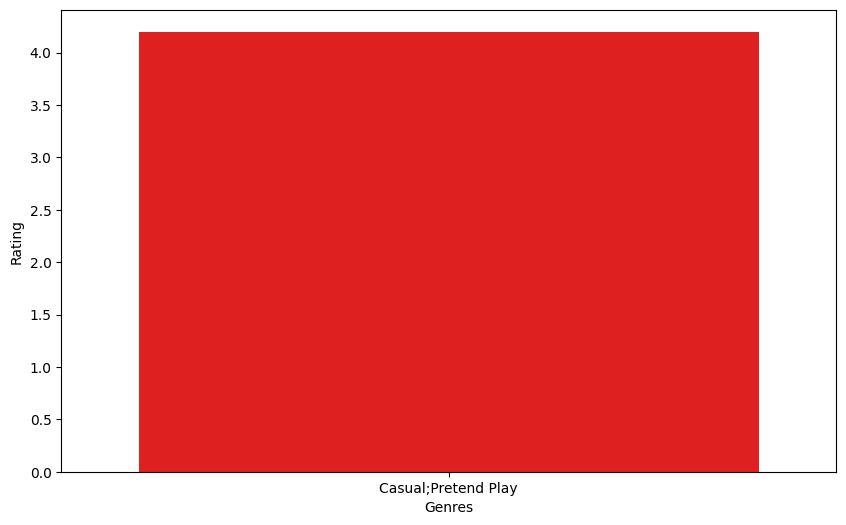

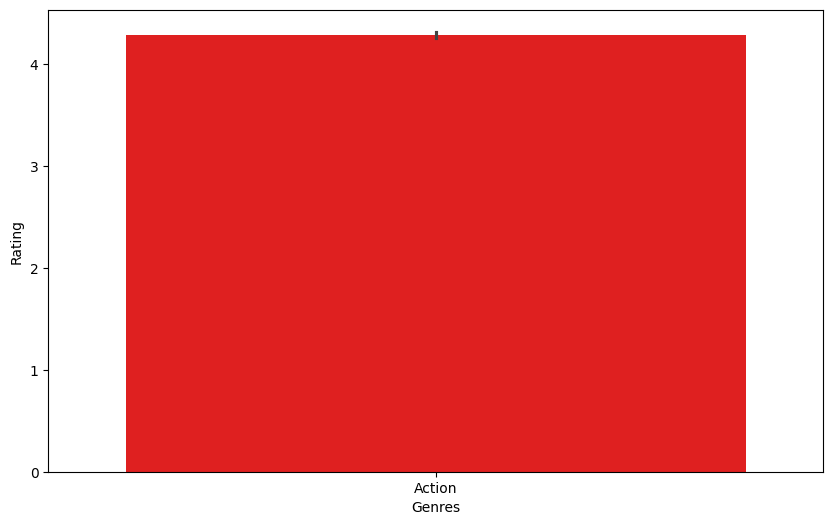

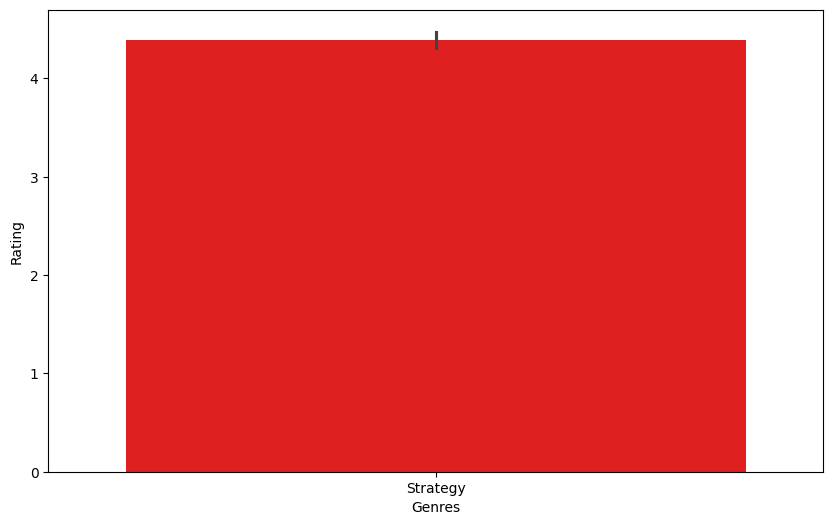

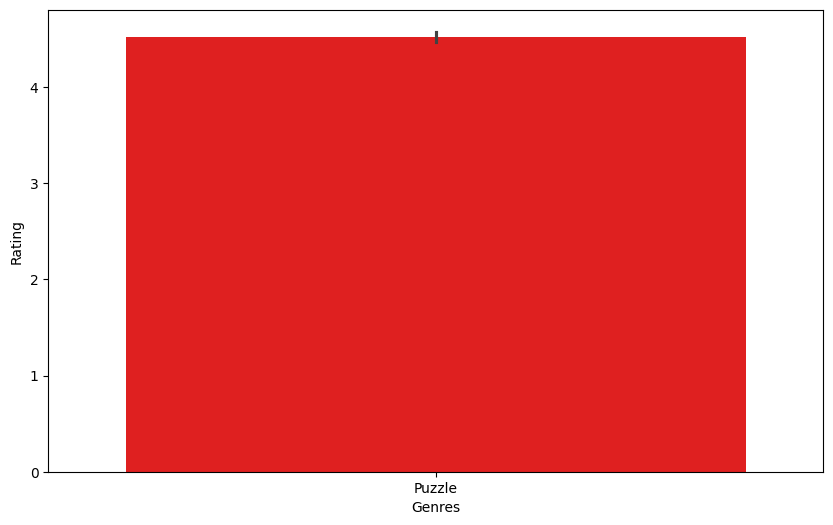

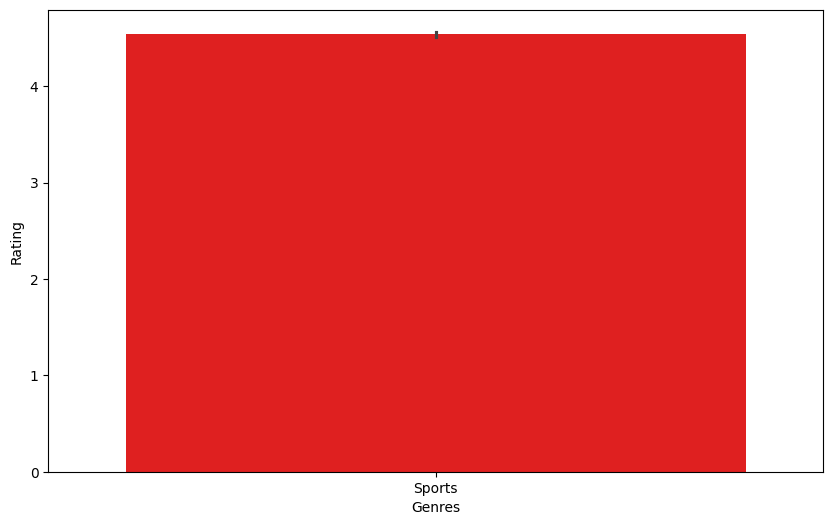

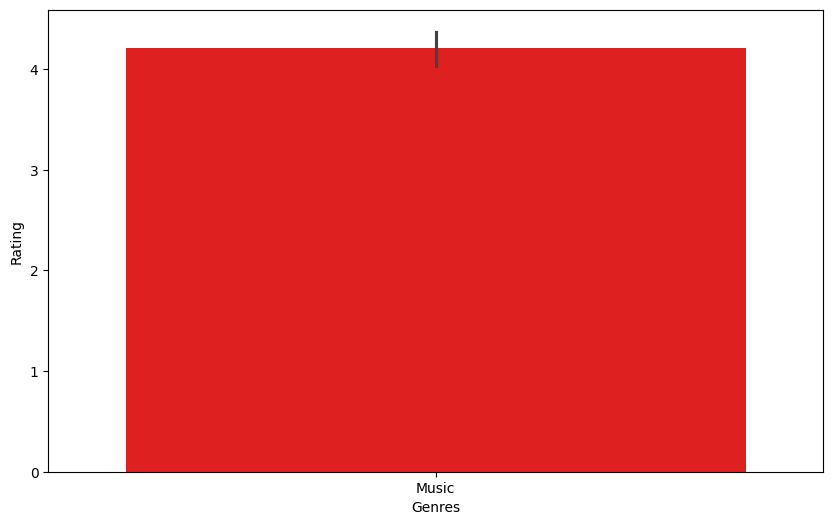

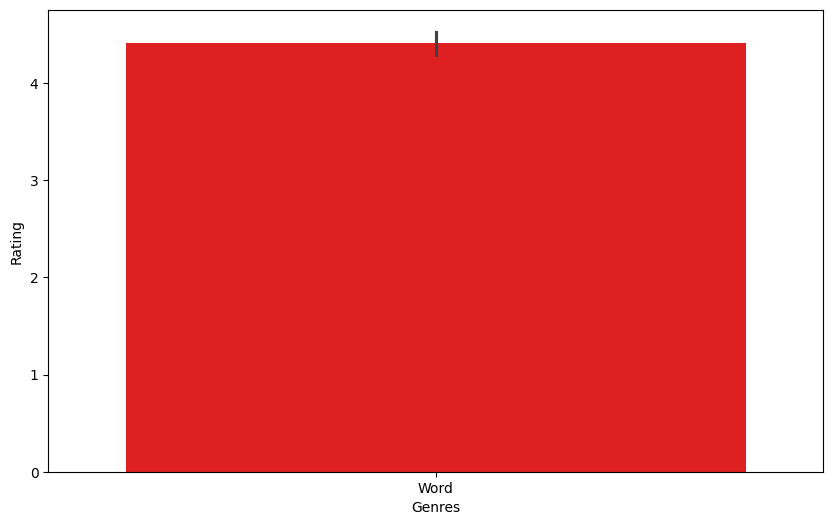

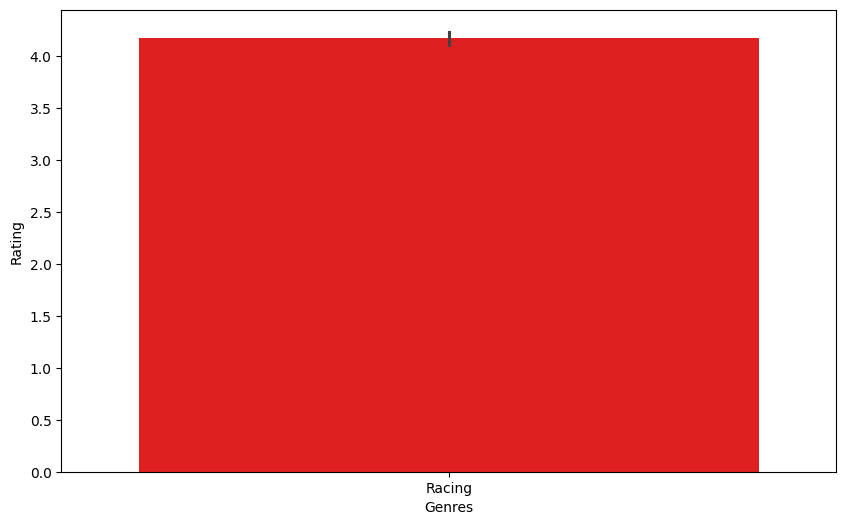

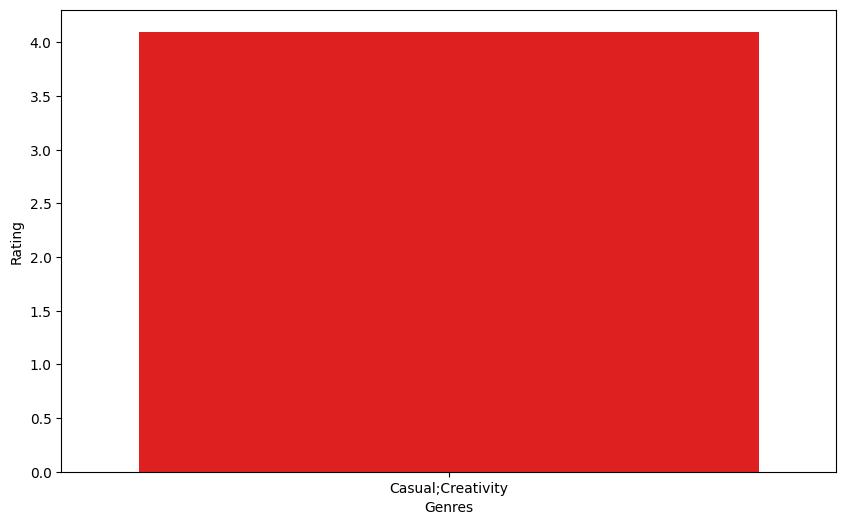

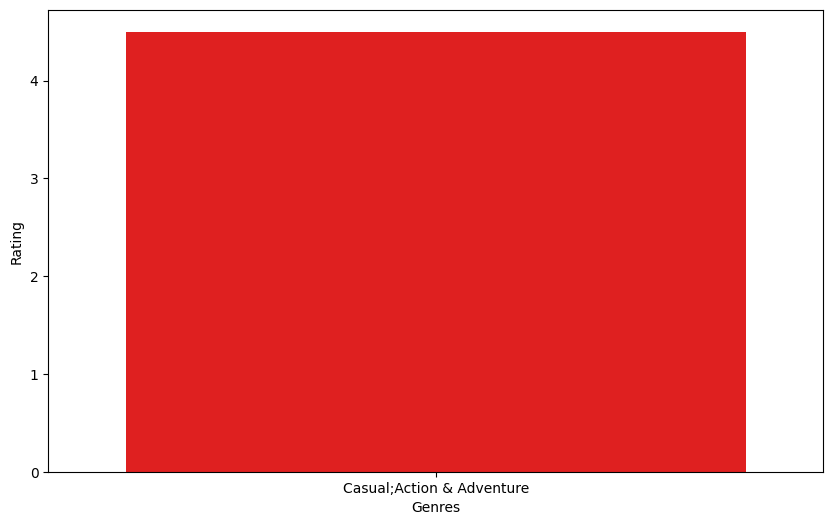

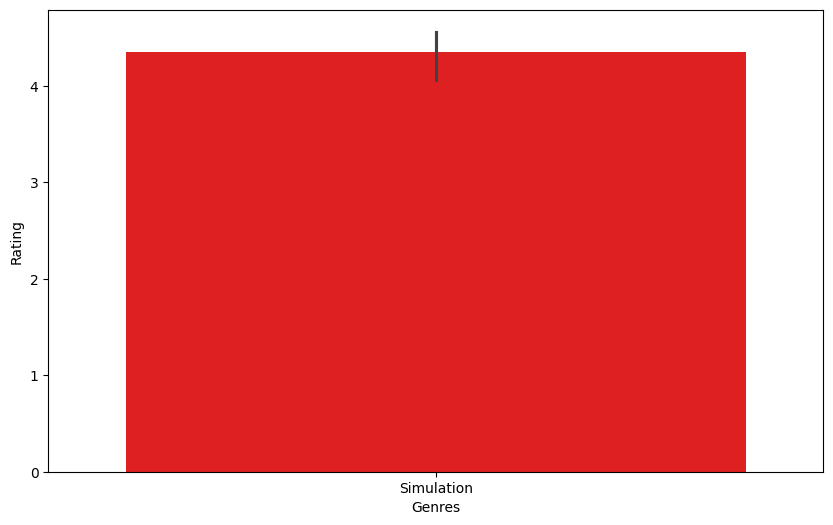

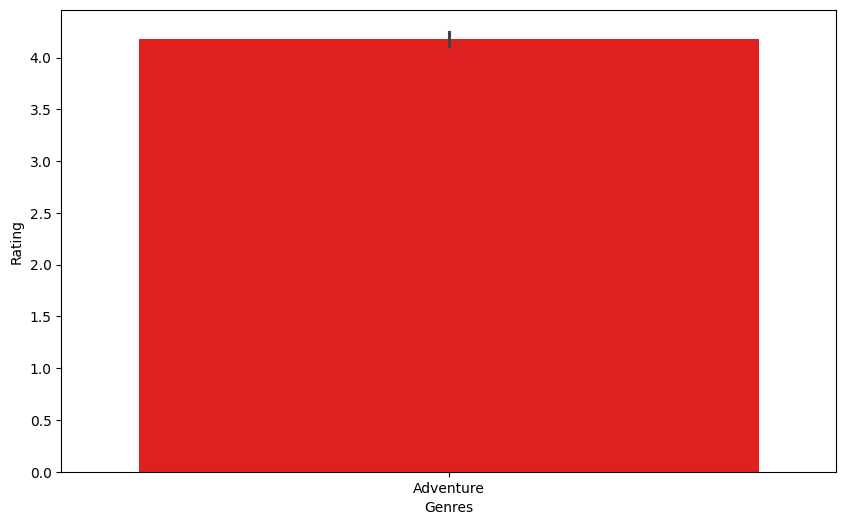

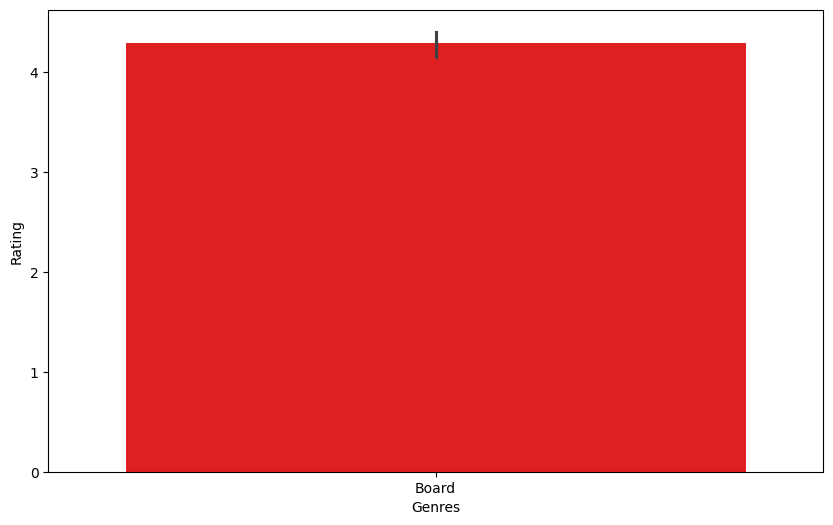

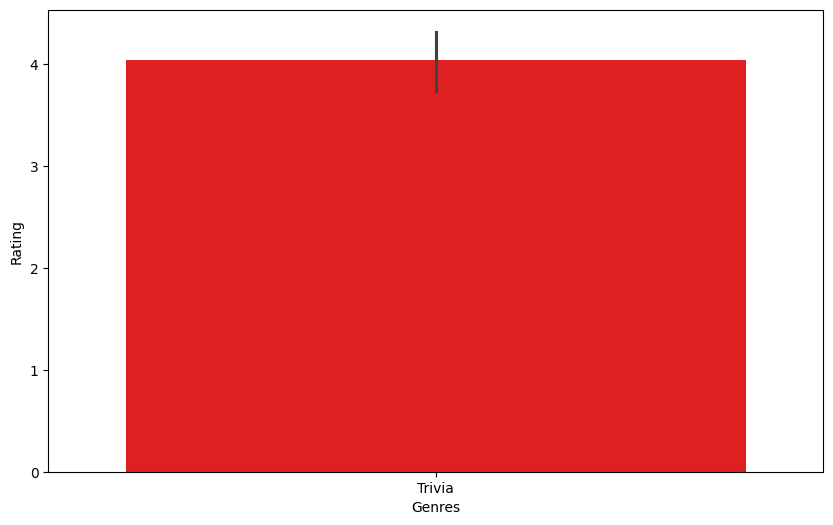

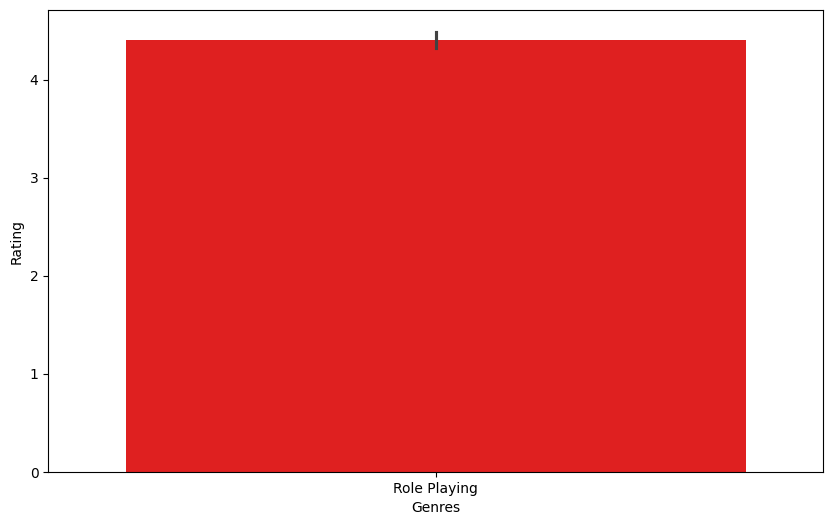

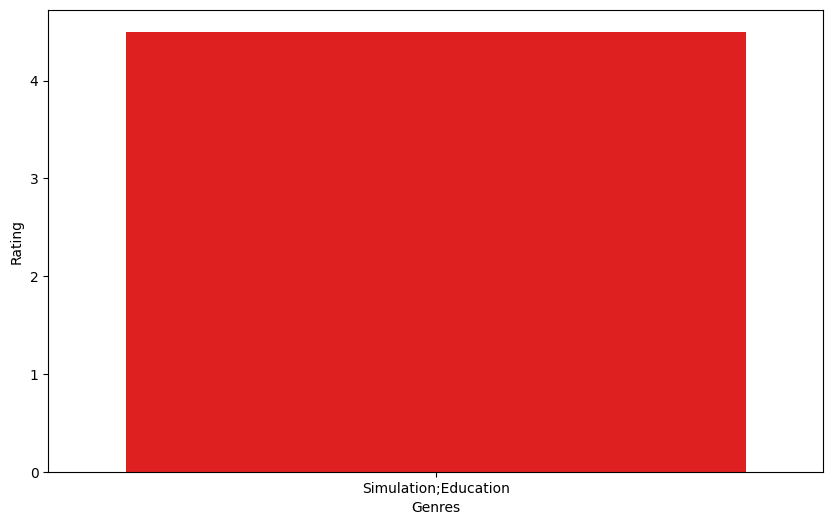

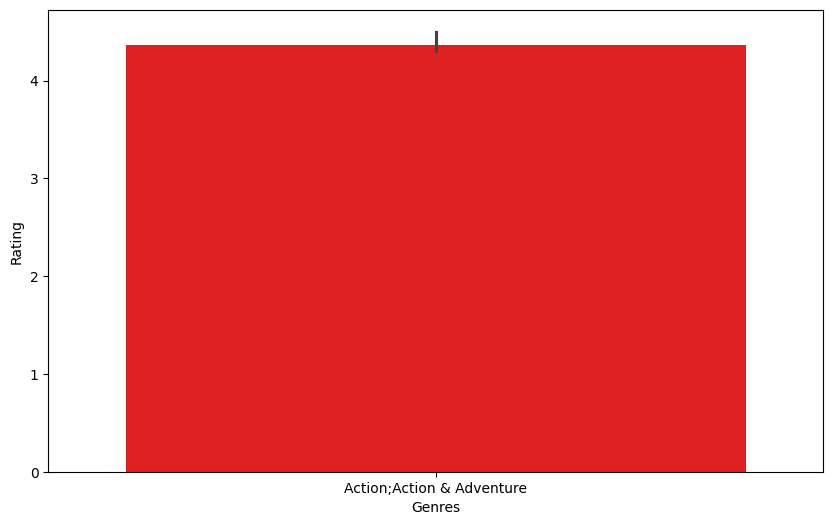

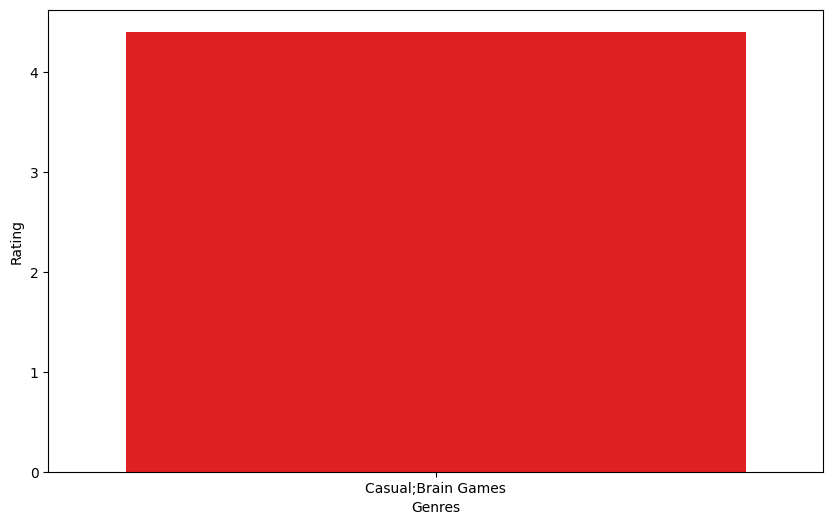

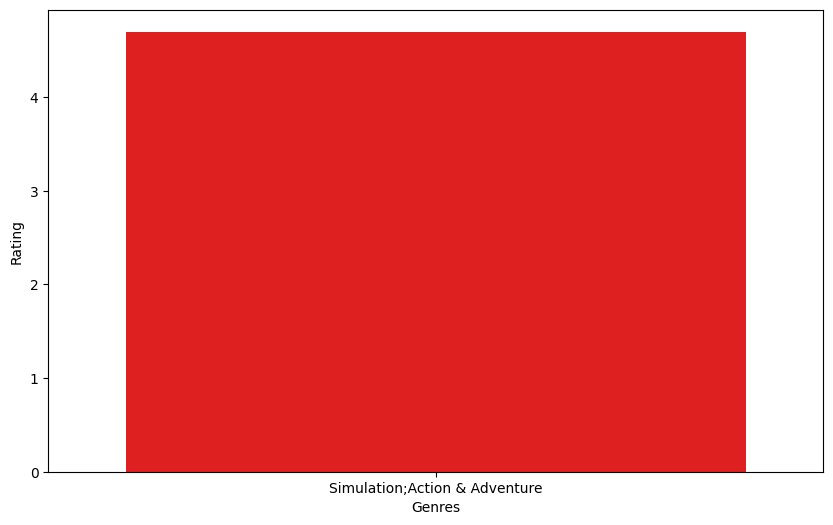

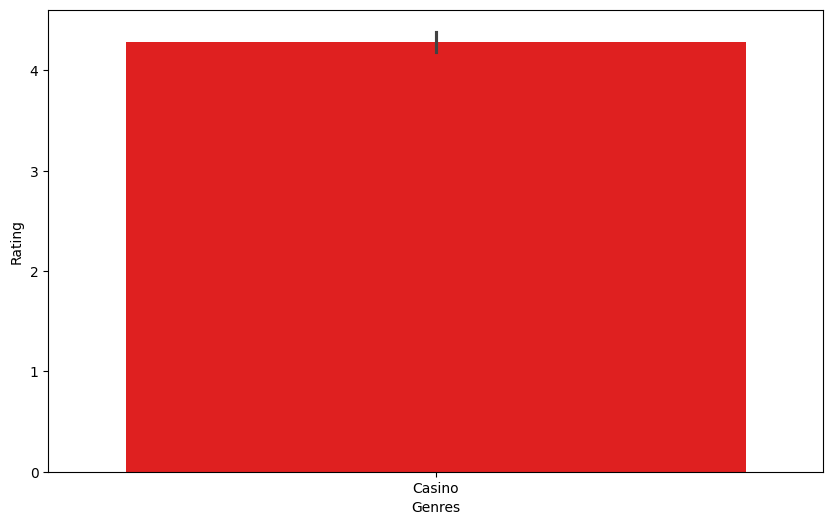

<Figure size 1000x600 with 0 Axes>

In [137]:
for i in game0001['Genres'].unique():
  sns.barplot(data=game0001[game0001['Genres'] == i], x='Genres', y='Rating',color = "red")
  plt.figure(figsize=(10, 6))

In [138]:
min(game01['Rating'])

4.1

In [139]:
min(game0001['Rating'])

1.0

In [140]:
game0001.tail()

Category  Rating Reviews      Size   Installs  Type  Price  \
10791     GAME     4.0    1287  38000000     50,000     0    0.0   
10792     GAME     4.2   21661  16000000  1,000,000     0    0.0   
10793     GAME     4.4   28510  78000000    500,000     0    0.0   
10803     GAME     4.3   56496  81000000  1,000,000     0    0.0   
10804     GAME     4.2    5442  17000000    100,000     0    0.0   

       Content Rating  Genres Last Updated Current Ver Android Ver  
10791               1    Word   2013-12-18  4.1 and up         2.2  
10792               1  Trivia   2018-05-24  4.1 and up         4.0  
10793               4    Card   2018-08-01  4.1 and up       4.0.3  
10803               4  Action   2018-08-07  4.1 and up         4.0  
10804               4    Card   2018-05-22  4.1 and up         2.3

In [141]:
game0001.sort_values(by = "Rating",ascending = True)

Category  Rating Reviews      Size Installs  Type  Price  \
6319      GAME     1.0       1  49000000    1,000     0   0.00   
8258      GAME     1.4      33  31000000    1,000     0   0.00   
7838      GAME     2.3     278  24000000   10,000     0   0.00   
6716      GAME     2.4      45  41000000   10,000     0   0.00   
8553      GAME     2.5     450  97000000   10,000     0   0.00   
...        ...     ...     ...       ...      ...   ...    ...   
9056      GAME     5.0       4  33000000       50     1   1.99   
5822      GAME     5.0       7  15000000      100     0   0.00   
7402      GAME     5.0      11  61000000       10     0   0.00   
7466      GAME     5.0       8  38000000       10     1   0.99   
10776     GAME     5.0       1  24000000       10     0   0.00   

       Content Rating  Genres Last Updated Current Ver Android Ver  
6319                1    Card   2018-05-21  4.1 and up         4.0  
8258                1  Trivia   2017-12-25  4.1 and up         4.1  
7838                4  Trivia   2017-02-11  4.1 and up         2.3  
6716                4    Card   2016-08-26  4.1 and up         4.1  
8553                1    Card   2018-07-23  4.1 and up         4.1  
...               ...     ...          ...         ...         ...  
9056                4  Action   2013-08-15  4.1 and up         2.2  
5822                1  Arcade   2017-09-27  4.1 and up         4.2  
7402                1  Arcade   2017-03-11  4.1 and up         2.3  
7466                4  Arcade   2018-04-11  4.1 and up         4.1  
10776               1  Racing   2018-03-05  4.1 and up         2.3  

[1097 rows x 12 columns]

In [142]:
Game_Genres = game0001.Genres.value_counts()
Game_Genres

Genres
Action                           358
Arcade                           207
Racing                            93
Adventure                         73
Casual                            45
Card                              45
Puzzle                            42
Board                             41
Casino                            37
Word                              28
Trivia                            28
Strategy                          24
Music                             21
Role Playing                      16
Sports                            14
Simulation                        11
Adventure;Action & Adventure       5
Action;Action & Adventure          3
Casual;Action & Adventure          1
Casual;Pretend Play                1
Simulation;Education               1
Casual;Brain Games                 1
Simulation;Action & Adventure      1
Casual;Creativity                  1
Name: count, dtype: int64

In [143]:
game0001.sort_values(by = "Rating",ascending = False)

Category  Rating Reviews      Size Installs  Type  Price  Content Rating  \
7698     GAME     5.0       5  12000000      100     0   0.00               1   
5917     GAME     5.0       2  20000000        1     1   1.49               1   
9056     GAME     5.0       4  33000000       50     1   1.99               4   
5795     GAME     5.0       8  25000000       50     0   0.00               1   
6700     GAME     5.0       7  19000000        5     0   0.00               1   
...       ...     ...     ...       ...      ...   ...    ...             ...   
8553     GAME     2.5     450  97000000   10,000     0   0.00               1   
6716     GAME     2.4      45  41000000   10,000     0   0.00               4   
7838     GAME     2.3     278  24000000   10,000     0   0.00               4   
8258     GAME     1.4      33  31000000    1,000     0   0.00               1   
6319     GAME     1.0       1  49000000    1,000     0   0.00               1   

      Genres Last Updated Current Ver Android Ver  
7698  Trivia   2018-08-06  4.1 and up         5.0  
5917  Arcade   2017-02-08  4.1 and up         2.3  
9056  Action   2013-08-15  4.1 and up         2.2  
5795  Arcade   2018-06-26  4.1 and up         4.1  
6700  Arcade   2018-07-23  4.1 and up         4.1  
...      ...          ...         ...         ...  
8553    Card   2018-07-23  4.1 and up         4.1  
6716    Card   2016-08-26  4.1 and up         4.1  
7838  Trivia   2017-02-11  4.1 and up         2.3  
8258  Trivia   2017-12-25  4.1 and up         4.1  
6319    Card   2018-05-21  4.1 and up         4.0  

[1097 rows x 12 columns]

<Axes: xlabel='count', ylabel='Genres'>

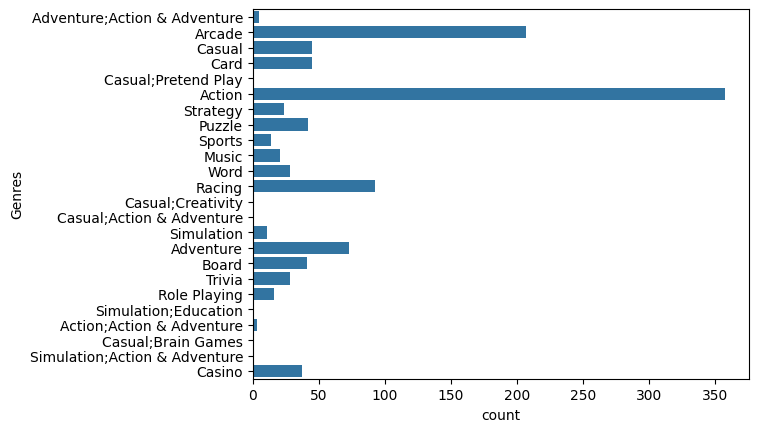

In [144]:
sns.countplot(game0001['Genres'])

In [145]:
game0001.loc[(game0001['Genres'] == 'Action') & (game0001['Rating'] > -4.0)]

Category  Rating  Reviews      Size     Installs  Type  Price  \
1659      GAME     4.4  5234162         0  100,000,000     0    0.0   
1661      GAME     4.3  8118609  62000000  500,000,000     0    0.0   
1663      GAME     4.2  1497361  33000000  100,000,000     0    0.0   
1669      GAME     4.3    10306  50000000    1,000,000     0    0.0   
1671      GAME     4.3  1000417         0   50,000,000     0    0.0   
...        ...     ...      ...       ...          ...   ...    ...   
10783     GAME     4.2      340  72000000       50,000     0    0.0   
10784     GAME     4.3   245455  84000000   10,000,000     0    0.0   
10787     GAME     4.1      297  48000000       50,000     0    0.0   
10789     GAME     4.0      368  48000000       50,000     0    0.0   
10803     GAME     4.3    56496  81000000    1,000,000     0    0.0   

       Content Rating  Genres Last Updated Current Ver Android Ver  
1659                1  Action   2017-11-14  4.1 and up         2.3  
1661                1  Action   2018-07-05  4.1 and up         4.0  
1663                1  Action   2018-04-09  4.1 and up         4.1  
1669                3  Action   2018-08-01  4.1 and up         2.3  
1671                4  Action   2018-07-05  4.1 and up         4.4  
...               ...     ...          ...         ...         ...  
10783               3  Action   2017-10-27  4.1 and up         4.1  
10784               2  Action   2018-05-31  4.1 and up         4.0  
10787               4  Action   2018-03-28  4.1 and up         4.1  
10789               2  Action   2018-03-28  4.1 and up         4.1  
10803               4  Action   2018-08-07  4.1 and up         4.0  

[358 rows x 12 columns]

<Axes: xlabel='Rating', ylabel='Density'>

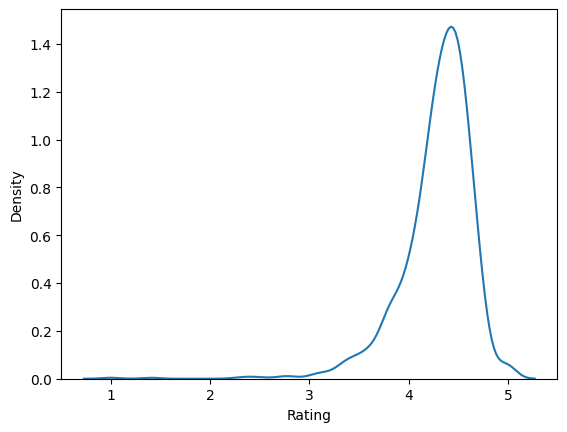

In [146]:
sns.kdeplot(game0001.Rating)

In [147]:
Free_Games = game0001.loc[game0001['Price'] == 0]

<Axes: xlabel='Rating', ylabel='Density'>

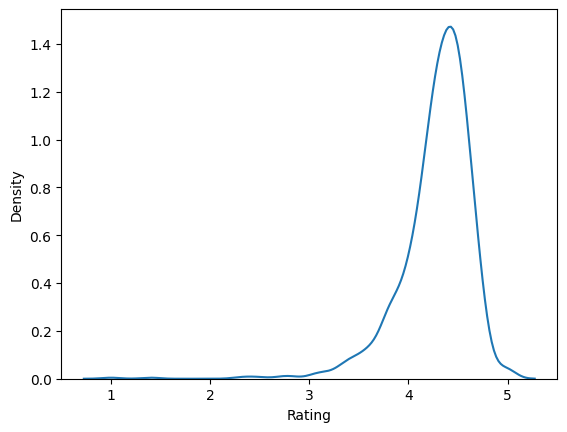

In [148]:
sns.kdeplot(Free_Games.Rating)

In [149]:
game0001.loc[(game0001['Genres'] == 'Action') & (game0001['Rating'] > 4.5)]
game0001.head(100).sort_values(by = "Rating",ascending = False)

Category  Rating  Reviews      Size     Installs  Type  Price  \
1714     GAME     4.8   230710  87000000   10,000,000     0    0.0   
1712     GAME     4.7  1889250         0   50,000,000     0    0.0   
1678     GAME     4.7   295241  39000000   10,000,000     0    0.0   
1727     GAME     4.7   990586  75000000   10,000,000     0    0.0   
1720     GAME     4.7  1534466         0   50,000,000     0    0.0   
...       ...     ...      ...       ...          ...   ...    ...   
1673     GAME     4.2   685981  37000000  100,000,000     0    0.0   
1658     GAME     4.2   369203  24000000   50,000,000     0    0.0   
1749     GAME     4.2  1498648  33000000  100,000,000     0    0.0   
1687     GAME     4.1    68057  85000000   10,000,000     0    0.0   
1682     GAME     3.8   270687  38000000   10,000,000     0    0.0   

      Content Rating               Genres Last Updated Current Ver Android Ver  
1714               1                 Word   2018-08-02  4.1 and up         4.1  
1712               1               Puzzle   2018-07-23  4.1 and up         4.1  
1678               1                 Word   2018-06-06  4.1 and up         3.0  
1727               1               Action   2018-05-24  4.1 and up         4.1  
1720               4               Action   2018-07-23  4.1 and up         4.1  
...              ...                  ...          ...         ...         ...  
1673               1               Arcade   2018-05-15  4.1 and up         4.1  
1658               1  Casual;Pretend Play   2018-04-17  4.1 and up         4.1  
1749               1               Action   2018-04-09  4.1 and up         4.1  
1687               1    Casual;Creativity   2018-07-30  4.1 and up         4.1  
1682               4               Racing   2018-07-20  4.1 and up       4.0.3  

[100 rows x 12 columns]

In [150]:
game0001.head(100).sort_values(by = "Installs",ascending = False)

Category  Rating   Reviews      Size     Installs  Type  Price  \
1702     GAME     4.3  10485334  24000000  500,000,000     0    0.0   
1655     GAME     4.4  22426677  74000000  500,000,000     0    0.0   
1751     GAME     4.4  22428456  74000000  500,000,000     0    0.0   
1705     GAME     4.4  22428456  74000000  500,000,000     0    0.0   
1661     GAME     4.3   8118609  62000000  500,000,000     0    0.0   
...       ...     ...       ...       ...          ...   ...    ...   
1747     GAME     4.4      9305  14000000    1,000,000     0    0.0   
1669     GAME     4.3     10306  50000000    1,000,000     0    0.0   
1734     GAME     4.5     10434  18000000    1,000,000     0    0.0   
1674     GAME     4.5     10393  18000000    1,000,000     0    0.0   
1728     GAME     4.3     10354  50000000    1,000,000     0    0.0   

      Content Rating  Genres Last Updated Current Ver Android Ver  
1702               1  Casual   2018-05-25  4.1 and up         4.0  
1655               1  Casual   2018-07-05  4.1 and up         4.1  
1751               1  Casual   2018-07-05  4.1 and up         4.1  
1705               1  Casual   2018-07-05  4.1 and up         4.1  
1661               1  Action   2018-07-05  4.1 and up         4.0  
...              ...     ...          ...         ...         ...  
1747               1  Casual   2018-08-02  4.1 and up       4.0.3  
1669               3  Action   2018-08-01  4.1 and up         2.3  
1734               1  Arcade   2018-07-11  4.1 and up         4.0  
1674               1  Arcade   2018-07-11  4.1 and up         4.0  
1728               3  Action   2018-08-01  4.1 and up         2.3  

[100 rows x 12 columns]

In [151]:
game0001.drop_duplicates()

Category  Rating   Reviews      Size       Installs  Type  Price  \
1653      GAME     4.5   4447388  67000000    100,000,000     0    0.0   
1654      GAME     4.5  27722264  76000000  1,000,000,000     0    0.0   
1655      GAME     4.4  22426677  74000000    500,000,000     0    0.0   
1656      GAME     4.7    254258  23000000     10,000,000     0    0.0   
1657      GAME     4.5    148897  46000000     10,000,000     0    0.0   
...        ...     ...       ...       ...            ...   ...    ...   
10791     GAME     4.0      1287  38000000         50,000     0    0.0   
10792     GAME     4.2     21661  16000000      1,000,000     0    0.0   
10793     GAME     4.4     28510  78000000        500,000     0    0.0   
10803     GAME     4.3     56496  81000000      1,000,000     0    0.0   
10804     GAME     4.2      5442  17000000        100,000     0    0.0   

       Content Rating                        Genres Last Updated Current Ver  \
1653                2  Adventure;Action & Adventure   2018-07-31  4.1 and up   
1654                2                        Arcade   2018-07-12  4.1 and up   
1655                1                        Casual   2018-07-05  4.1 and up   
1656                1                          Card   2018-08-01  4.1 and up   
1657                1                        Casual   2018-07-17  4.1 and up   
...               ...                           ...          ...         ...   
10791               1                          Word   2013-12-18  4.1 and up   
10792               1                        Trivia   2018-05-24  4.1 and up   
10793               4                          Card   2018-08-01  4.1 and up   
10803               4                        Action   2018-08-07  4.1 and up   
10804               4                          Card   2018-05-22  4.1 and up   

      Android Ver  
1653          4.1  
1654          4.1  
1655          4.1  
1656          4.1  
1657        4.0.3  
...           ...  
10791         2.2  
10792         4.0  
10793       4.0.3  
10803         4.0  
10804         2.3  

[1074 rows x 12 columns]

In [152]:
game0001.drop_duplicates(inplace = True)

<ipython-input-152-8a850471fbe8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  game0001.drop_duplicates(inplace = True)


In [153]:
df.head()

Category  Rating Reviews      Size    Installs  Type  Price  \
0  ART_AND_DESIGN     4.1     159  19000000      10,000     0    0.0   
1  ART_AND_DESIGN     3.9     967  14000000     500,000     0    0.0   
2  ART_AND_DESIGN     4.7   87510  87000000   5,000,000     0    0.0   
3  ART_AND_DESIGN     4.5  215644  25000000  50,000,000     0    0.0   
4  ART_AND_DESIGN     4.3     967  28000000     100,000     0    0.0   

   Content Rating                     Genres Last Updated Current Ver  \
0               1               Art & Design   2018-01-07  4.1 and up   
1               1  Art & Design;Pretend Play   2018-01-15  4.1 and up   
2               1               Art & Design   2018-08-01  4.1 and up   
3               4               Art & Design   2018-06-08  4.1 and up   
4               1    Art & Design;Creativity   2018-06-20  4.1 and up   

  Android Ver  
0       4.0.3  
1       4.0.3  
2       4.0.3  
3         4.2  
4         4.4

<Axes: >

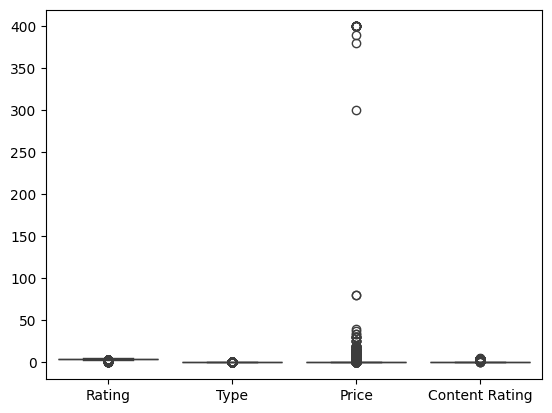

In [154]:
sns.boxplot(df)

In [155]:
df.head()

Category  Rating Reviews      Size    Installs  Type  Price  \
0  ART_AND_DESIGN     4.1     159  19000000      10,000     0    0.0   
1  ART_AND_DESIGN     3.9     967  14000000     500,000     0    0.0   
2  ART_AND_DESIGN     4.7   87510  87000000   5,000,000     0    0.0   
3  ART_AND_DESIGN     4.5  215644  25000000  50,000,000     0    0.0   
4  ART_AND_DESIGN     4.3     967  28000000     100,000     0    0.0   

   Content Rating                     Genres Last Updated Current Ver  \
0               1               Art & Design   2018-01-07  4.1 and up   
1               1  Art & Design;Pretend Play   2018-01-15  4.1 and up   
2               1               Art & Design   2018-08-01  4.1 and up   
3               4               Art & Design   2018-06-08  4.1 and up   
4               1    Art & Design;Creativity   2018-06-20  4.1 and up   

  Android Ver  
0       4.0.3  
1       4.0.3  
2       4.0.3  
3         4.2  
4         4.4

In [156]:
df.drop(['Last Updated','Type','Current Ver','Android Ver'],axis = 1,inplace = True)

<ipython-input-156-914b332887c0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['Last Updated','Type','Current Ver','Android Ver'],axis = 1,inplace = True)


In [157]:
df.head()

Category  Rating Reviews      Size    Installs  Price  \
0  ART_AND_DESIGN     4.1     159  19000000      10,000    0.0   
1  ART_AND_DESIGN     3.9     967  14000000     500,000    0.0   
2  ART_AND_DESIGN     4.7   87510  87000000   5,000,000    0.0   
3  ART_AND_DESIGN     4.5  215644  25000000  50,000,000    0.0   
4  ART_AND_DESIGN     4.3     967  28000000     100,000    0.0   

   Content Rating                     Genres  
0               1               Art & Design  
1               1  Art & Design;Pretend Play  
2               1               Art & Design  
3               4               Art & Design  
4               1    Art & Design;Creativity

In [158]:
df['Installs'] = df['Installs'].astype(str).str.replace('+','',regex = False)
df['Installs'] = df['Installs'].astype(str).str.replace(',','',regex = False)

<ipython-input-158-b60de7ad0913>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Installs'] = df['Installs'].astype(str).str.replace('+','',regex = False)
<ipython-input-158-b60de7ad0913>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Installs'] = df['Installs'].astype(str).str.replace(',','',regex = False)


In [159]:
df.Rating.value_counts()

Rating
4.4    1109
4.3    1076
4.5    1038
4.2     952
4.6     823
4.1     708
4.0     568
4.7     499
3.9     386
3.8     303
5.0     274
3.7     239
4.8     234
3.6     174
3.5     163
3.4     128
3.3     102
4.9      87
3.0      83
3.1      69
3.2      64
2.9      45
2.8      42
2.7      25
2.6      25
2.5      21
2.3      20
2.4      19
1.0      16
2.2      14
1.9      13
2.0      12
1.7       8
1.8       8
2.1       8
1.6       4
1.4       3
1.5       3
1.2       1
Name: count, dtype: int64

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9366 entries, 0 to 10840
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        9366 non-null   object 
 1   Rating          9366 non-null   float64
 2   Reviews         9366 non-null   object 
 3   Size            9366 non-null   object 
 4   Installs        9366 non-null   object 
 5   Price           9366 non-null   float64
 6   Content Rating  9366 non-null   int64  
 7   Genres          9366 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 916.6+ KB


In [266]:
df01['Size'] = df01['Size'].astype(str).str.replace('M','000000')
df01['Size'] = df01['Size'].astype(str).str.replace('k','000')
df01['Size'] = df01['Size'].astype(str).str.replace('.','')

In [270]:
df01['Installs'] = df01['Installs'].astype(str).str.replace(',','')
df01['Installs'] = df01['Installs'].astype(str).str.replace('+','')

In [274]:
df01.head()

Category  Rating Reviews      Size  Installs  Type Price  \
0  ART_AND_DESIGN     4.1     159  19000000     10000  Free     0   
1  ART_AND_DESIGN     3.9     967  14000000    500000  Free     0   
2  ART_AND_DESIGN     4.7   87510  87000000   5000000  Free     0   
3  ART_AND_DESIGN     4.5  215644  25000000  50000000  Free     0   
4  ART_AND_DESIGN     4.3     967  28000000    100000  Free     0   

  Content Rating                     Genres   Android Ver  
0       Everyone               Art & Design  4.0.3 and up  
1       Everyone  Art & Design;Pretend Play  4.0.3 and up  
2       Everyone               Art & Design  4.0.3 and up  
3           Teen               Art & Design    4.2 and up  
4       Everyone    Art & Design;Creativity    4.4 and up

In [273]:
"""df01.drop('Last Updated',axis = 1,inplace = True)
df01.drop('App',axis = 1,inplace = True)"""
df01.drop('Current Ver',axis = 1,inplace = True)
#df01.drop('Android Ver',axis = 1,inplace = True)

In [161]:
df['Size'] = df['Size'].astype(str).str.replace('M','000000',regex = False)
df['Size'] = df['Size'].astype(str).str.replace('k','000',regex = False)
df['Size'] = df['Size'].astype(str).str.replace('Varies with device','0',regex = False)
df['Size'] = df['Size'].astype(str).str.replace('.','',regex = False)
df['Size'].astype(int)

<ipython-input-161-14ba111eac3d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Size'] = df['Size'].astype(str).str.replace('M','000000',regex = False)
<ipython-input-161-14ba111eac3d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Size'] = df['Size'].astype(str).str.replace('k','000',regex = False)
<ipython-input-161-14ba111eac3d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

0        19000000
1        14000000
2        87000000
3        25000000
4        28000000
           ...   
10834    26000000
10836    53000000
10837    36000000
10839           0
10840    19000000
Name: Size, Length: 9366, dtype: int64

In [163]:
LE = LabelEncoder()
df['Category'] = LE.fit_transform(df['Category'])

<ipython-input-163-8ec080695ea5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Category'] = LE.fit_transform(df['Category'])


In [165]:
df.Genres = LE.fit_transform(df['Genres'])

<ipython-input-165-adcba8ad2163>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Genres = LE.fit_transform(df['Genres'])


In [166]:
df.head()

Category  Rating Reviews      Size  Installs  Price  Content Rating  Genres
0         0     4.1     159  19000000     10000    0.0               1       9
1         0     3.9     967  14000000    500000    0.0               1      11
2         0     4.7   87510  87000000   5000000    0.0               1       9
3         0     4.5  215644  25000000  50000000    0.0               4       9
4         0     4.3     967  28000000    100000    0.0               1      10

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9366 entries, 0 to 10840
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        9366 non-null   int64  
 1   Rating          9366 non-null   float64
 2   Reviews         9366 non-null   object 
 3   Size            9366 non-null   object 
 4   Installs        9366 non-null   object 
 5   Price           9366 non-null   float64
 6   Content Rating  9366 non-null   int64  
 7   Genres          9366 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 916.6+ KB


In [168]:
df['Rating'].value_counts()

Rating
4.4    1109
4.3    1076
4.5    1038
4.2     952
4.6     823
4.1     708
4.0     568
4.7     499
3.9     386
3.8     303
5.0     274
3.7     239
4.8     234
3.6     174
3.5     163
3.4     128
3.3     102
4.9      87
3.0      83
3.1      69
3.2      64
2.9      45
2.8      42
2.7      25
2.6      25
2.5      21
2.3      20
2.4      19
1.0      16
2.2      14
1.9      13
2.0      12
1.7       8
1.8       8
2.1       8
1.6       4
1.4       3
1.5       3
1.2       1
Name: count, dtype: int64

In [169]:
#df.select_dtypes(include = 'object').astype(int)
df['Rating'] = df['Rating'].astype(float)

<ipython-input-169-f54d1cc7dc26>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rating'] = df['Rating'].astype(float)


In [170]:
df['Content Rating'] = LE.fit_transform(df['Content Rating'])

<ipython-input-170-1a495227d47b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Content Rating'] = LE.fit_transform(df['Content Rating'])


In [174]:
df.head()

Category  Rating  Reviews      Size  Installs  Price  Content Rating  \
0         0     4.1      159  19000000     10000    0.0               1   
1         0     3.9      967  14000000    500000    0.0               1   
2         0     4.7    87510  87000000   5000000    0.0               1   
3         0     4.5   215644  25000000  50000000    0.0               4   
4         0     4.3      967  28000000    100000    0.0               1   

   Genres  
0       9  
1      11  
2       9  
3       9  
4      10

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9366 entries, 0 to 10840
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        9366 non-null   int64  
 1   Rating          9366 non-null   float64
 2   Reviews         9366 non-null   int64  
 3   Size            9366 non-null   int64  
 4   Installs        9366 non-null   int64  
 5   Price           9366 non-null   float64
 6   Content Rating  9366 non-null   int64  
 7   Genres          9366 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 916.6 KB


In [172]:
df['Reviews'] = df['Reviews'].astype(int)

<ipython-input-172-a769f17d7fea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Reviews'] = df['Reviews'].astype(int)


In [171]:
df['Size'] = df['Size'].astype(int)
df['Installs'] = df['Installs'].astype(int)

<ipython-input-171-e42ac6794020>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Size'] = df['Size'].astype(int)
<ipython-input-171-e42ac6794020>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Installs'] = df['Installs'].astype(int)


In [175]:
MMS = MinMaxScaler()
df['Reviews'] = MMS.fit_transform(df[['Reviews']])
df['Size'] = MMS.fit_transform(df[['Size']])
df['Installs'] = MMS.fit_transform(df[['Installs']])

<ipython-input-175-4cc6f791782d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Reviews'] = MMS.fit_transform(df[['Reviews']])
<ipython-input-175-4cc6f791782d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Size'] = MMS.fit_transform(df[['Size']])
<ipython-input-175-4cc6f791782d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

In [180]:
df.Rating.value_counts()

Rating
4.4    1109
4.3    1076
4.5    1038
4.2     952
4.6     823
4.1     708
4.0     568
4.7     499
3.9     386
3.8     303
5.0     274
3.7     239
4.8     234
3.6     174
3.5     163
3.4     128
3.3     102
4.9      87
3.0      83
3.1      69
3.2      64
2.9      45
2.8      42
2.7      25
2.6      25
2.5      21
2.3      20
2.4      19
1.0      16
2.2      14
1.9      13
2.0      12
1.7       8
1.8       8
2.1       8
1.6       4
1.4       3
1.5       3
1.2       1
Name: count, dtype: int64

In [277]:
df01.head()

Category  Rating Reviews      Size  Installs  Type Price  \
0  ART_AND_DESIGN     4.1     159  19000000     10000  Free     0   
1  ART_AND_DESIGN     3.9     967  14000000    500000  Free     0   
2  ART_AND_DESIGN     4.7   87510  87000000   5000000  Free     0   
3  ART_AND_DESIGN     4.5  215644  25000000  50000000  Free     0   
4  ART_AND_DESIGN     4.3     967  28000000    100000  Free     0   

  Content Rating                     Genres   Android Ver  
0       Everyone               Art & Design  4.0.3 and up  
1       Everyone  Art & Design;Pretend Play  4.0.3 and up  
2       Everyone               Art & Design  4.0.3 and up  
3           Teen               Art & Design    4.2 and up  
4       Everyone    Art & Design;Creativity    4.4 and up

In [276]:
df01.columns

Index(['Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'Content Rating', 'Genres', 'Android Ver'],
      dtype='object')

In [178]:
X = df.drop('Category',axis = 1)
y = df['Category']

In [181]:
from sklearn.ensemble import RandomForestClassifier
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [182]:
RFC = RandomForestClassifier()
RFC.fit(X_train,y_train)

RandomForestClassifier()

In [192]:
y_pred = RFC.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report

In [194]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.92      0.75      0.83        16\n           1       0.60      0.64      0.62        14\n           2       0.71      0.45      0.56        11\n           3       0.87      0.80      0.84        41\n           4       0.92      0.95      0.93        57\n           5       0.75      0.18      0.29        17\n           6       0.92      0.91      0.91        53\n           7       0.89      0.98      0.93        41\n           8       0.65      0.55      0.60        31\n           9       0.65      0.74      0.69        23\n          10       1.00      0.75      0.86         8\n          11       0.77      0.85      0.81       363\n          12       0.92      0.96      0.94        71\n          13       0.81      0.52      0.63        25\n          14       0.85      0.81      0.83       210\n          15       0.79      0.81      0.80        52\n          16       0.67      0.75      0.71        16\n       

In [195]:
accuracy_score(y_test,y_pred)

0.8452508004268944

In [190]:
y_test.dtype

dtype('int64')

In [196]:
import matplotlib.pyplot as plt

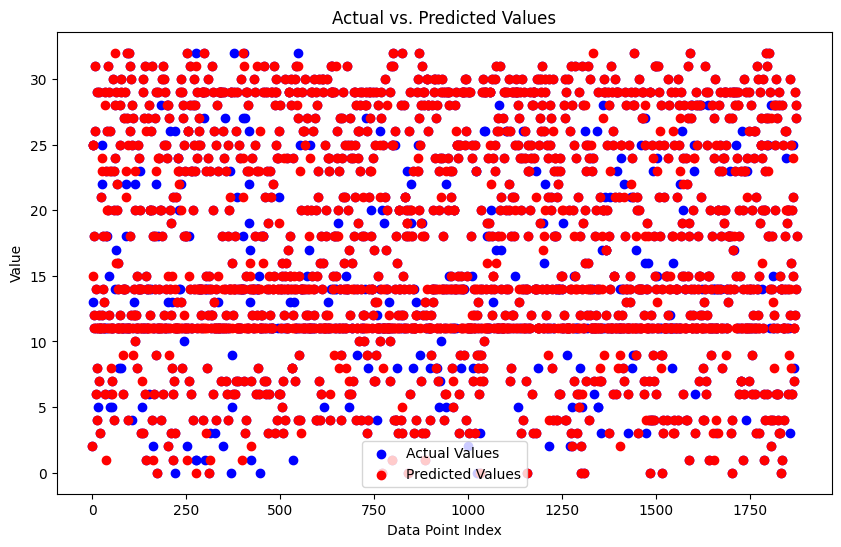

In [200]:
# prompt: generate a scatterplot plotting both the prediction and y_test, seperate each y_pred and y_test with a color

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Values')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted Values')
plt.xlabel("Data Point Index")
plt.ylabel("Value")
plt.title("Actual vs. Predicted Values")
plt.legend()
plt.show()


<ipython-input-203-d6236122b01b>:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


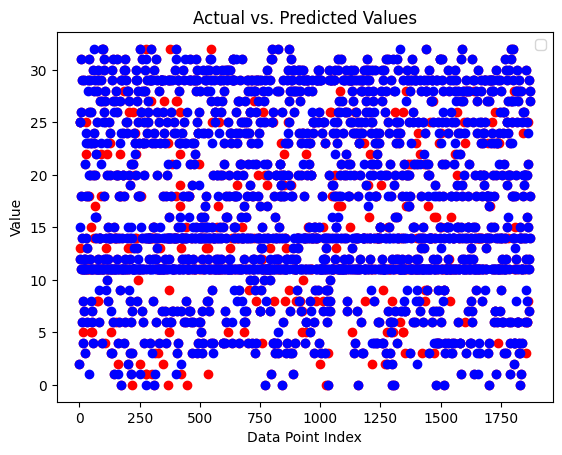

In [203]:
plt.scatter(range(len(y_test)),y_test,color = "red")
plt.scatter(range(len(y_pred)),y_pred,color = "blue")
plt.xlabel("Data Point Index")
plt.ylabel("Value")
plt.title("Actual vs. Predicted Values")
plt.legend()
plt.show()

In [206]:
df01.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [207]:
df01.Category.value_counts()

Category
FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: count, dtype: int64

In [210]:
df02= df01.loc[df01['Category'] != 'GAME']

In [214]:
category_counts = df02['Category'].value_counts()
filtered_categories = category_counts[category_counts > 100].index
df02['Category'] = df02['Category'].apply(lambda x: x if x in filtered_categories else np.nan)



<ipython-input-214-705297d4bf73>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df02['Category'] = df02['Category'].apply(lambda x: x if x in filtered_categories else np.nan)


In [219]:
LR = LogisticRegression()
DTC = DecisionTreeClassifier()
KNC = KNeighborsClassifier()
RFC = RandomForestClassifier()


In [220]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [221]:
SVC = SVC()
KNN = KNeighborsClassifier()

In [222]:
LR.fit(X_train,y_train)
DTC.fit(X_train,y_train)
RFC.fit(X_train,y_train)
SVC.fit(X_train,y_train)
KNN.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


KNeighborsClassifier()

In [223]:
y_pred01 = LR.predict(X_test)
y_pred02 = DTC.predict(X_test)
y_pred03 = RFC.predict(X_test)
y_pred04 = SVC.predict(X_test)
y_pred05 = KNN.predict(X_test)

In [236]:
a = accuracy_score(y_test,y_pred01)
a

0.2726787620064034

In [237]:
b = accuracy_score(y_test,y_pred02)

In [238]:
c= accuracy_score(y_test,y_pred03)
c

0.8452508004268944

In [239]:
d = accuracy_score(y_test,y_pred04)
d

0.5309498399146211

In [240]:
e = accuracy_score(y_test,y_pred05)
e

0.9493062966915689

In [241]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier

In [242]:
GBC = GradientBoostingClassifier()
ABC = AdaBoostClassifier()

In [243]:
GBC.fit(X_train,y_train)
ABC.fit(X_train,y_train)

AdaBoostClassifier()

In [244]:
GBC_pred = GBC.predict(X_test)
ABC_pred = ABC.predict(X_test)

In [245]:
f = accuracy_score(y_test,GBC_pred)
f

0.9663820704375667

In [257]:
g = accuracy_score(y_test,ABC_pred)
g

0.3329775880469584

In [261]:
import pandas as pd

data = {'Classifier': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVC', 'KNN', 'Gradient Boosting', 'AdaBoost'],
        'Accuracy': [a, b, c, d, e, f, g]}
df_results = pd.DataFrame(data)
df_results

Classifier  Accuracy
0  Logistic Regression  0.272679
1        Decision Tree  0.955710
2        Random Forest  0.845251
3                  SVC  0.530950
4                  KNN  0.949306
5    Gradient Boosting  0.966382
6             AdaBoost  0.332978

In [262]:
df_results.sort_values(by = 'Accuracy',ascending = False)

Classifier  Accuracy
5    Gradient Boosting  0.966382
1        Decision Tree  0.955710
4                  KNN  0.949306
2        Random Forest  0.845251
3                  SVC  0.530950
6             AdaBoost  0.332978
0  Logistic Regression  0.272679